<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;">
    <br>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:20px;font-style: italic;color:  black">DATASET</li></center>
  <center><li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  darkble">Multi-label image-based digit classification</li></center>
</ul>
    <br>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/favpng_fountain-pen-book-ballpoint-pen.png" align="left" hspace="25px" vspace="25px" width="100" height="60" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:  red">Highlights</li>
</ul>

<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
    <br>The goal of this project is to provide a valuable methodology for solving the multi-label image-based digit classification task. It will start from a series of image preprocessing which attempt to raise the recognition degree of the images, then find a way to extract each digit from the original image for the model to make classification. When choosed the model, evaluation and analysis will be provided subsequently, proving the effectiveness and reliability of the model. This preface will provide an abstract of the project.<br><br>
    <li><span style="font-weight: bold; color:darkblue;"><b>Dataset Overview:</b></span> Each image consists of three MNIST digits, requiring models to recognise and classify multiple digits within a single image. The digits may be overlapping or partially obscured, making it more difficult for algorithms to accurately identify and classify each individual digit.</li>  <br>
    <li><span style="font-weight: bold; color:darkblue;"><b>Data Loading and Preprocessing</b></span> This involved resizing, converting images to grayscale, smoothing images which include averaging and Gaussian blurring, thresholding which include Otsu's thresholding and adaptive thresholding, morphological operations which include erosion and dilation, dividing images into three parts, extract ROI(region of interest). When batch loaded the dataset, using above preprocesses to each single image and appending them to a list, transforming it to array, encoding three digits labels into three single digit labels. And then normalizing pixel values.</li> <br>
    <li><span style="font-weight: bold; color:darkblue;"><b>Model Building and Visualization:</b></span> Developed CNN models with diverse architectures, visualized filters and feature maps for insights into learned patterns and decision-making processes.</li> <br>
    <li><span style="font-weight: bold; color:darkblue;"><b>Model Evaluation and Hyperparameter Tuning:</b></span> Utilized n-fold cross-validation for thorough model evaluation and analyzed learning curves. Performed grid search with cross-validation to optimize hyperparameters, attempting to obtain the best accuracy.  </li> <br>
    <li><span style="font-weight: bold; color:darkblue;"><b>Model Evaluation and Testing:</b></span> Trained the model with validation, set a very high epoch number and used early stopping to cease the training process at a proper timing, preventing overfitting and underfitting. Report the final performance of the CNN model using appropriate performance metrics: accuracy, precision, recall, f1 score.</li><br>
        <li><span style="font-weight: bold; color:darkblue;"><b>Data Augmentation:</b></span> Implemented data augmentation with Keras ImageDataGenerator, by performing feature standardization to normalize pixel values, utilizing random rotations and shifts to provide orientation and position variations of images. The variability across each epoch has been randomly created during training. An augmented version of training and testing results had been provided.</li> <br><br>
</ul>
</div>

In [ ]:
# Install all the required libraries
!pip install h5py scikeras opencv-python Keras TensorFlow --upgrade --quiet --user

In [1]:
# Import all the required libraries
import cv2  # OpenCV library for image processing
import numpy as np  # Numerical computing library
from numpy import (
    mean,
    std,
    expand_dims,
)  # Functions for calculating mean, standard deviation, and array manipulation
from sklearn.model_selection import (
    KFold,
    GridSearchCV,
)  # Cross-validation and hyperparameter tuning
from sklearn.metrics import confusion_matrix  # confusion matrix
import matplotlib.pyplot as plt  # Data visualization library
import os  # Operating system related functions
import math  # Mathematical functions
import pandas as pd  # Data manipulation and analysis library
import time  # Time-related functions
from datetime import date, datetime  # Date and time functions
from keras.callbacks import (
    ModelCheckpoint,
    EarlyStopping,
)  # Callbacks for Keras models
from keras.models import Model  # Model class from Keras
import tensorflow as tf  # TensorFlow library for deep learning
from tensorflow import keras  # Keras API in TensorFlow
from tensorflow.keras import (
    datasets,
    layers,
    models,
    losses,
)  # Layers and models in Keras
from tensorflow.keras.models import (
    load_model,
    Sequential,
)  # Loading and creating sequential models
from tensorflow.keras.utils import (
    to_categorical,
)  # One-hot encoding for labels
from tensorflow.keras.optimizers import (
    SGD,
)  # Stochastic Gradient Descent optimizer
from tensorflow.keras.layers import (
    Conv2D,
    Activation,
    Dropout,
    MaxPooling2D,
    Flatten,
    Dense,
    BatchNormalization,
)  # Different types of layers in Keras
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
)  # Data augmentation for images
from scikeras.wrappers import (
    KerasClassifier,
)  # Wrapper for Keras models in scikit-learn
import seaborn as sns
import random

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Reproducibility with Fixed Random Seed</li>
</ul>

In [2]:
# set seed value
seed_value = 42

# Set the `PYTHONHASHSEED` environment variable at a fixed value
os.environ["PYTHONHASHSEED"] = str(seed_value)

# Set the `python` built-in pseudo-random generator at a fixed value
random.seed(seed_value)

# Set the `numpy` pseudo-random generator at a fixed value
np.random.seed(seed_value)

# Set the `tensorflow` pseudo-random generator at a fixed value
tf.random.set_seed(seed_value)
# tf.compat.v1.set_random_seed(seed_value)

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Data Preprocessing</li>
</ul>

In [3]:
# set the path
# path = r"D:\Desktop\Hull2023060501\assignment\M2\dataset2\triple_mnist\train\000\0_000.png"
path = r"dataset2\triple_mnist\train\000\0_000.png"

Original Dimensions :  (84, 84, 3)


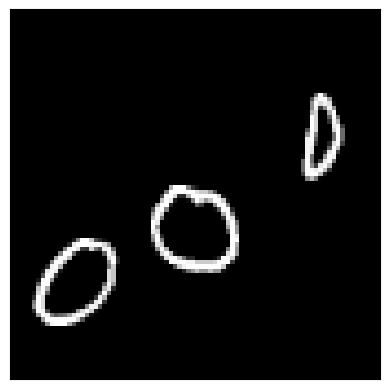

In [4]:
# read image
img = cv2.imread(path)

print("Original Dimensions : ", img.shape)

plt.subplot(111), plt.imshow(img)
plt.xticks([]), plt.yticks([])

plt.show()

Resized Dimensions :  (224, 224, 3)


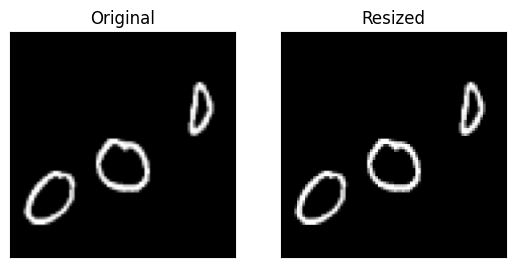

In [5]:
# resize image by dim = (width, height)
dim = (224, 224)
resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

print("Resized Dimensions : ", resized.shape)

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(resized, cmap="gray"), plt.title("Resized")
plt.xticks([]), plt.yticks([])
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Other than the dimension change, there is no noticeable difference between the original image and the resized version.</li>
    <br>
</ul>
</div>

Grayscale Dimensions :  (84, 84)


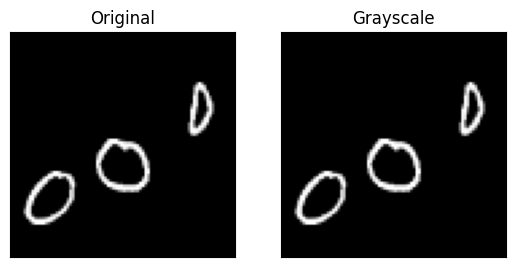

In [6]:
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print("Grayscale Dimensions : ", gray.shape)

plt.subplot(121), plt.imshow(img), plt.title("Original")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(gray, cmap="gray"), plt.title("Grayscale")
plt.xticks([]), plt.yticks([])
plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Smoothing Images</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Image smoothing is a technique used to remove noise and blur images. Two methods for achieving this are averaging and Gaussian blurring.</li> 
</ul>

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Averaging</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Convolve the image with a normalized box filter, calculating the average of pixels within the kernel area and replacing the central element.</li> 
</ul>

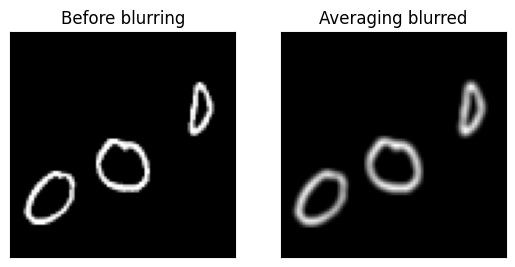

In [7]:
# blur the image by the kernel of size k
k = 3
blur = cv2.blur(gray, (k, k))

plt.subplot(121), plt.imshow(gray, cmap="gray"), plt.title("Before blurring")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur, cmap="gray"), plt.title("Averaging blurred")
plt.xticks([]), plt.yticks([])
plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Gaussian Blurring</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>This technique employs a Gaussian kernel in place of a box filter.</li> 
</ul>

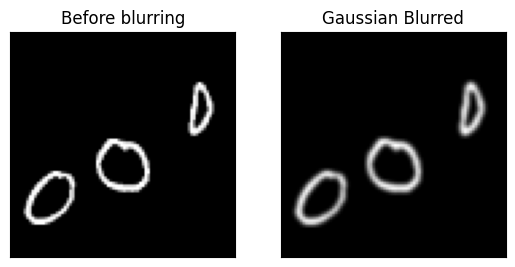

In [8]:
# blur the image by the kernel of size k
k = 3
GaussianBlur = cv2.GaussianBlur(gray, (k, k), 0)

plt.subplot(121), plt.imshow(gray, cmap="gray"), plt.title("Before blurring")
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(GaussianBlur, cmap="gray"), plt.title(
    "Gaussian Blurred"
)
plt.xticks([]), plt.yticks([])
plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Thresholding</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Thresholding is one of the most common (and basic) segmentation techniques in computer vision and it allows us to separate the foreground from the background of the image.</li> 
</ul>

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Otsu's thresholding</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>In global thresholding, an arbitrary value is selected as the threshold, while Otsu's method automatically determines the threshold without the need for manual selection.</li> 
</ul>

In [10]:
# apply Otsu's automatic thresholding
(T, OTSU_THRESH) = cv2.threshold(
    GaussianBlur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
)

print("[INFO] otsu's thresholding value: {}".format(T))

[INFO] otsu's thresholding value: 81.0


<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="100" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:25px;font-style: italic;color:darkblue">Adaptive thresholding</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Adaptive thresholding is a technique that calculates threshold values for smaller regions, resulting in varying thresholds in different regions based on changes in lighting conditions.</li> 
</ul>

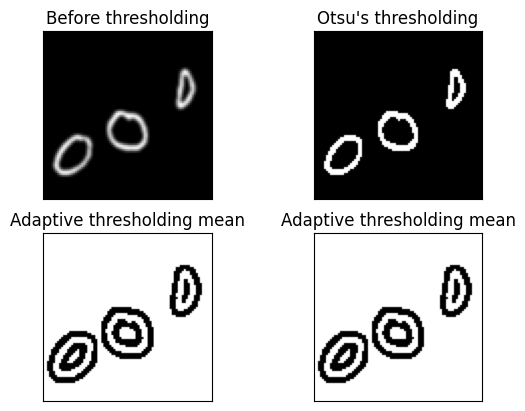

In [11]:
# apply adaptive thresholding with mean threshold Value
# Threshold Value = (Mean of the neighbourhood area values – constant value)
ADAPTIVE_THRESH_MEAN = cv2.adaptiveThreshold(
    GaussianBlur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 10
)

# apply adaptive thresholding with Gaussian threshold Value
# Threshold Value = (Gaussian-weighted sum of the neighbourhood values – constant value)
ADAPTIVE_THRESH_GAUSSIAN = cv2.adaptiveThreshold(
    GaussianBlur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 7, 4
)

plt.subplot(221), plt.imshow(GaussianBlur, cmap="gray"), plt.title(
    "Before thresholding"
)
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(OTSU_THRESH, cmap="gray"), plt.title(
    "Otsu's thresholding"
)
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(ADAPTIVE_THRESH_MEAN, cmap="gray"), plt.title(
    "Adaptive thresholding mean"
)
plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(ADAPTIVE_THRESH_MEAN, cmap="gray"), plt.title(
    "Adaptive thresholding mean"
)
plt.xticks([]), plt.yticks([])

plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Morphological Operations</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The fundamental morphological operations are Erosion and Dilation.<br><br>

<b>Erosion</b> removes pixels from the boundaries of objects, effectively eliminating small white noises and detaching connected objects.<br>

<b>Dilation</b> adds pixels to the object boundaries, expanding the objects in an image. In scenarios like noise removal, erosion is typically followed by dilation. This is because erosion removes white noises and shrinks the object. Dilating it afterwards helps restore the object's original area while ensuring the noise remains eliminated. Dilation is also useful for connecting broken parts of an object.</li> 
</ul>

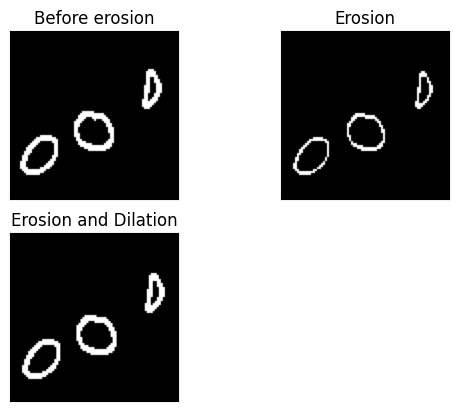

In [12]:
# Taking a matrix of size 5 as the kernel
k = 2
kernel = np.ones((k, k), np.uint8)
# choose the thresholding
thresh = OTSU_THRESH

# apply erosion followed by dilation
img_erosion = cv2.erode(thresh, kernel, iterations=1)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)


plt.subplot(221), plt.imshow(thresh, cmap="gray"), plt.title("Before erosion")
plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(img_erosion, cmap="gray"), plt.title("Erosion")
plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(img_dilation, cmap="gray"), plt.title(
    "Erosion and Dilation"
)
plt.xticks([]), plt.yticks([])

plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Comparison of Preprocessed Images with and without Resize</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The preprocess function includes the resize process, and the resize dimension can be specified in the function's parameters.</li> 
</ul>

In [13]:
def preprocess_full(image, width, height):

    # resize image by dim = (width, height)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

    # blur it by kernal size k
    k = 3
    GaussianBlur = cv2.GaussianBlur(resized, (k, k), 0)

    # apply Otsu's automatic thresholding
    (T, OTSU_THRESH) = cv2.threshold(
        GaussianBlur, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU
    )

    # apply erosion followed by dilation with kernal size k
    k = 2
    kernel = np.ones((k, k), np.uint8)
    img_erosion = cv2.erode(OTSU_THRESH, kernel, iterations=1)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)

    return img_dilation

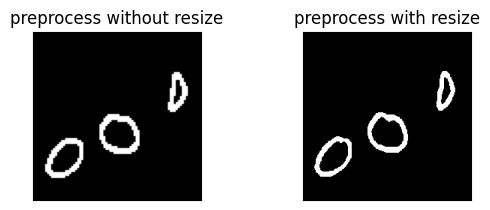

In [14]:
# the original dimension of images is (84,84)
preprocess_without_resize = preprocess_full(gray, 84, 84)
# the resized dimension is set to (224,224)
preprocess_with_resize = preprocess_full(gray, 224, 224)

plt.subplot(221), plt.imshow(
    preprocess_without_resize, cmap="gray"
), plt.title("preprocess without resize")
plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(preprocess_with_resize, cmap="gray"), plt.title(
    "preprocess with resize"
)
plt.xticks([]), plt.yticks([])

plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>After preprocessing, there is a noticeable difference between the images. The resized image appears smoother. <br>
    Although the above preprocessing introduces some changes to the image, it does not yield significant performance improvements. Therefore, a simpler preprocessing method is used, involving only resizing.</li>
    <br>
</ul>
</div>

In [15]:
def preprocess_simple(image, width, height):

    # resize image by dim = (width, height)
    dim = (width, height)
    resized = cv2.resize(image, dim, interpolation=cv2.INTER_AREA)

    return resized

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Finding and Drawing Contours</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Contours can be explained simply as a curve joining all the continuous points (along the boundary), having same color or intensity. The contours are a useful tool for shape analysis and object detection and recognition.</li> 
</ul>

In [16]:
# Find contours
contours, hierarchy = cv2.findContours(
    gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

In [17]:
len(contours)

3

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>There are three external contour in the image.</li>
    <br>
</ul>
</div>

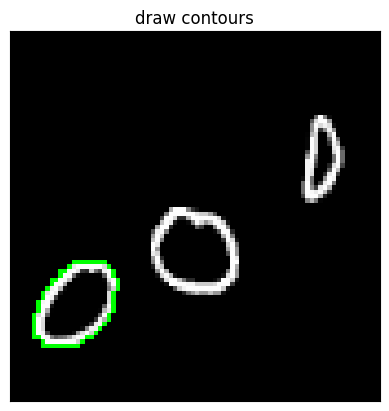

In [18]:
# Use deep copy to avoid changing the image
pic = img.copy()

# draw contours
cnt = contours[0]
draw_Contours = cv2.drawContours(pic, [cnt], 0, (0, 255, 0), 1)

plt.subplot(111), plt.imshow(draw_Contours), plt.title("draw contours")
plt.xticks([]), plt.yticks([])

plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Dividing the Image into Three Parts</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The original images can be split into three separate sub-images, each containing a single digit, and subsequently, the Region of Interest (ROI) can be extracted from each sub-image.</li> 
</ul>

In [19]:
def divide(image):

    # find all zero column in the image
    zero_colums = np.where(~image.any(axis=0))[0]

    # find the partitions which can divide the image into three part
    # choose the column located at 1/3 of image width
    d1 = int(image.shape[1] / 3) - 1

    # if that column is not all zero, then find the nearest colum
    i1 = np.argmin(abs(zero_colums - d1))
    d1 = zero_colums[i1]

    # choose the column located at 2/3 of image width
    d2 = int(2 * image.shape[1] / 3) - 1

    # if that column is not all zero, then find the nearest column
    i2 = np.argmin(abs(zero_colums - d2))
    d2 = zero_colums[i2]

    # use d1,d2 as partition to divide image
    part1 = image[:, :d1]
    part2 = image[:, d1 + 1 : d2]
    part3 = image[:, d2 + 1 :]

    return part1, part2, part3

In [21]:
part1, part2, part3 = divide(gray)

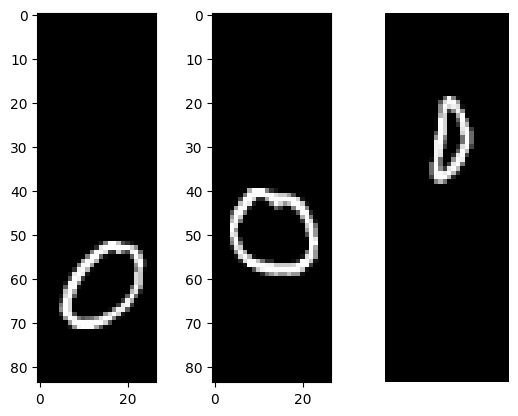

In [22]:
# Display three parts of the division
plt.subplot(1, 3, 1)
plt.imshow(part1, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(part2, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(part3, cmap="gray")

plt.axis("off")
plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Extracting Region of Interest (ROI) by Contours</li>
</ul>

In [23]:
def extract_by_contours(image):

    # Find contours
    contours, hierarchy = cv2.findContours(
        image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    # extract ROI by contour
    x, y, w, h = cv2.boundingRect(contours[0])
    ROI = image[y : y + h, x : x + w]

    # add padding to the ROI
    top = int(0.2 * ROI.shape[0])  # shape[0] = rows
    bottom = top
    left = int(0.2 * ROI.shape[1])  # shape[1] = cols
    right = left
    ROI = cv2.copyMakeBorder(
        ROI, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0
    )

    return ROI

In [24]:
ROI1 = extract_by_contours(part1)
ROI2 = extract_by_contours(part2)
ROI3 = extract_by_contours(part3)

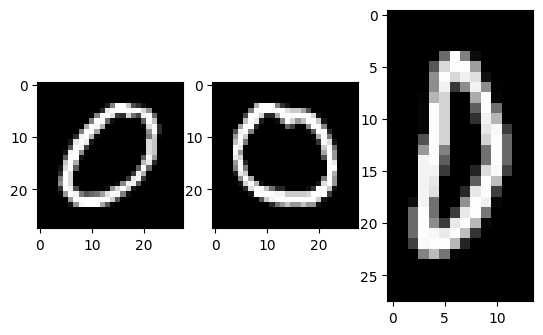

In [25]:
# Display three parts of the division
plt.subplot(1, 3, 1)
plt.imshow(ROI1, cmap="gray")

plt.subplot(1, 3, 2)
plt.imshow(ROI2, cmap="gray")

plt.subplot(1, 3, 3)
plt.imshow(ROI3, cmap="gray")

# plt.axis("off")
plt.show()

In [26]:
print("ROI1 Dimensions : ", ROI1.shape)
print("ROI2 Dimensions : ", ROI2.shape)
print("ROI3 Dimensions : ", ROI3.shape)

ROI1 Dimensions :  (28, 28)
ROI2 Dimensions :  (28, 28)
ROI3 Dimensions :  (28, 14)


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The parts of the image have different dimensions, so the resize operation will be performed later.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Removing Zero Padding</li>
</ul>

In [27]:
def remove_zero_pad(image):

    d = 1
    dummy = np.argwhere(image != 0)  # assume blackground is zero
    max_y = dummy[:, 0].max()
    min_y = dummy[:, 0].min()
    min_x = dummy[:, 1].min()
    max_x = dummy[:, 1].max()
    lby = max(min_y - d, 0)
    lbx = max(min_x - d, 0)
    crop_image = image[lby : max_y + d, lbx : max_x + d]

    # add padding to the crop_image
    # top = int(0.2 * crop_image.shape[0])  # shape[0] = rows
    top = 1
    bottom = top
    # left = int(0.2 * crop_image.shape[1])  # shape[1] = cols
    left = 1
    right = left
    crop_image = cv2.copyMakeBorder(
        crop_image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=0
    )

    return crop_image

In [28]:
ROI = remove_zero_pad(part1)

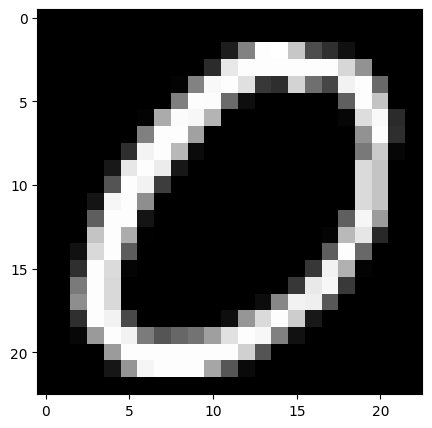

In [38]:
ROI_colormap = np.array([[[v, v, v] for v in row] for row in ROI])  
fig, ax = plt.subplots(figsize=(12, 5))
ax.imshow(ROI_colormap)
plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Batch Loading the Dataset</li>
</ul>

In [39]:
# mark the preprocess function
preprocess = "preprocess_simple"

In [40]:
# set the number of label class
num_classes = 10

In [41]:
# set the loading function
#load_fun = load_split

In [42]:
# Set the resized dimension of training image here
# resize extracted ROI with this dimension by the preprecess function
width, height = 28, 28

In [43]:
# convert integers to one hot ecoding
label_sample = tf.keras.utils.to_categorical(list(range(10)), num_classes=10)

# define a multi-label one hot encoding function
def multi_label_one_hot(folder_name):
    y_one_hot = []

    for i in range(0, len(folder_name)):
        multi_label = []
        for j in folder_name[i]:
            a = int(j)
            multi_label.append(label_sample[a])

        y_one_hot.append(multi_label)

    y_one_hot = np.array(y_one_hot)

    return y_one_hot

In [44]:
# load the images and split them to three parts
def load_split(path, width=width, height=height):

    image_array = []
    label_array = []

    # load image iteratively through all file
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):

            # Check whether file is in text format or not
            if file.endswith(".png"):

                # set file path and read the file
                file_path = os.path.join(path, folder, file)
                img = cv2.imread(file_path)

                # convert the image to grayscale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # divide image
                part1, part2, part3 = divide(gray)

                # if np.all(part1==0) or np.all(part2==0) or np.all(part3==0):
                # continue
                if np.all(part1 == 0):
                    continue
                if np.all(part2 == 0):
                    continue
                if np.all(part3 == 0):
                    continue

                # extract ROI
                ROI1 = remove_zero_pad(part1)
                ROI2 = remove_zero_pad(part2)
                ROI3 = remove_zero_pad(part3)

                # there are two choices of preprocess function
                if preprocess == "preprocess_simple":
                    preprocessed1 = preprocess_simple(ROI1, width, height)
                    preprocessed2 = preprocess_simple(ROI2, width, height)
                    preprocessed3 = preprocess_simple(ROI3, width, height)

                elif preprocess == "preprocess_full":
                    preprocessed1 = preprocess_full(ROI1, width, height)
                    preprocessed2 = preprocess_full(ROI2, width, height)
                    preprocessed3 = preprocess_full(ROI3, width, height)

                # append the image
                image_array.append(preprocessed1)
                image_array.append(preprocessed2)
                image_array.append(preprocessed3)

                # use list function on the folder
                # split the three digits label into three single digit label
                for label in list(folder):
                    # append the label
                    label_array.append(label)

    # convert it to array
    image_array = np.array(image_array)
    label_array = np.array(label_array)

    return image_array, label_array

In [45]:
# load the images and don't split them
def load_no_split(path):

    image_array = []
    label_array = []

    # load image iteratively through all file
    for folder in os.listdir(path):
        for file in os.listdir(os.path.join(path, folder)):

            # Check whether file is in text format or not
            if file.endswith(".png"):

                # set file path and read the file
                file_path = os.path.join(path, folder, file)
                img = cv2.imread(file_path)

                # convert the image to grayscale
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                # there are two choices of preprocess function
                # if preprocess == "preprocess_simple":
                # preprocessed = preprocess_simple(gray, width, height)

                # elif preprocess == "preprocess_full":
                # preprocessed = preprocess_full(gray, width, height)

                # append the image
                # image_array.append(preprocessed)
                image_array.append(gray)

                # append the label
                label_array.append(multi_label_one_hot(folder))

    # convert it to array
    image_array = np.array(image_array)
    label_array = np.array(label_array)

    return image_array, label_array

In [46]:
# load train and test dataset
def load_dataset(load_fun):

    # assign the loading path
    train_path = (r"dataset2\triple_mnist\train")
    valid_path = (r"dataset2\triple_mnist\val")
    test_path = (r"dataset2\triple_mnist\test")

    # batch load
    x_train, y_train = load_fun(train_path)
    x_valid, y_valid = load_fun(valid_path)
    x_test, y_test = load_fun(test_path)

    # contatenating both train and test dataset to create one large dataset.
    x_train = np.concatenate((x_train, x_valid))
    y_train = np.concatenate((y_train, y_valid))

    # reshape the input data to a 4D tensor (batch_size, height, width, channels)
    x_train = x_train.reshape(
        x_train.shape[0], x_train.shape[1], x_train.shape[2], 1
    )
    x_test = x_test.reshape(
        x_test.shape[0], x_test.shape[1], x_test.shape[2], 1
    )

    if load_fun == load_split:

        # convert the target labels to one-hot encoding
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)

    return x_train, y_train, x_test, y_test

In [47]:
# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype("float32")
    test_norm = test.astype("float32")
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

In [113]:
# load dataset
x_train, y_train, x_test, y_test = load_dataset(load_fun=load_split)
x_train_o, y_train_o, x_test_o, y_test_o = load_dataset(load_fun=load_no_split)

In [114]:
# prepare pixel data
x_train, x_test = prep_pixels(x_train, x_test)
x_train_o, x_test_o = prep_pixels(x_train_o, x_test_o)

In [115]:
# print the shape of training data and test data
print("Training data shape:", x_train.shape, y_train.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (240000, 28, 28, 1) (240000, 10)
Test data shape: (60000, 28, 28, 1) (60000, 10)


<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="25px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Model Building</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The reason for choosing this model is because of its high accuracy.The model has seven convolutional layers, and can catch more patterns from the image. BatchNormalization is another critical point that lets it reach its accuracy. According to the comparison of other kinds of CNN model, this one can handle handwritten digit classification tasks more effectively.</li>
</ul>

In [120]:
# the model finally chosen
def model0_10label(width=width, height=height, num_classes=num_classes):

    model = Sequential(name="model0_10label")
    model.add(
        Conv2D(
            32,
            kernel_size=3,
            activation="relu",
            input_shape=(width, height, 1),
        )
    )
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=3, activation="relu"))
    model.add(BatchNormalization())
    model.add(
        Conv2D(32, kernel_size=5, strides=2, padding="same", activation="relu")
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(64, kernel_size=3, activation="relu"))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=3, activation="relu"))
    model.add(BatchNormalization())
    model.add(
        Conv2D(64, kernel_size=5, strides=2, padding="same", activation="relu")
    )
    model.add(BatchNormalization())
    model.add(Dropout(0.4))

    model.add(Conv2D(128, kernel_size=4, activation="relu"))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation="softmax"))

    # compile the model
    model.compile(
        loss="categorical_crossentropy",
        optimizer="adam",
        metrics=[
            "accuracy",
            tf.keras.metrics.Precision(),
            tf.keras.metrics.Recall(),
        ],
    )

    return model

In [121]:
# define model
model = model0_10label()

In [122]:
model.summary()

Model: "model0_10label"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        25632     
                                                                 
 batch_normalization_2 (Bat  (None, 12, 12, 32)     

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Filter Visualization</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>In neural network terminology, the learned filters are weights. However, due to their specialized two-dimensional structure, the weight values have a spatial relationship to each other. Plotting each filter as a two-dimensional image can be meaningful.</li> 
</ul>

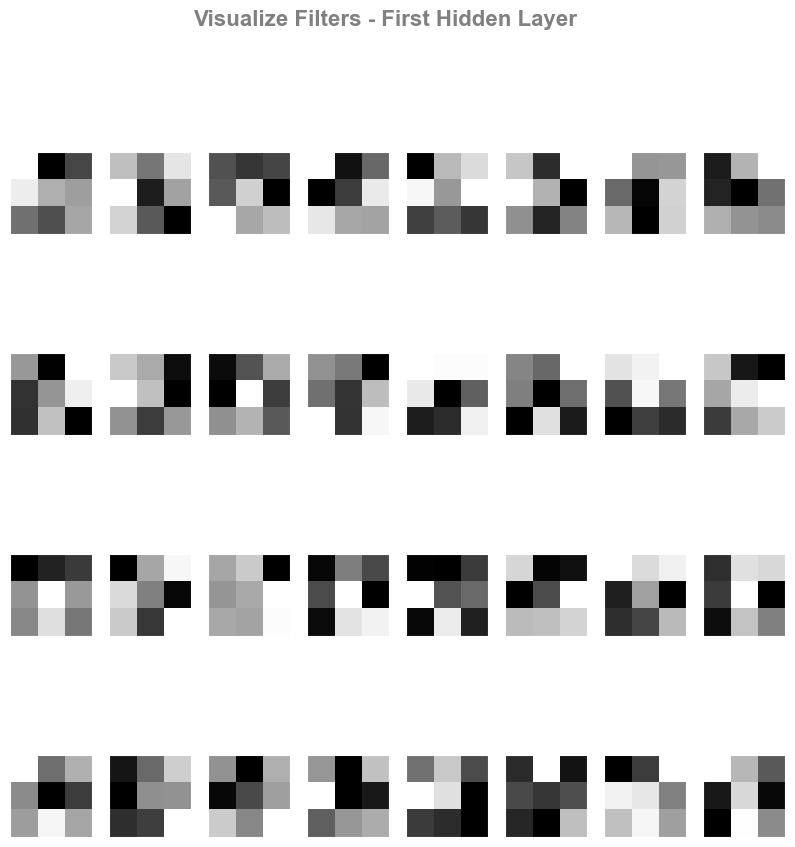

In [123]:
# Retrieve weights from the first hidden layer
filters, biases = model.layers[0].get_weights()

# Normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# Plot filters
fig = plt.figure(figsize=(10, 10))
fig.suptitle("Visualize Filters - First Hidden Layer", fontsize=16, fontweight="bold", color="grey")

ix = 1
for _ in range(8):
    for _ in range(4):
        # Specify subplot and turn off axis
        ax = fig.add_subplot(4, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # Plot filter channel in grayscale
        ax.imshow(filters[:, :, :, ix - 1], cmap="gray")
        ix += 1

# Show the figure
plt.show()

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Feature Map Visualization</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The activation maps, called feature maps, represent the result of applying the filters to the input, such as the input image or another feature map.</li> 
</ul>

Original image:


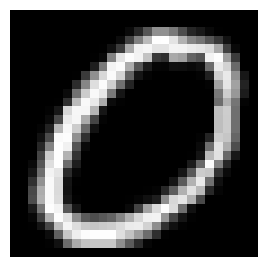

conv2d


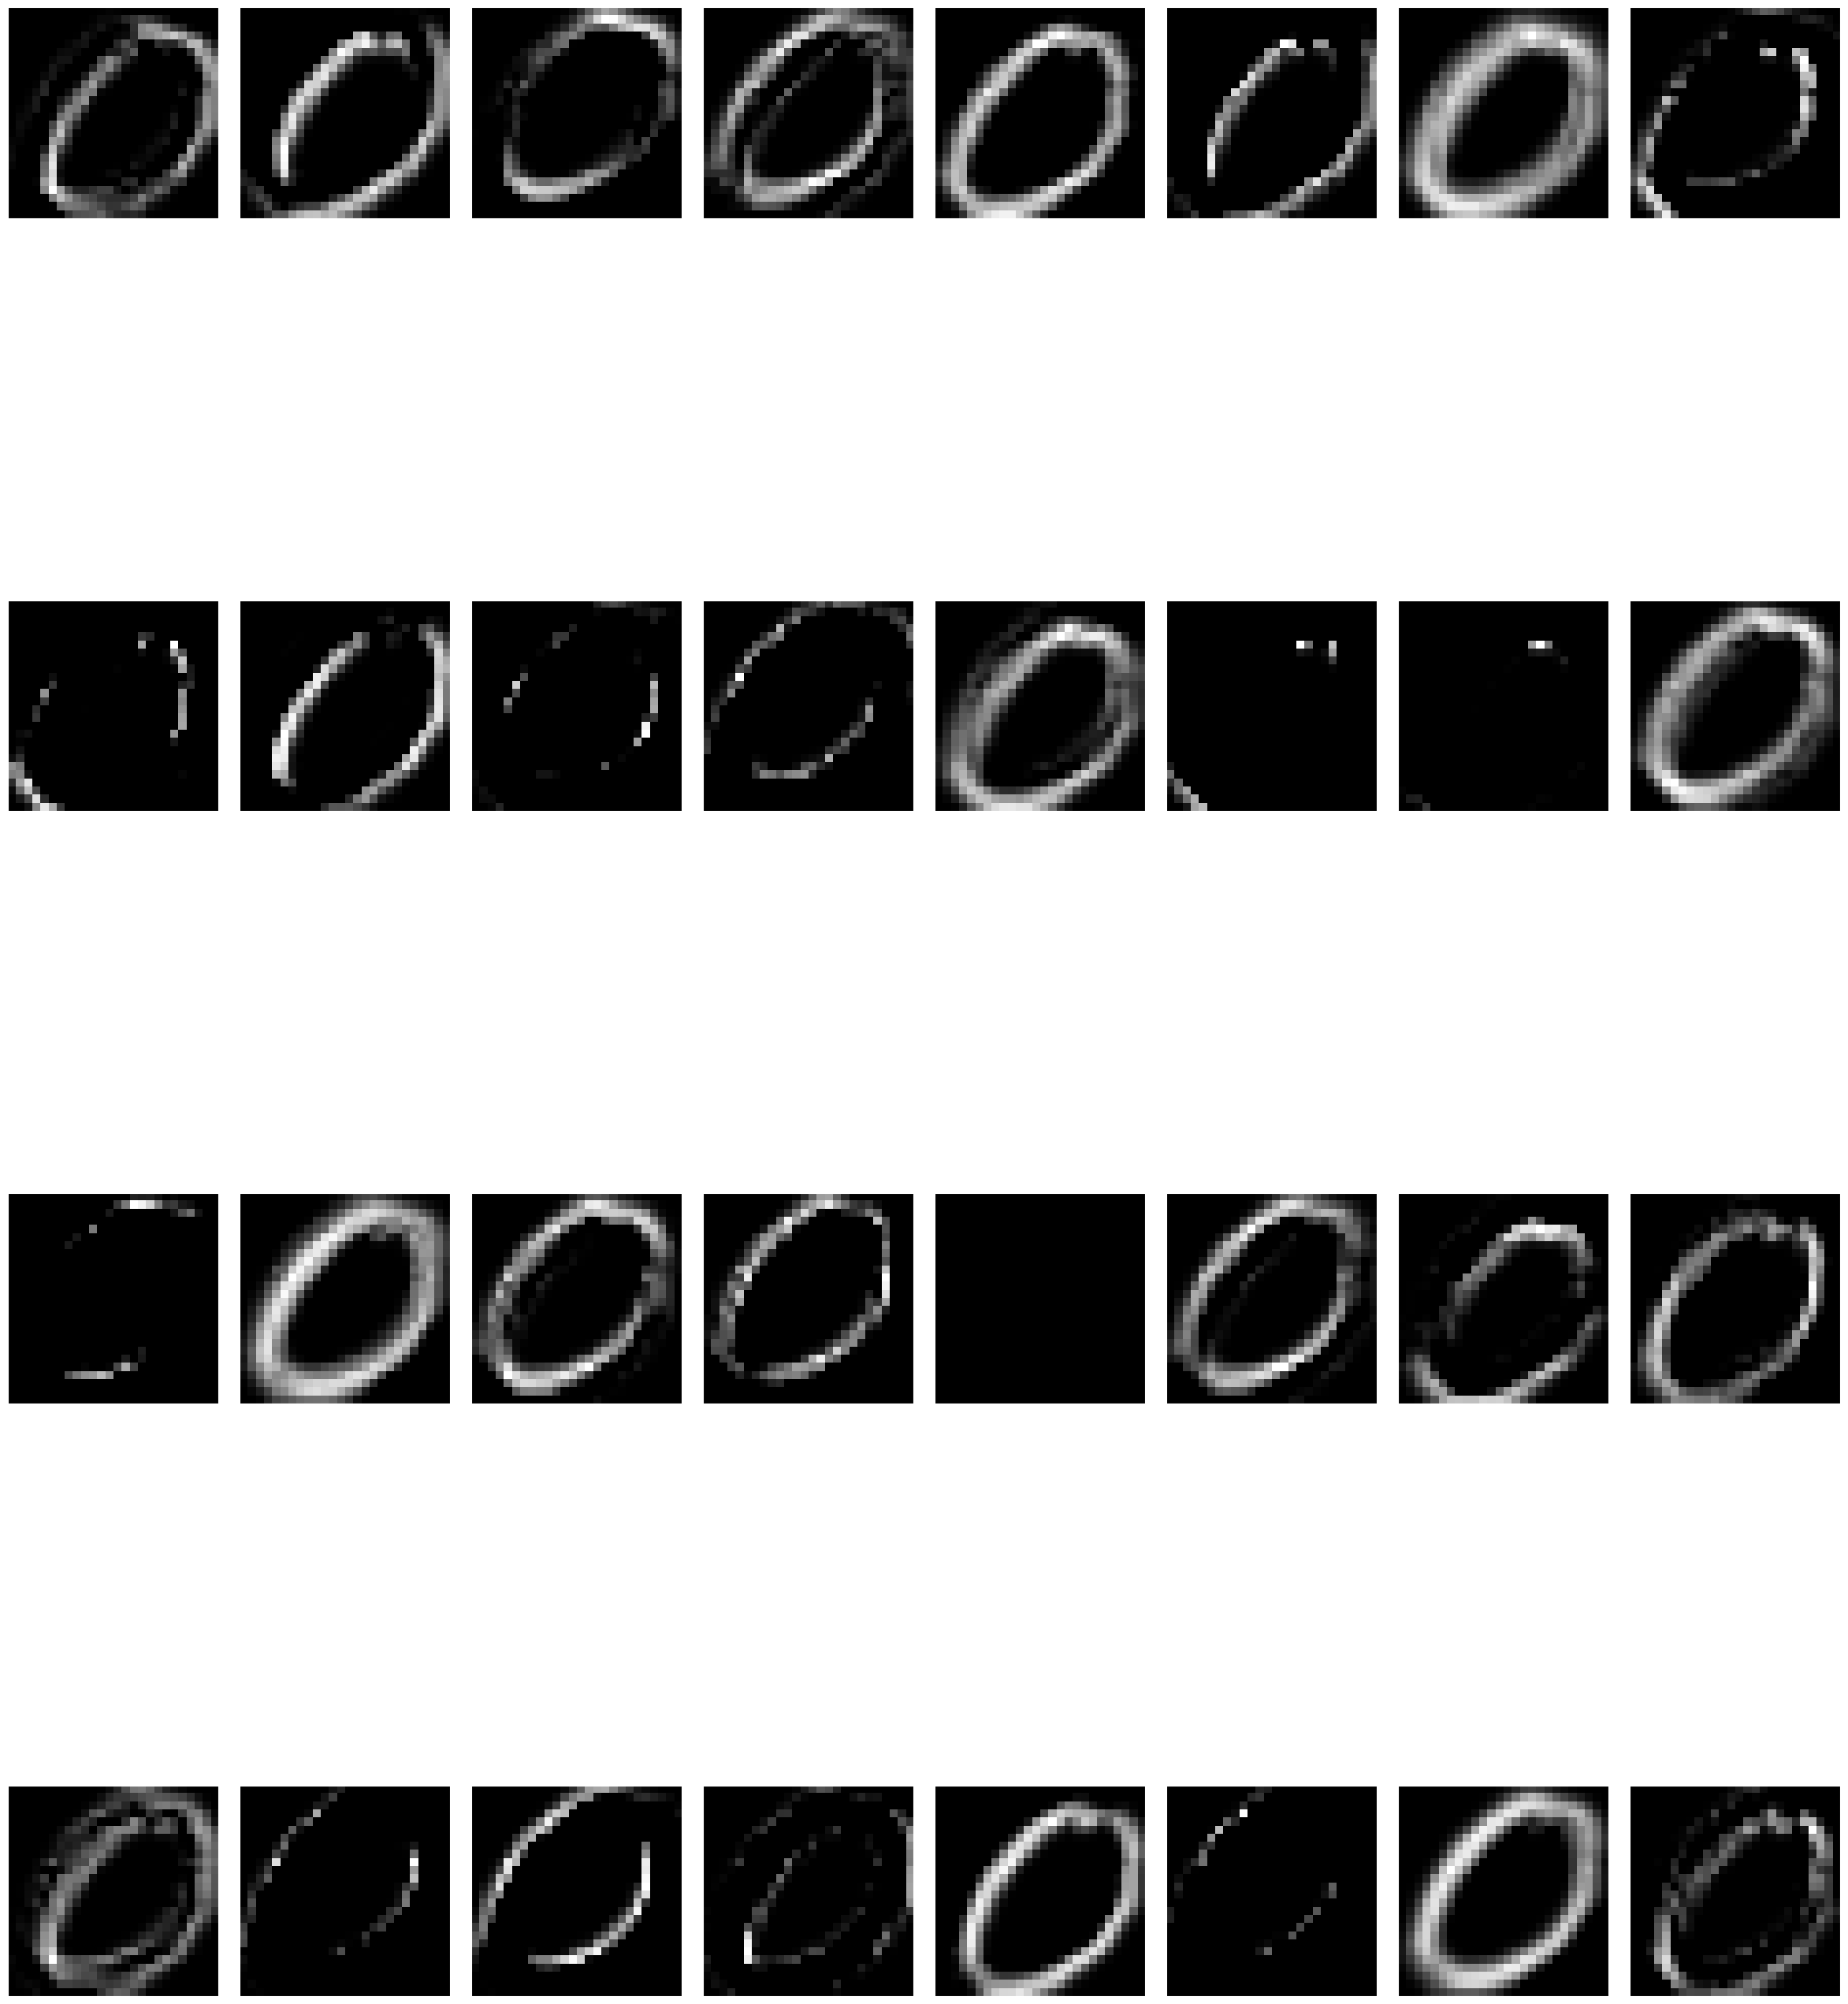

batch_normalization


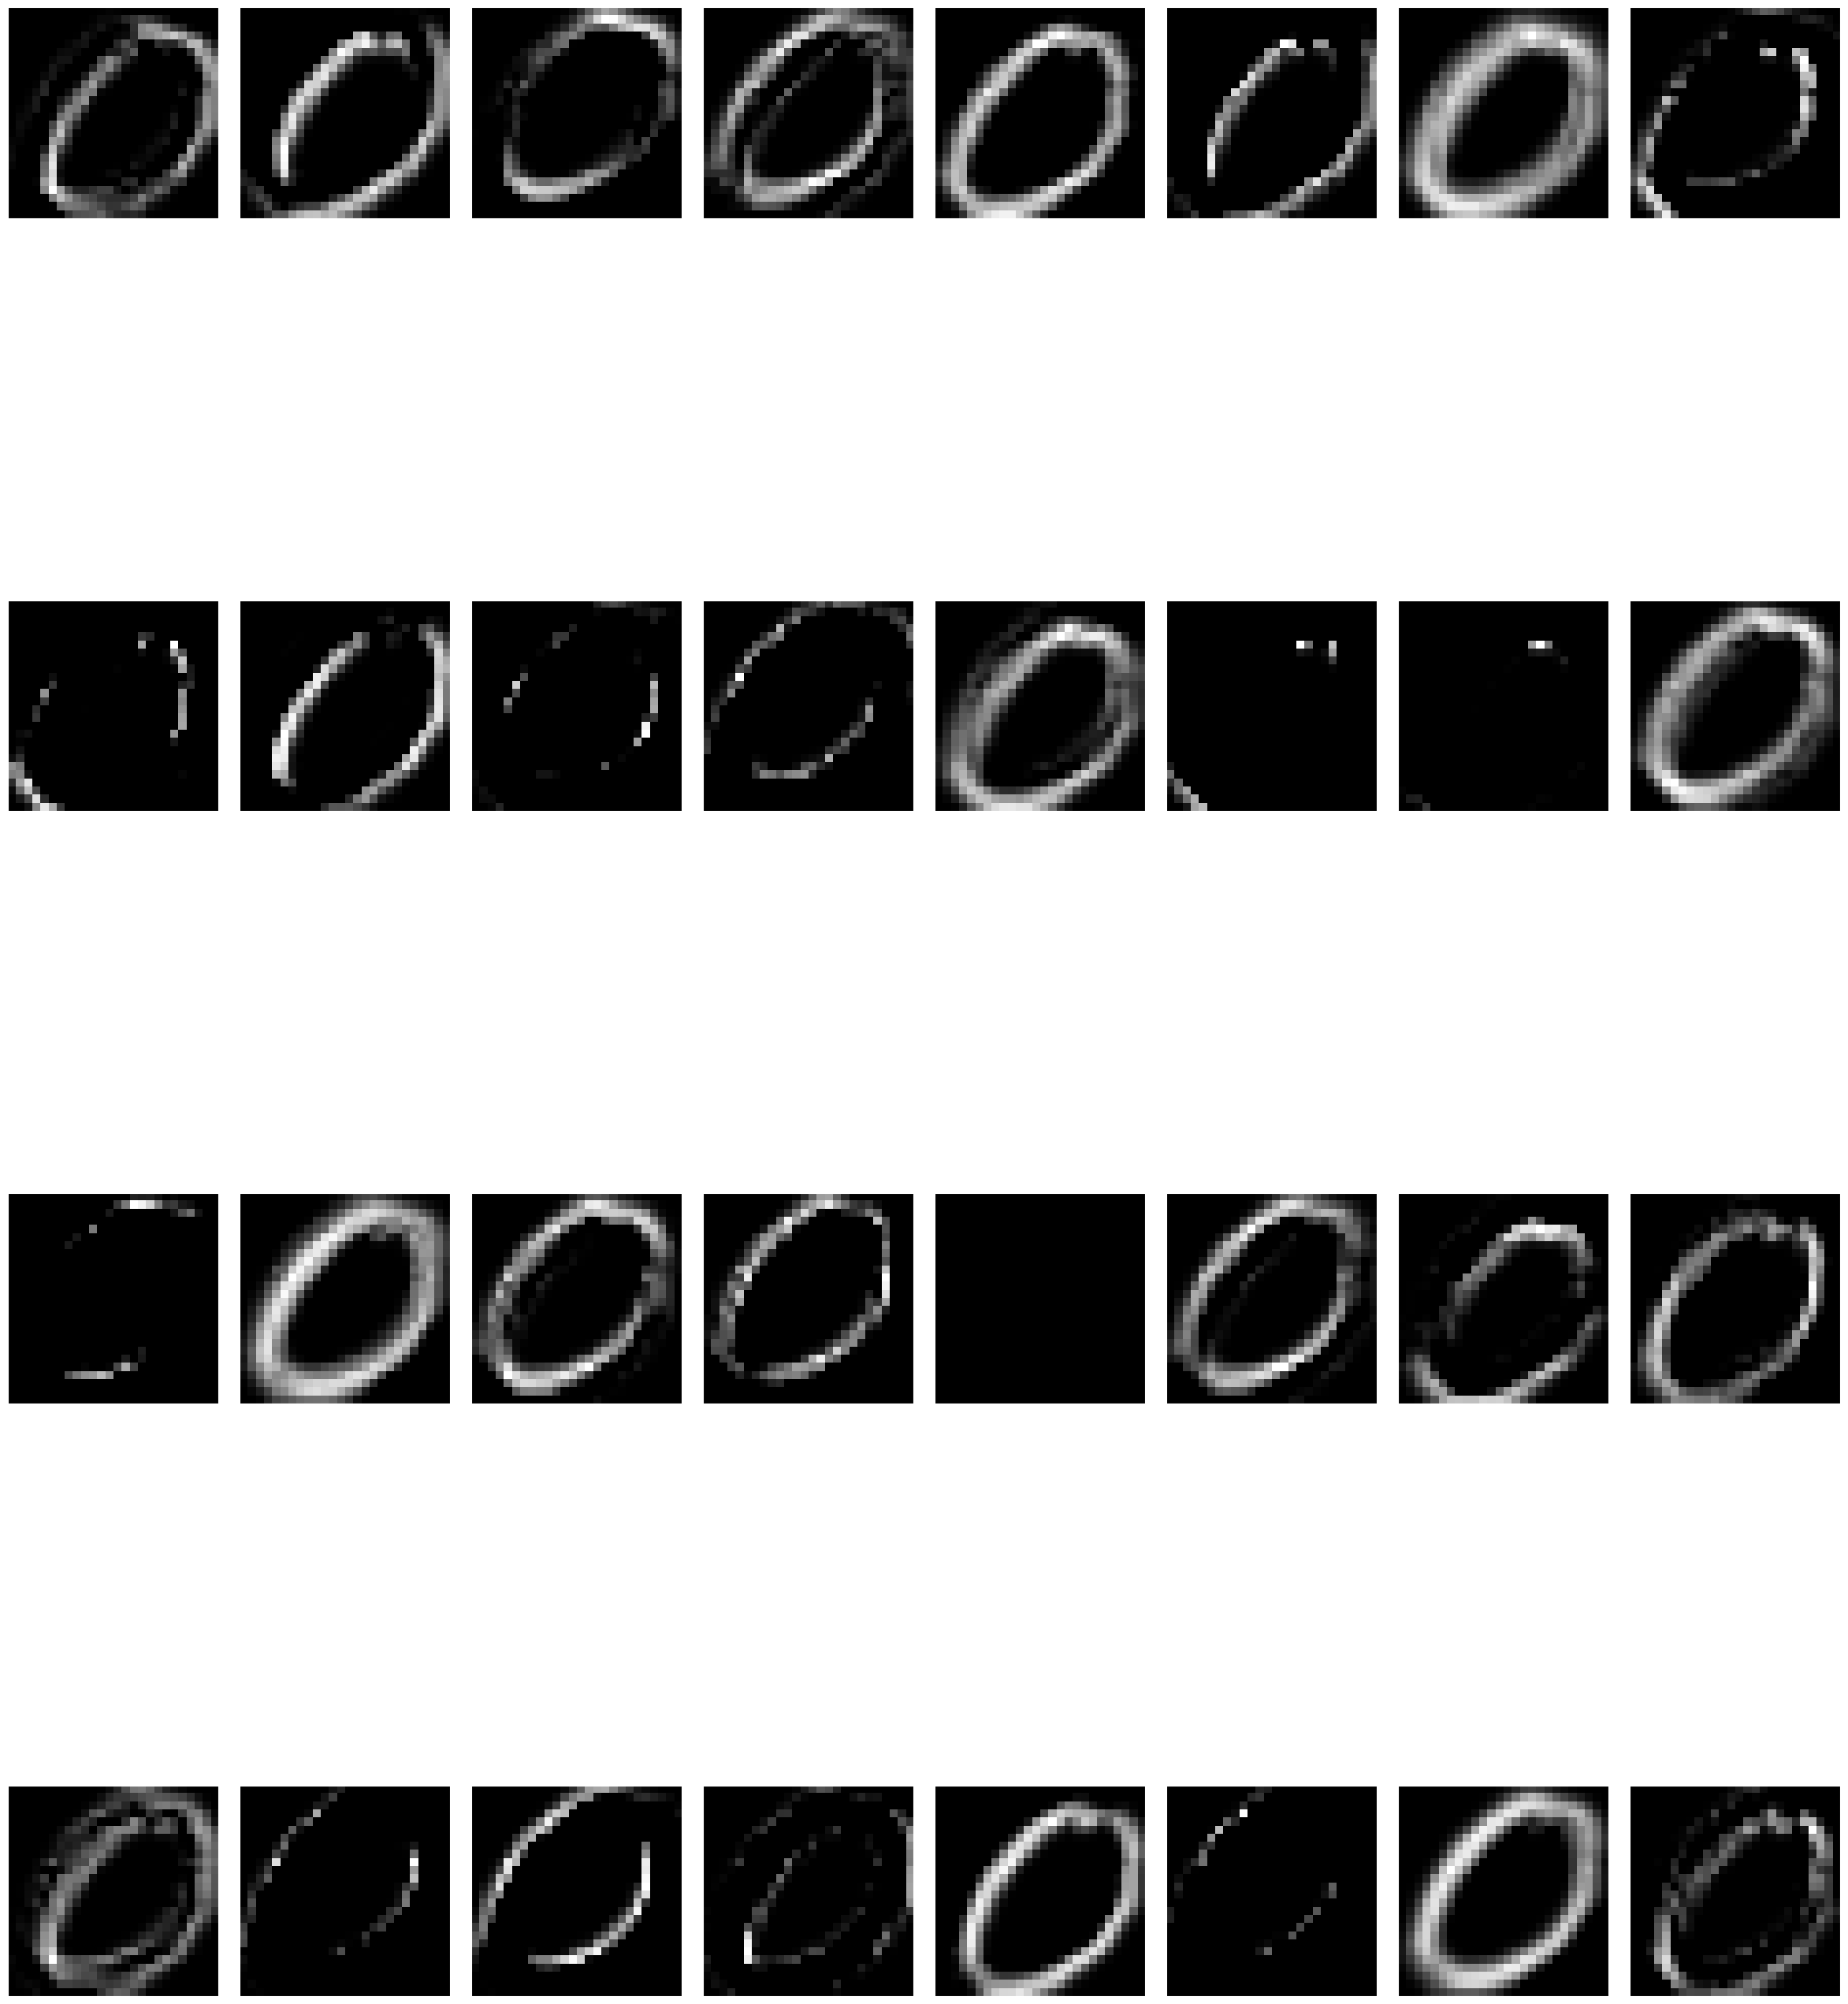

conv2d_1


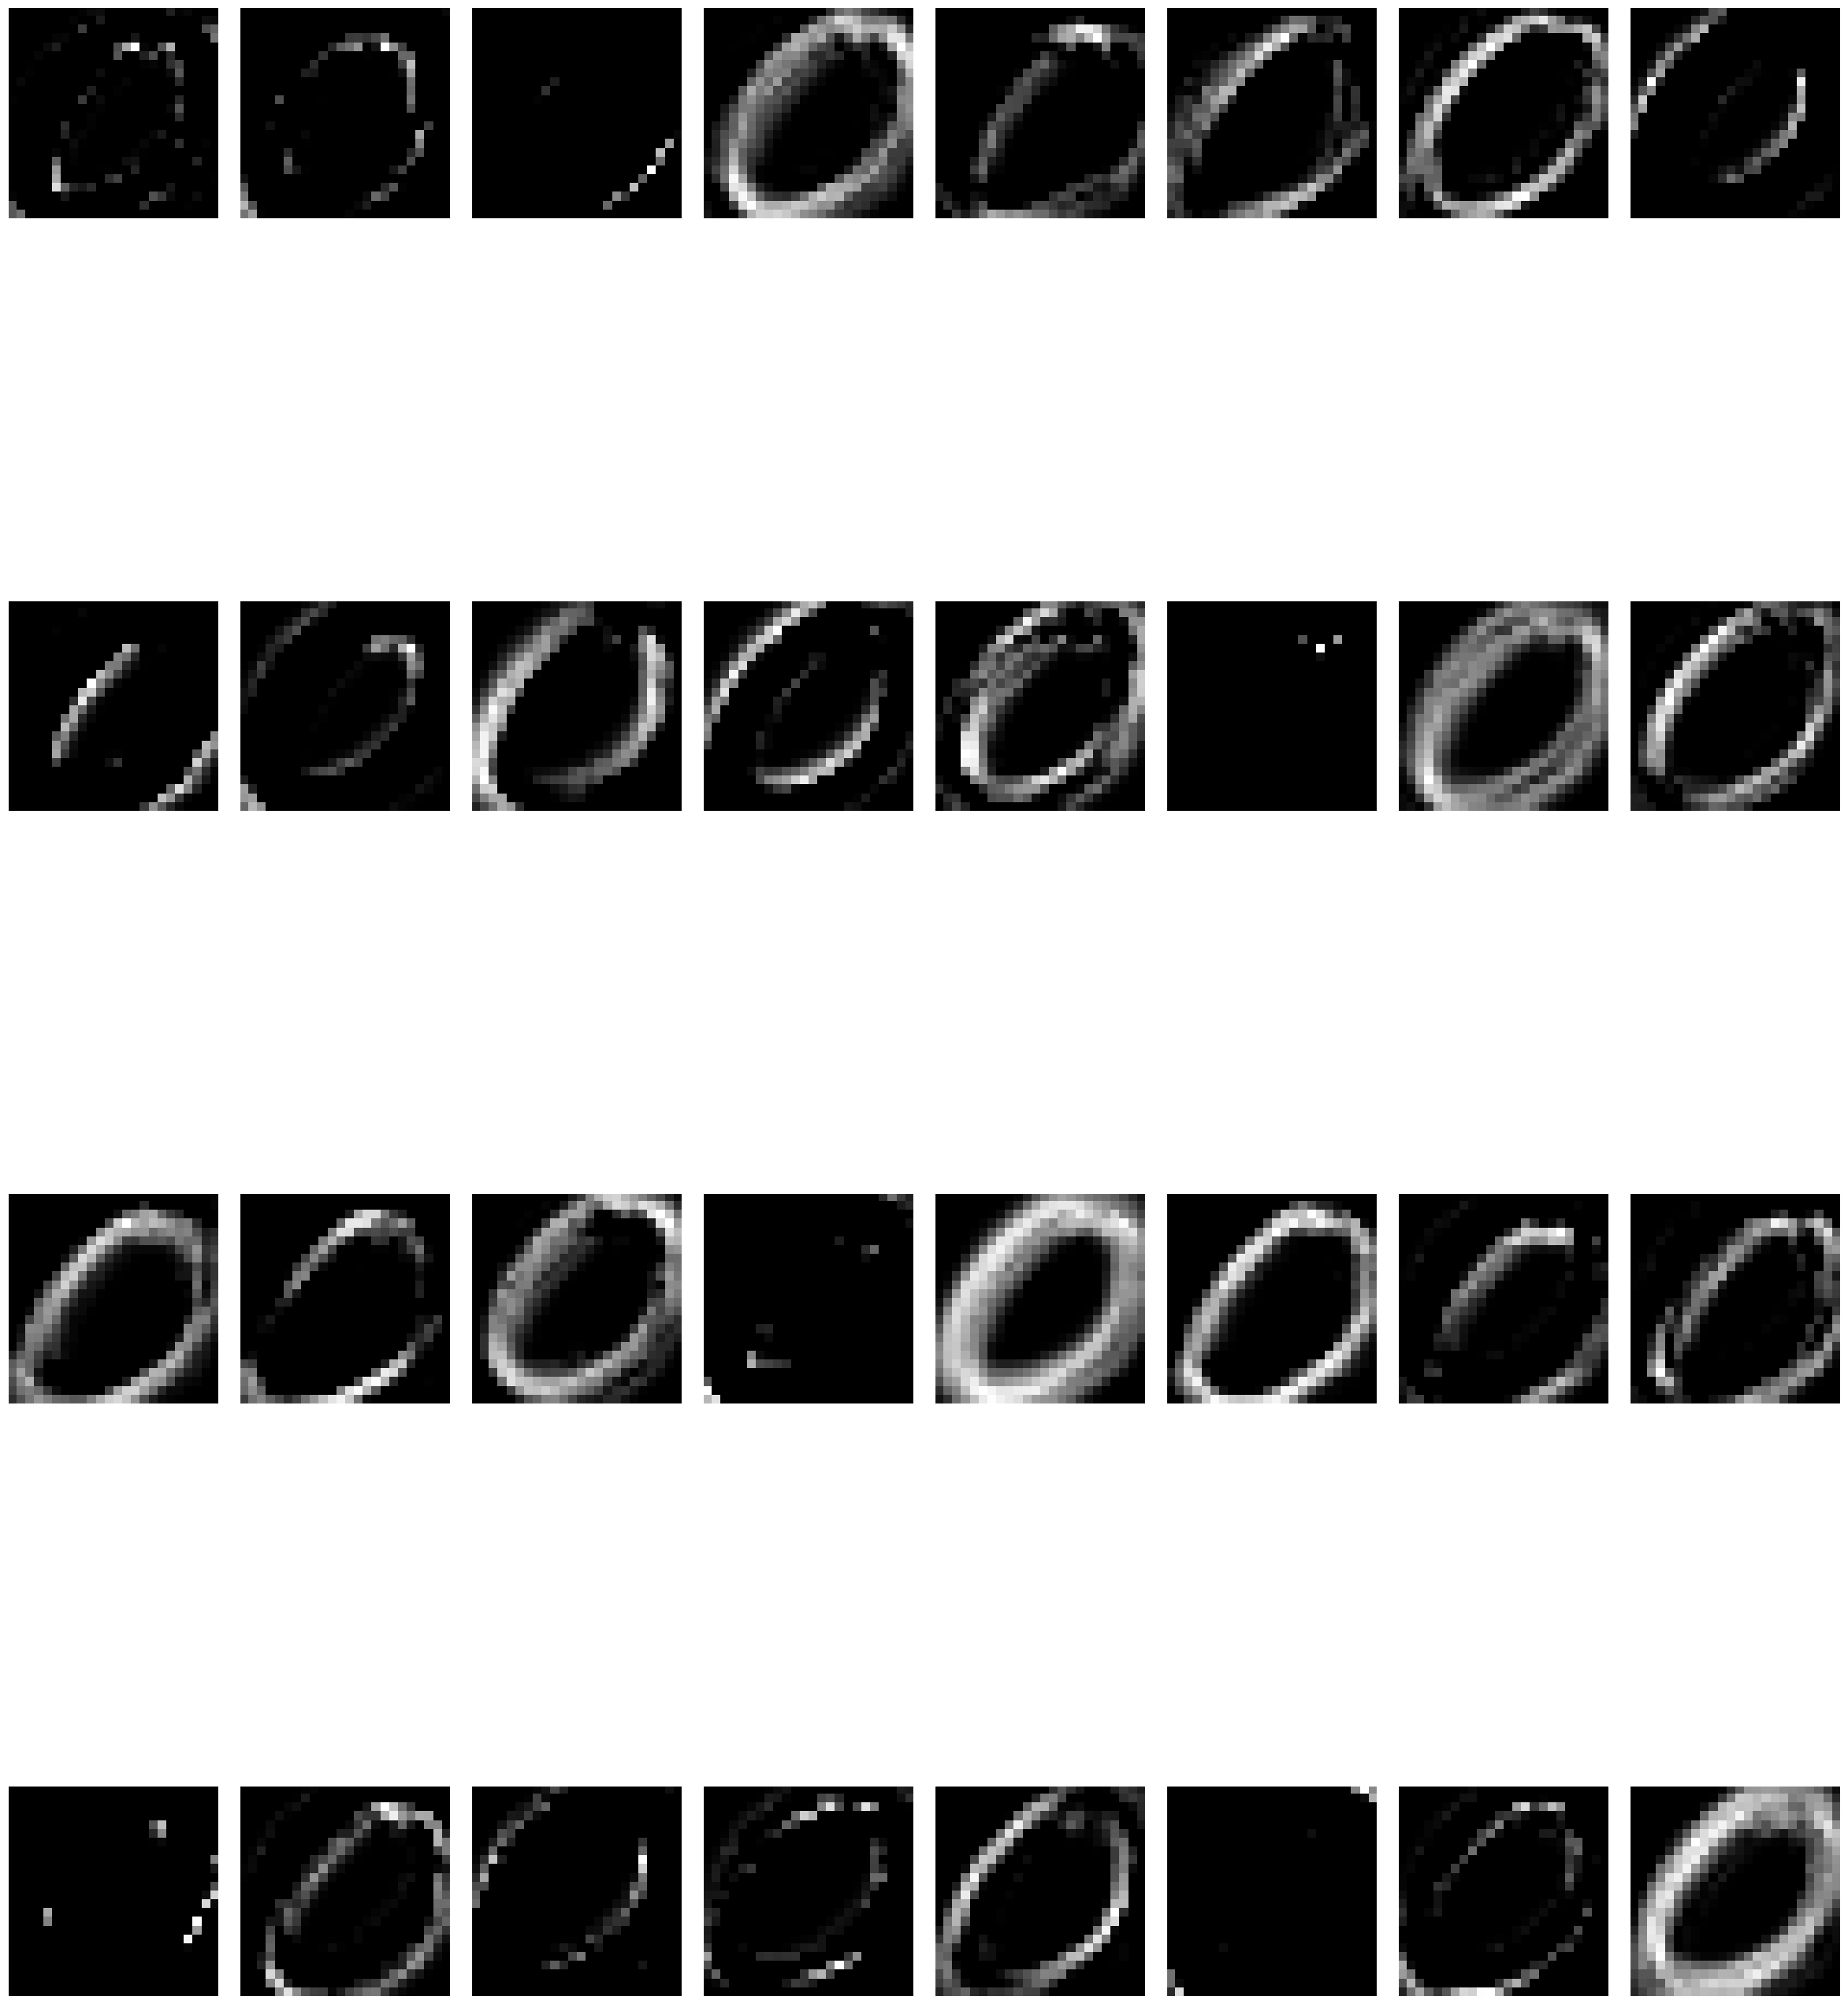

batch_normalization_1


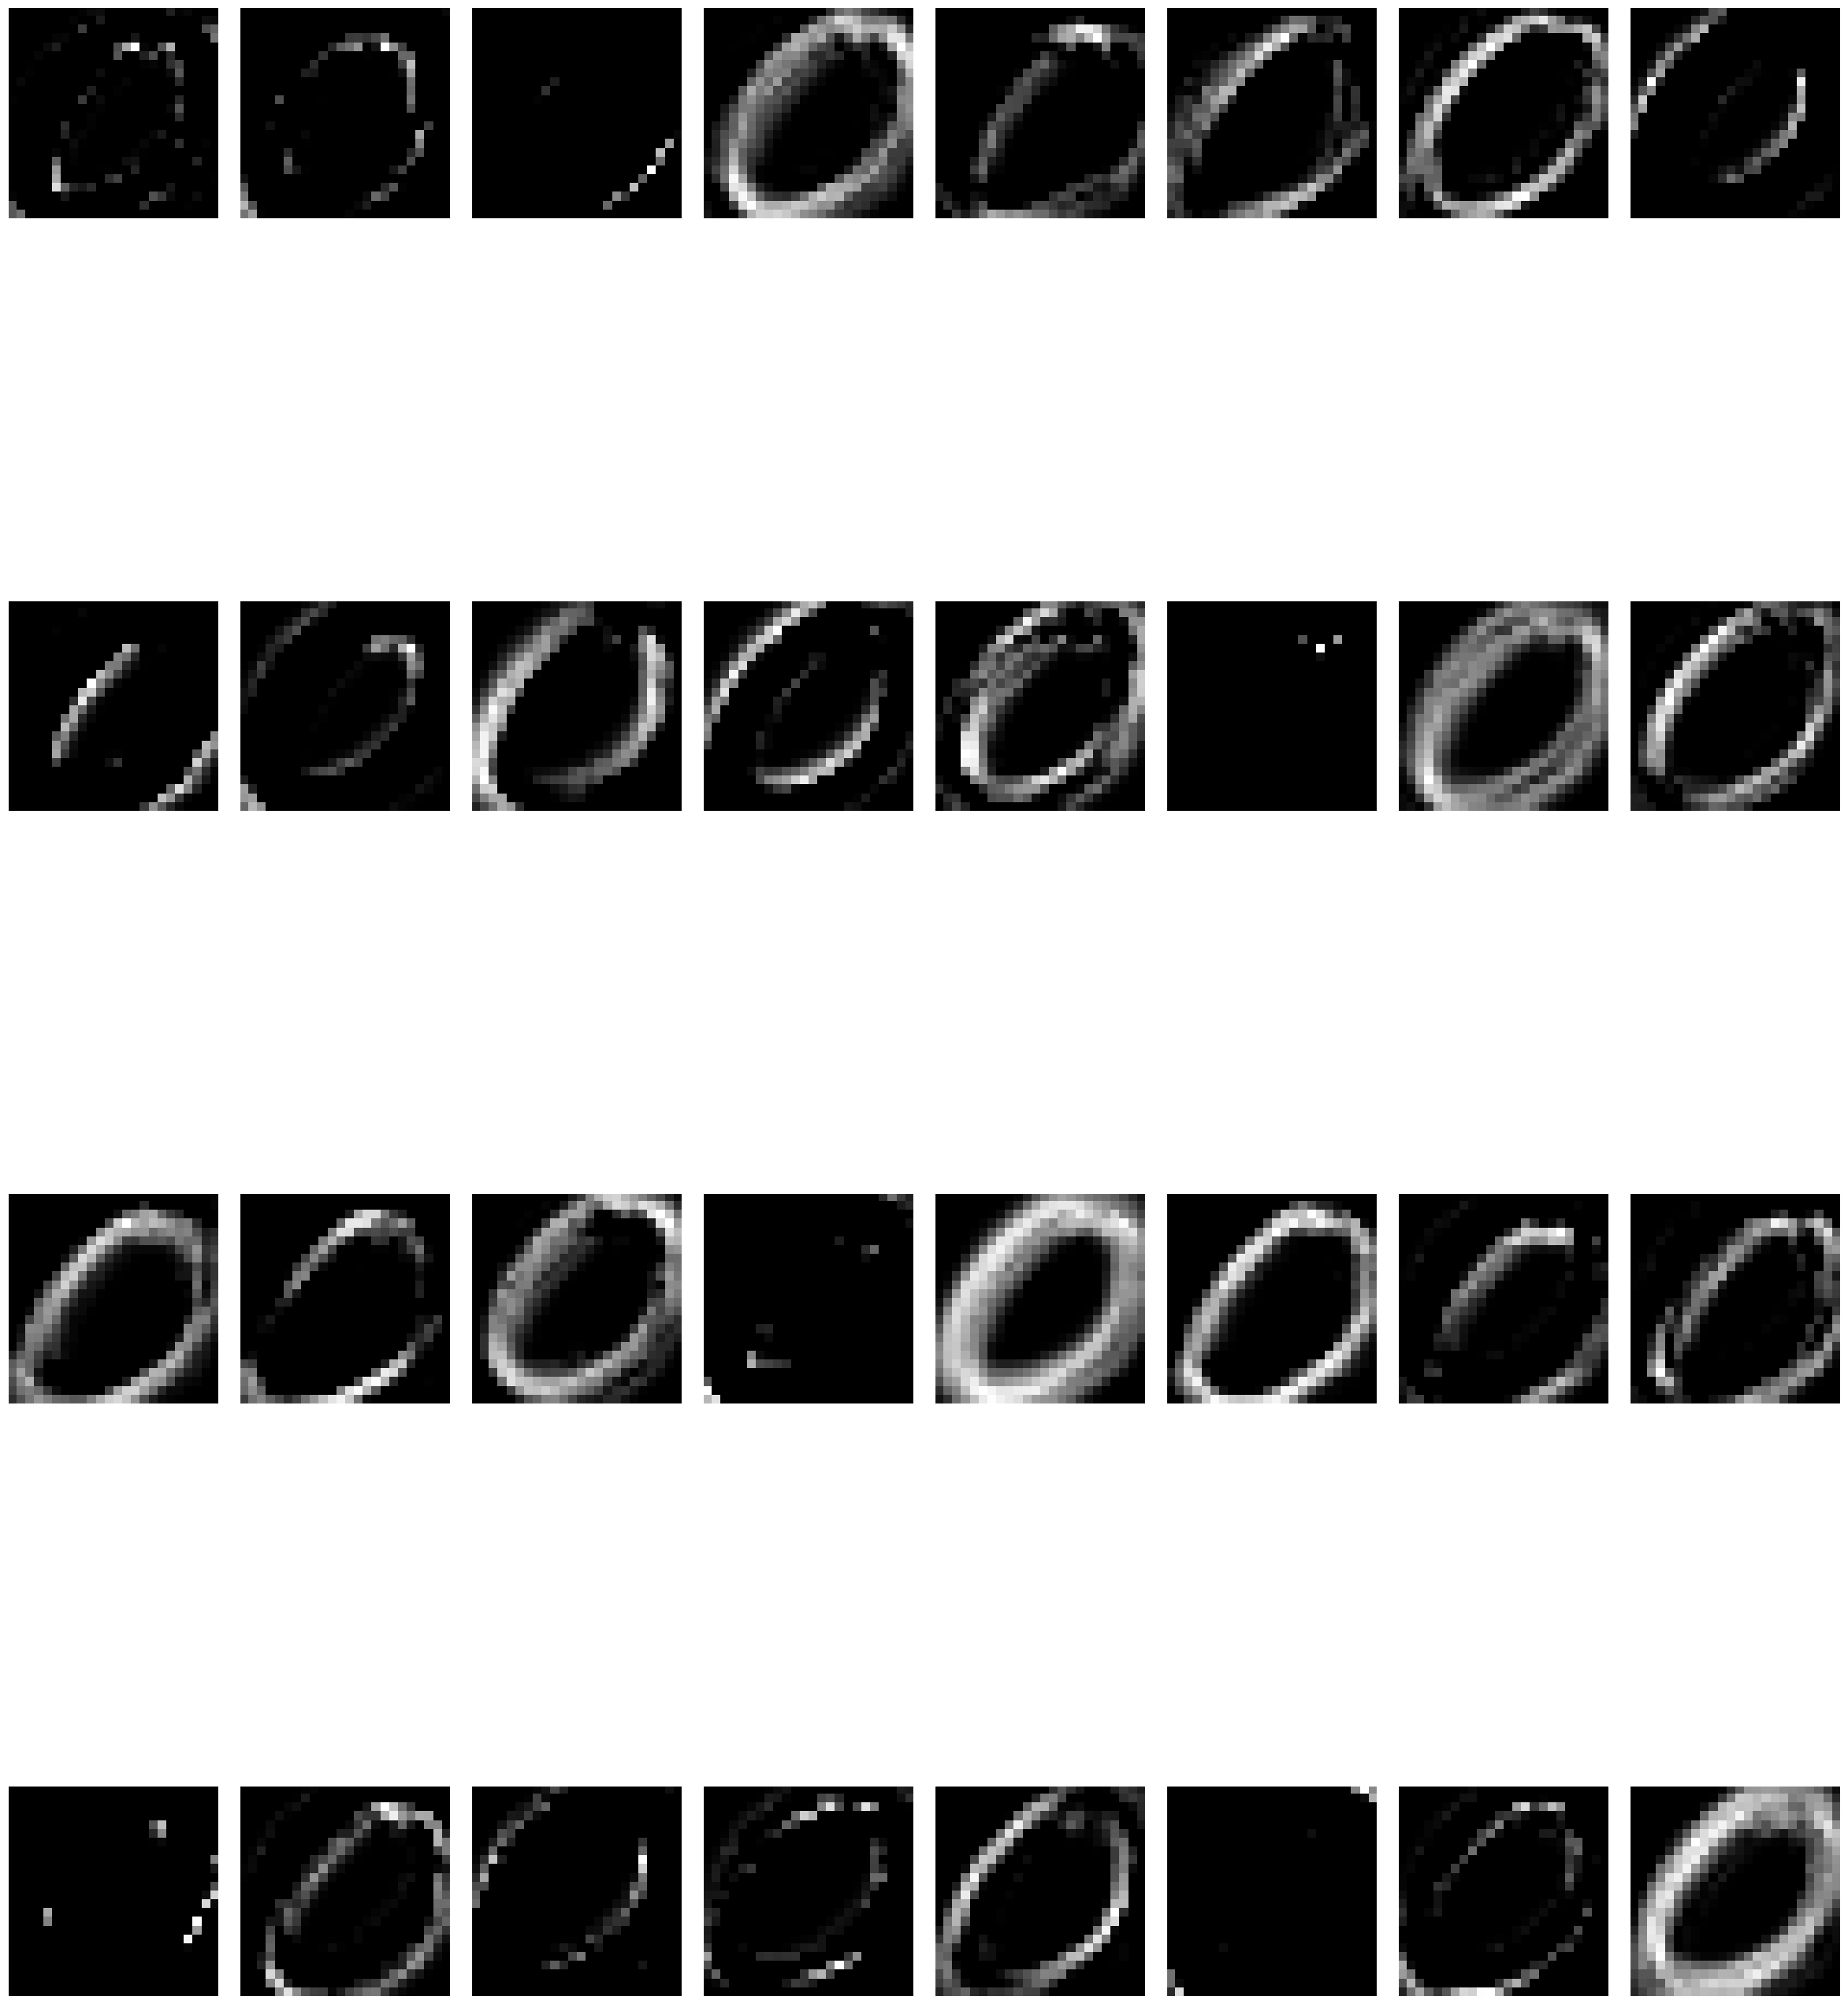

conv2d_2


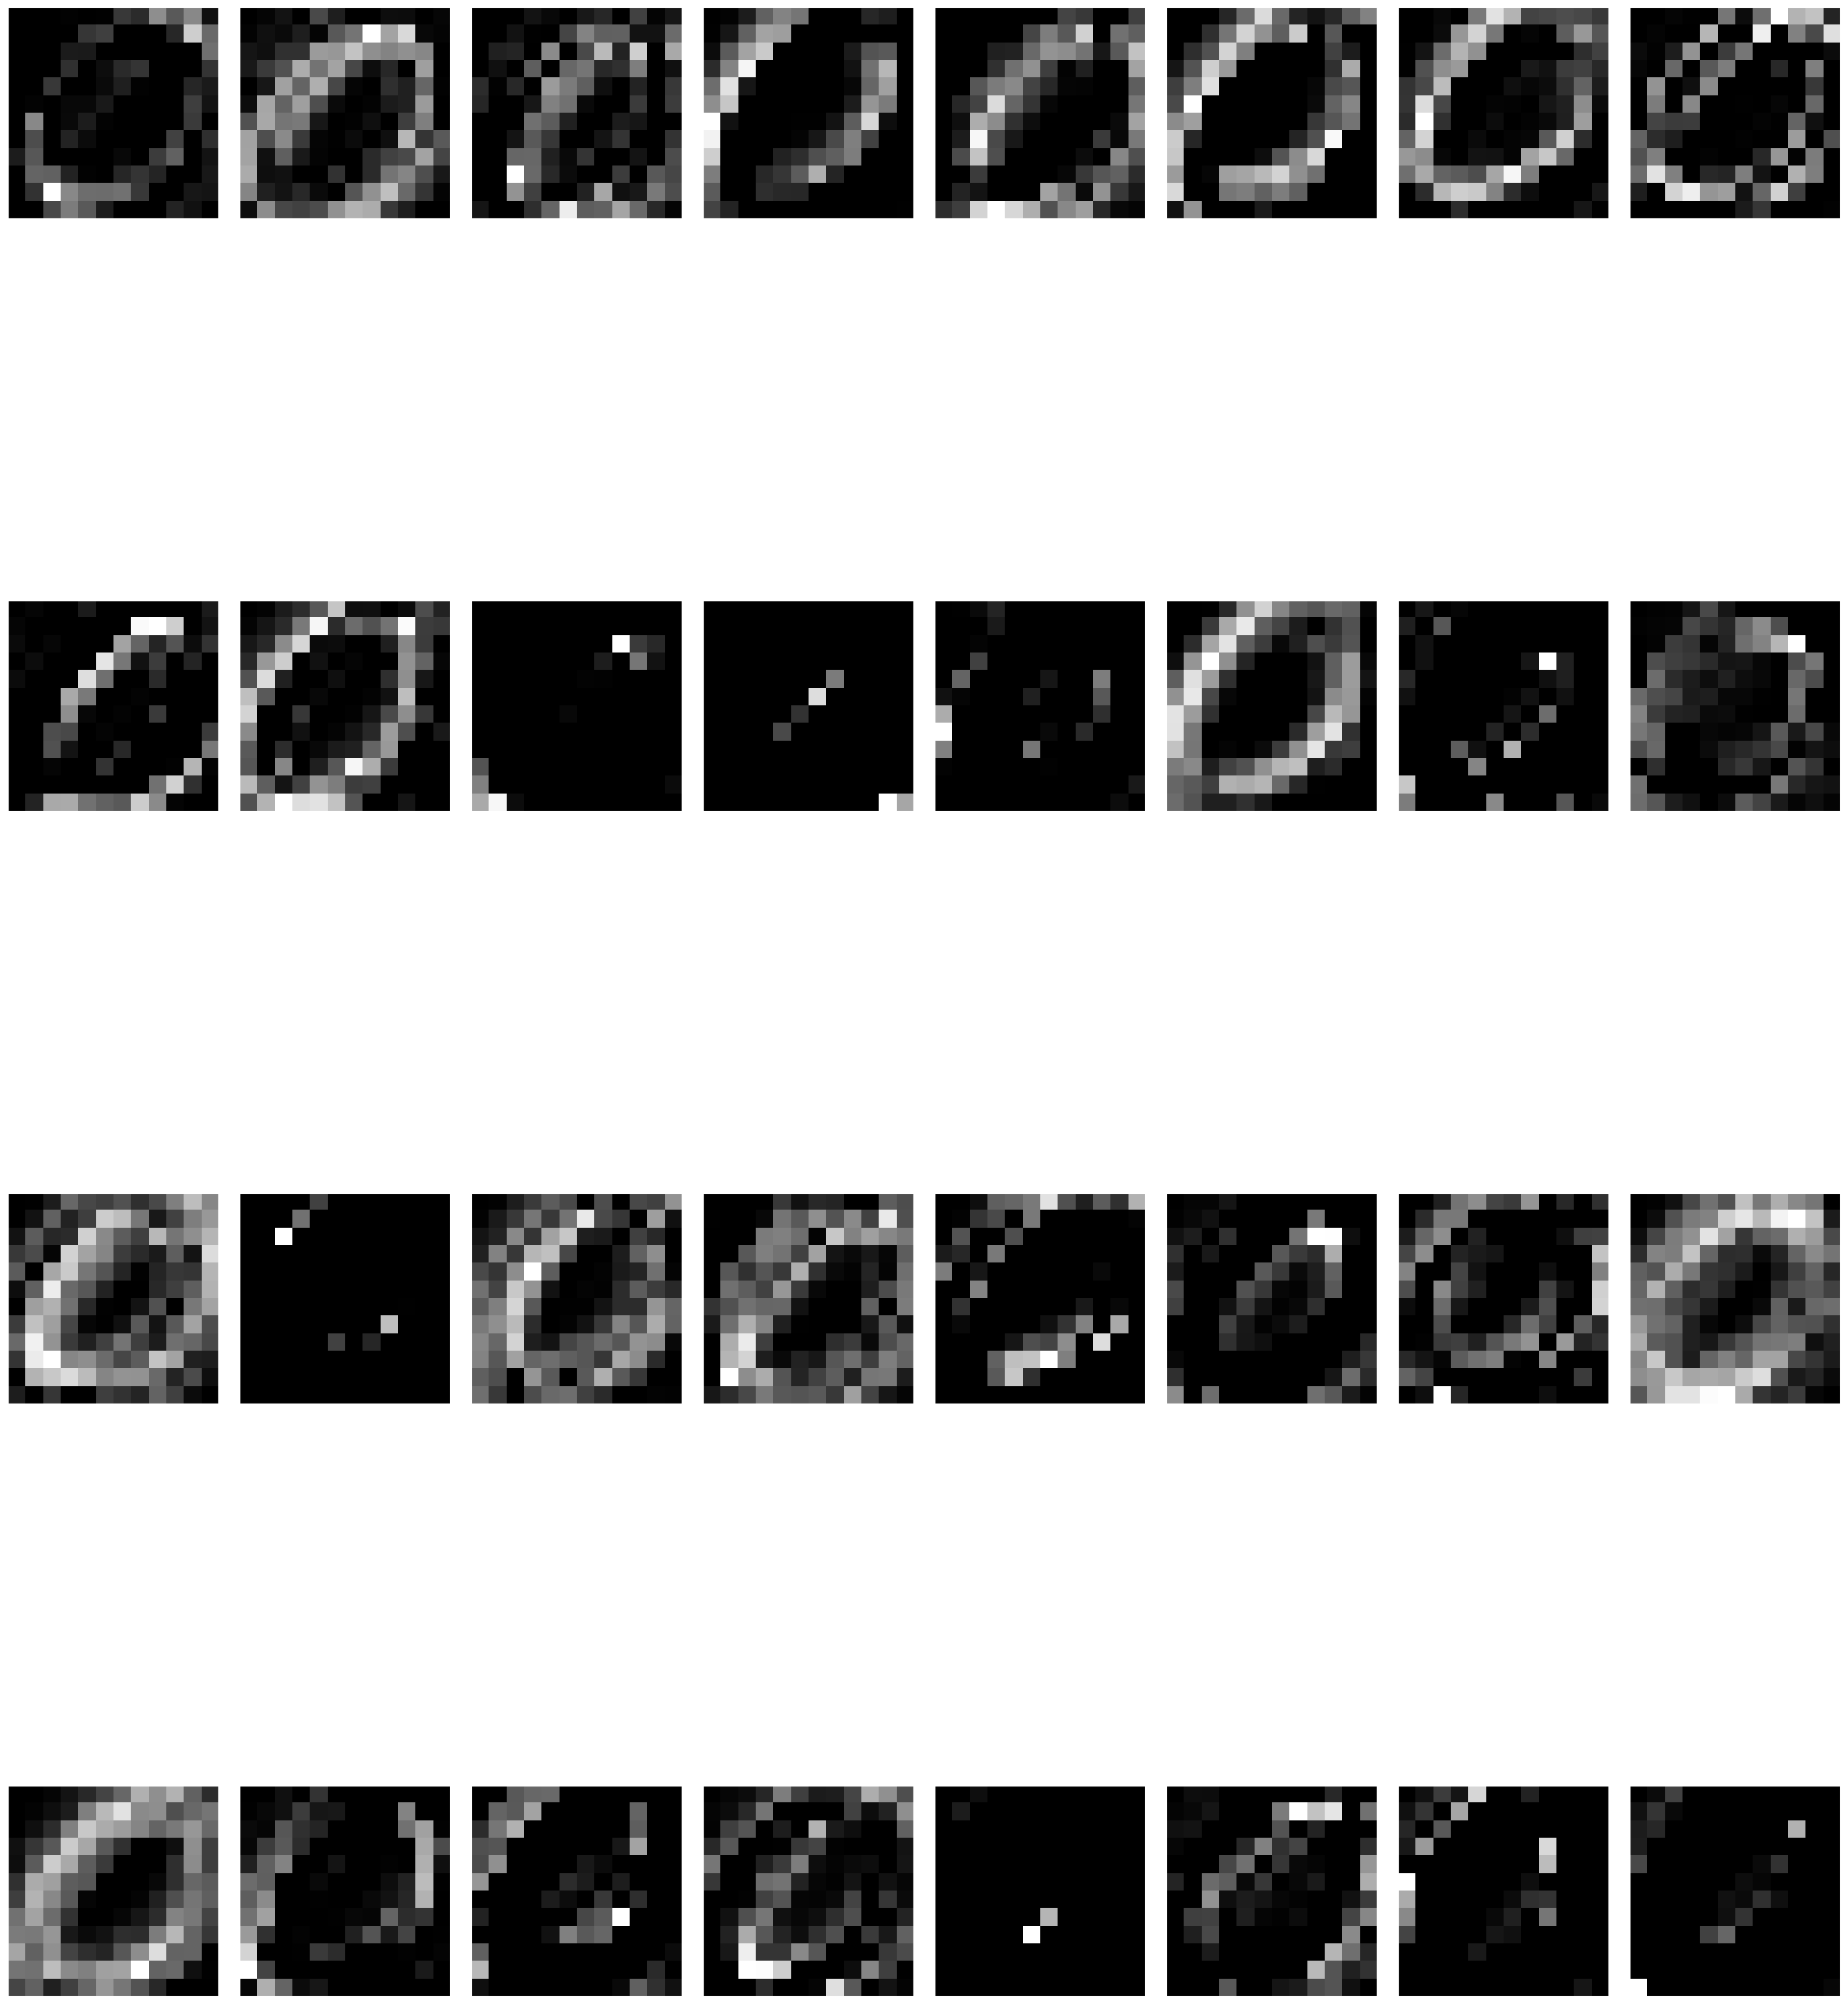

batch_normalization_2


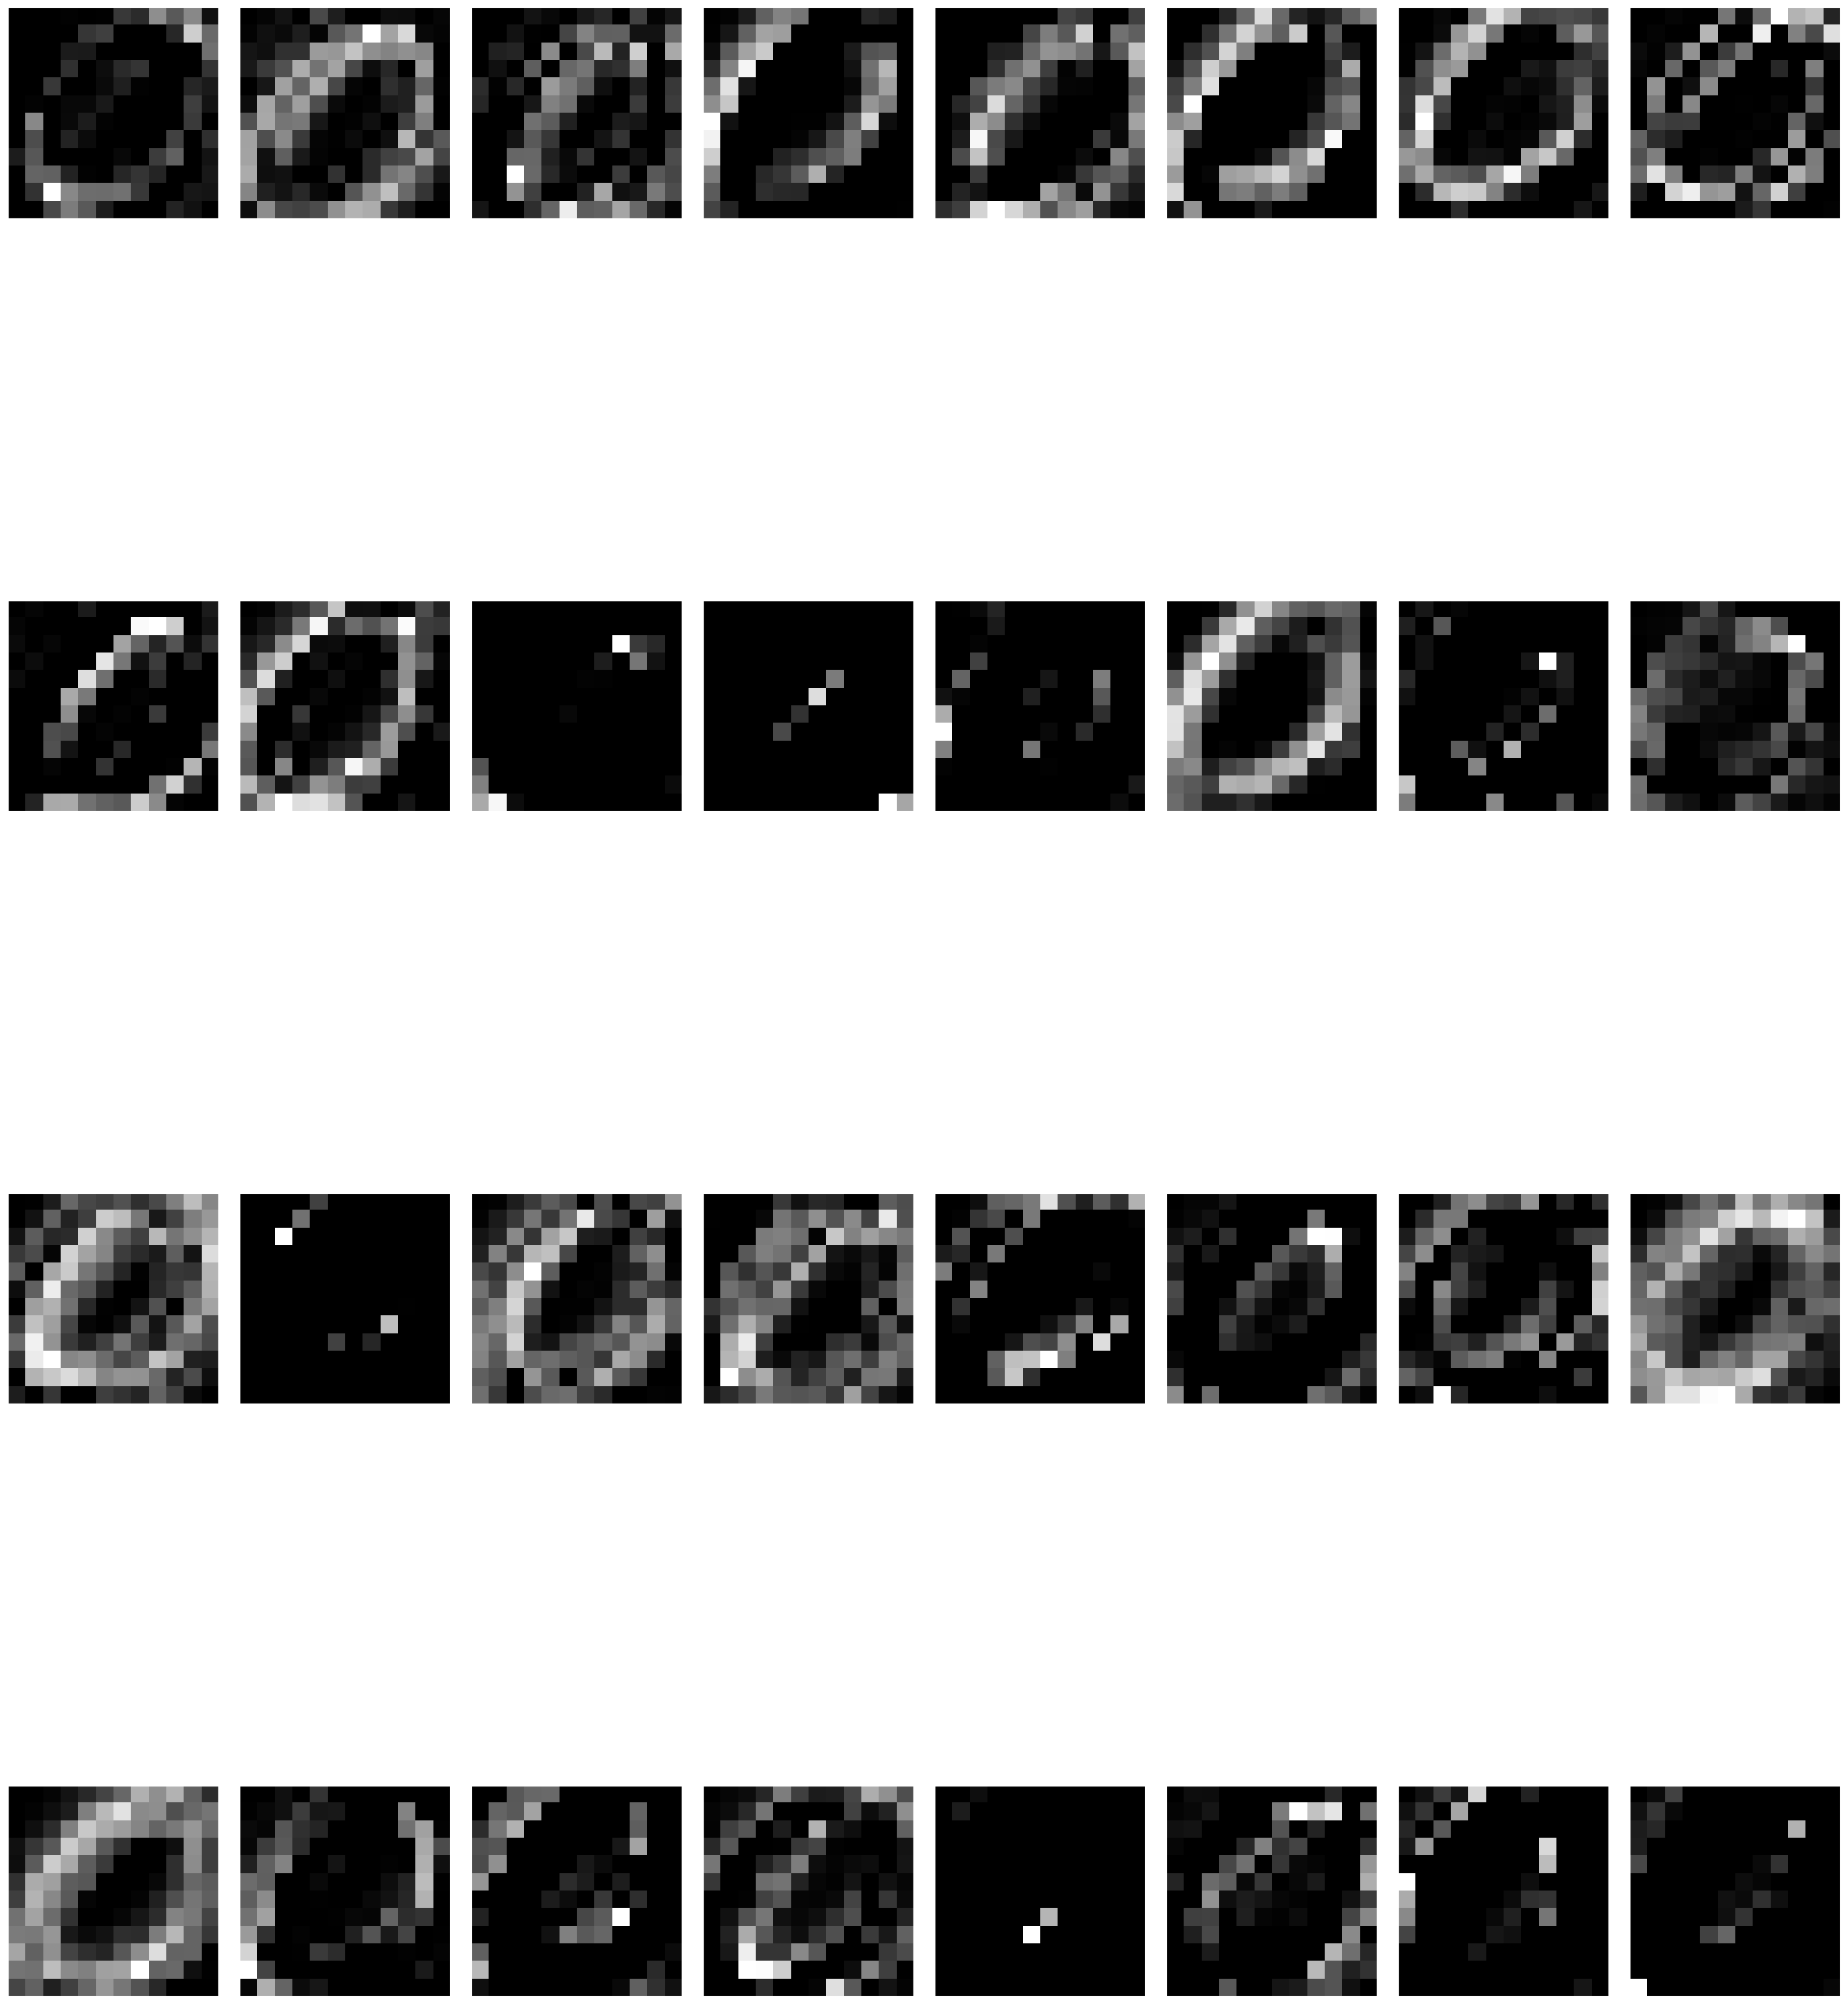

dropout


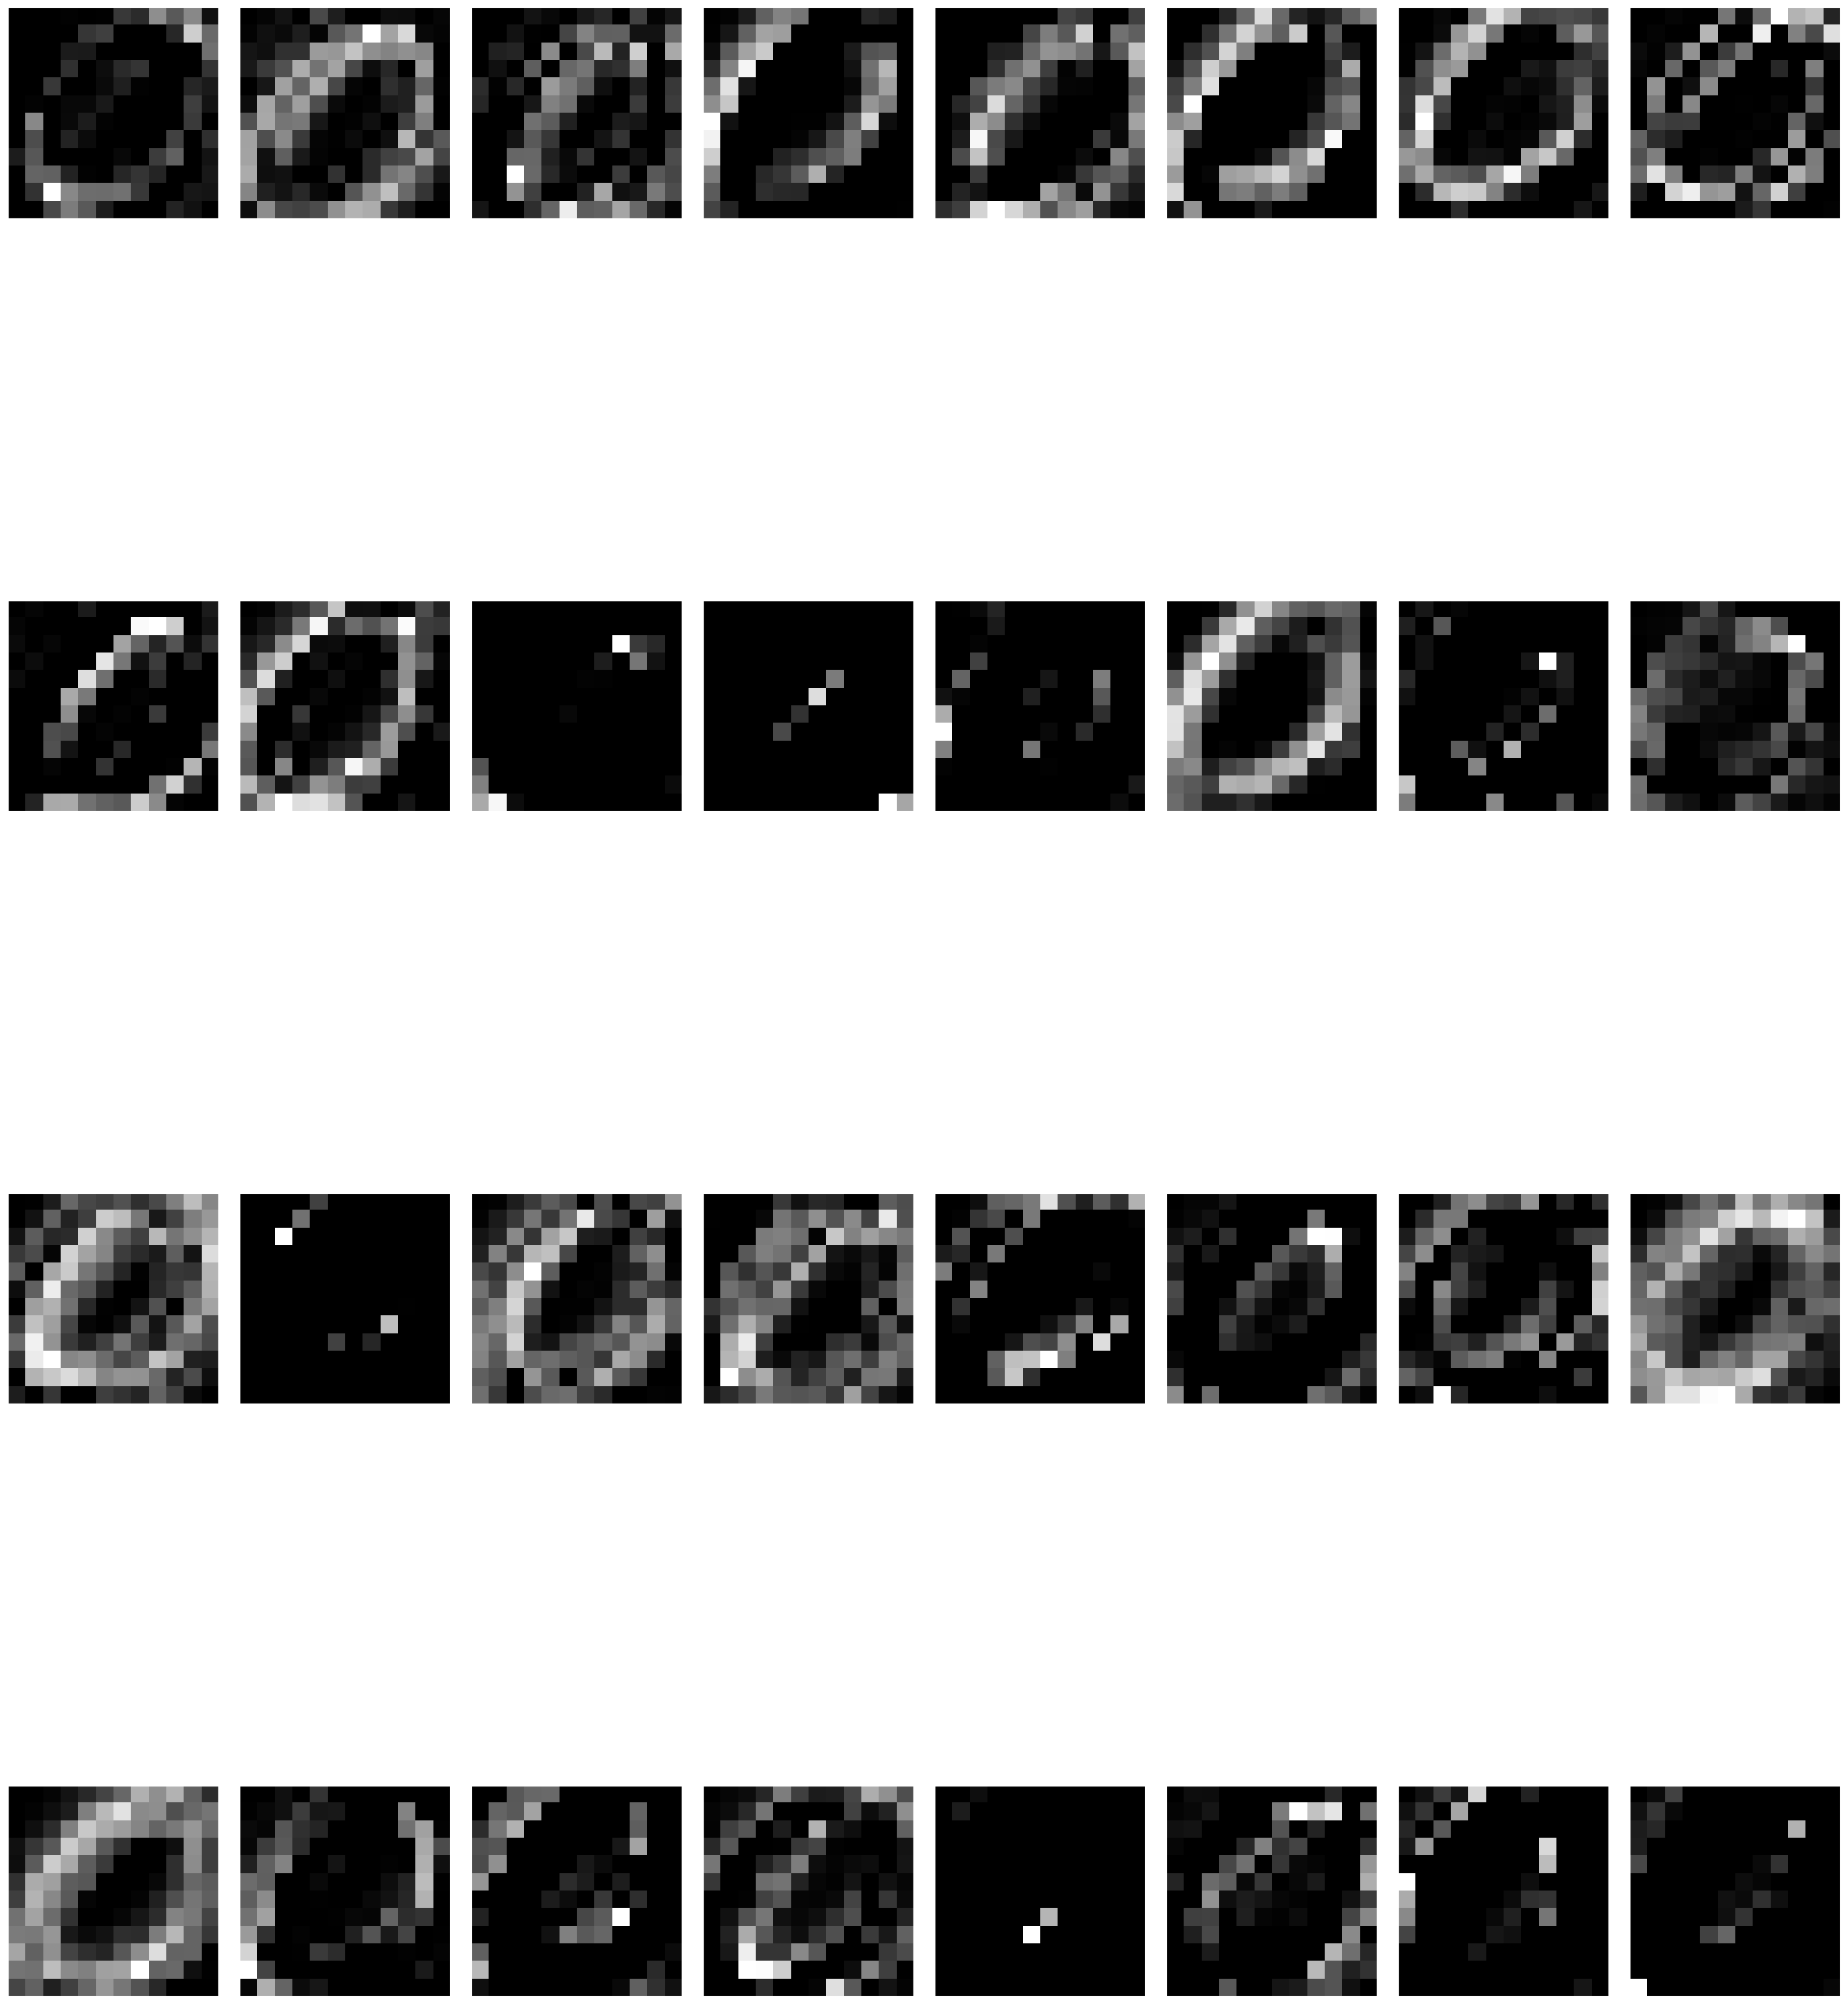

conv2d_3


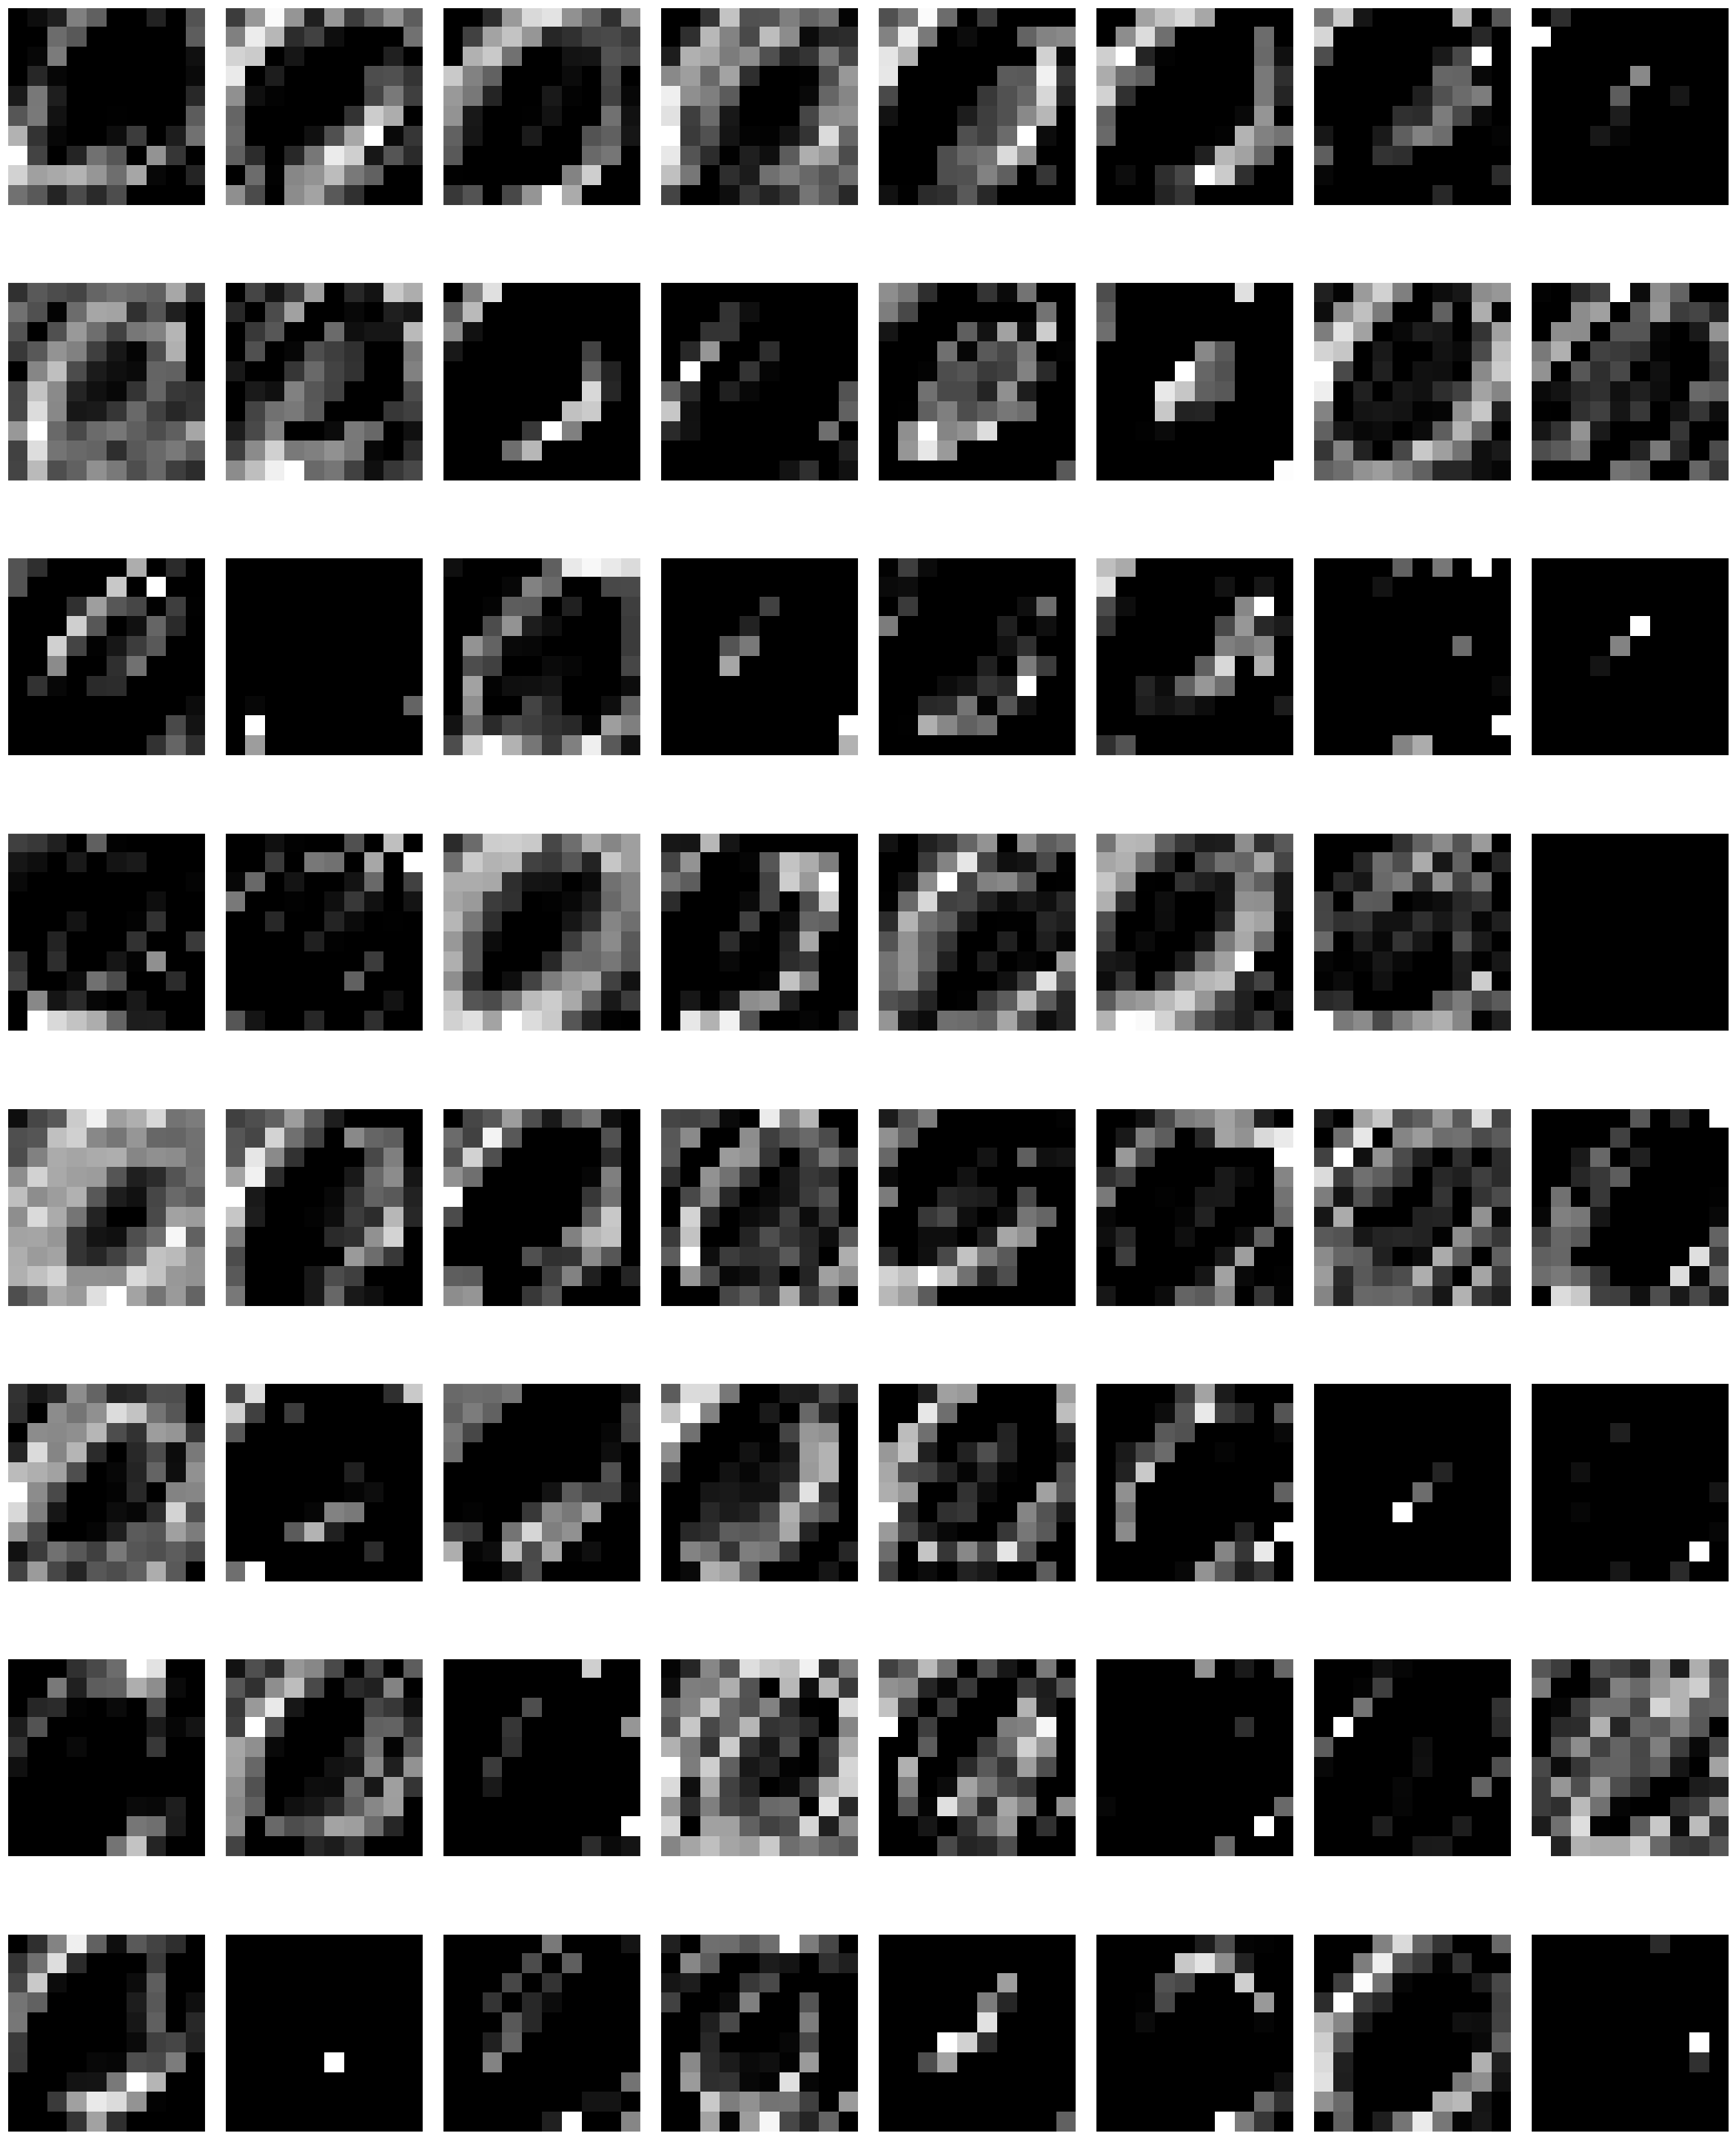

batch_normalization_3


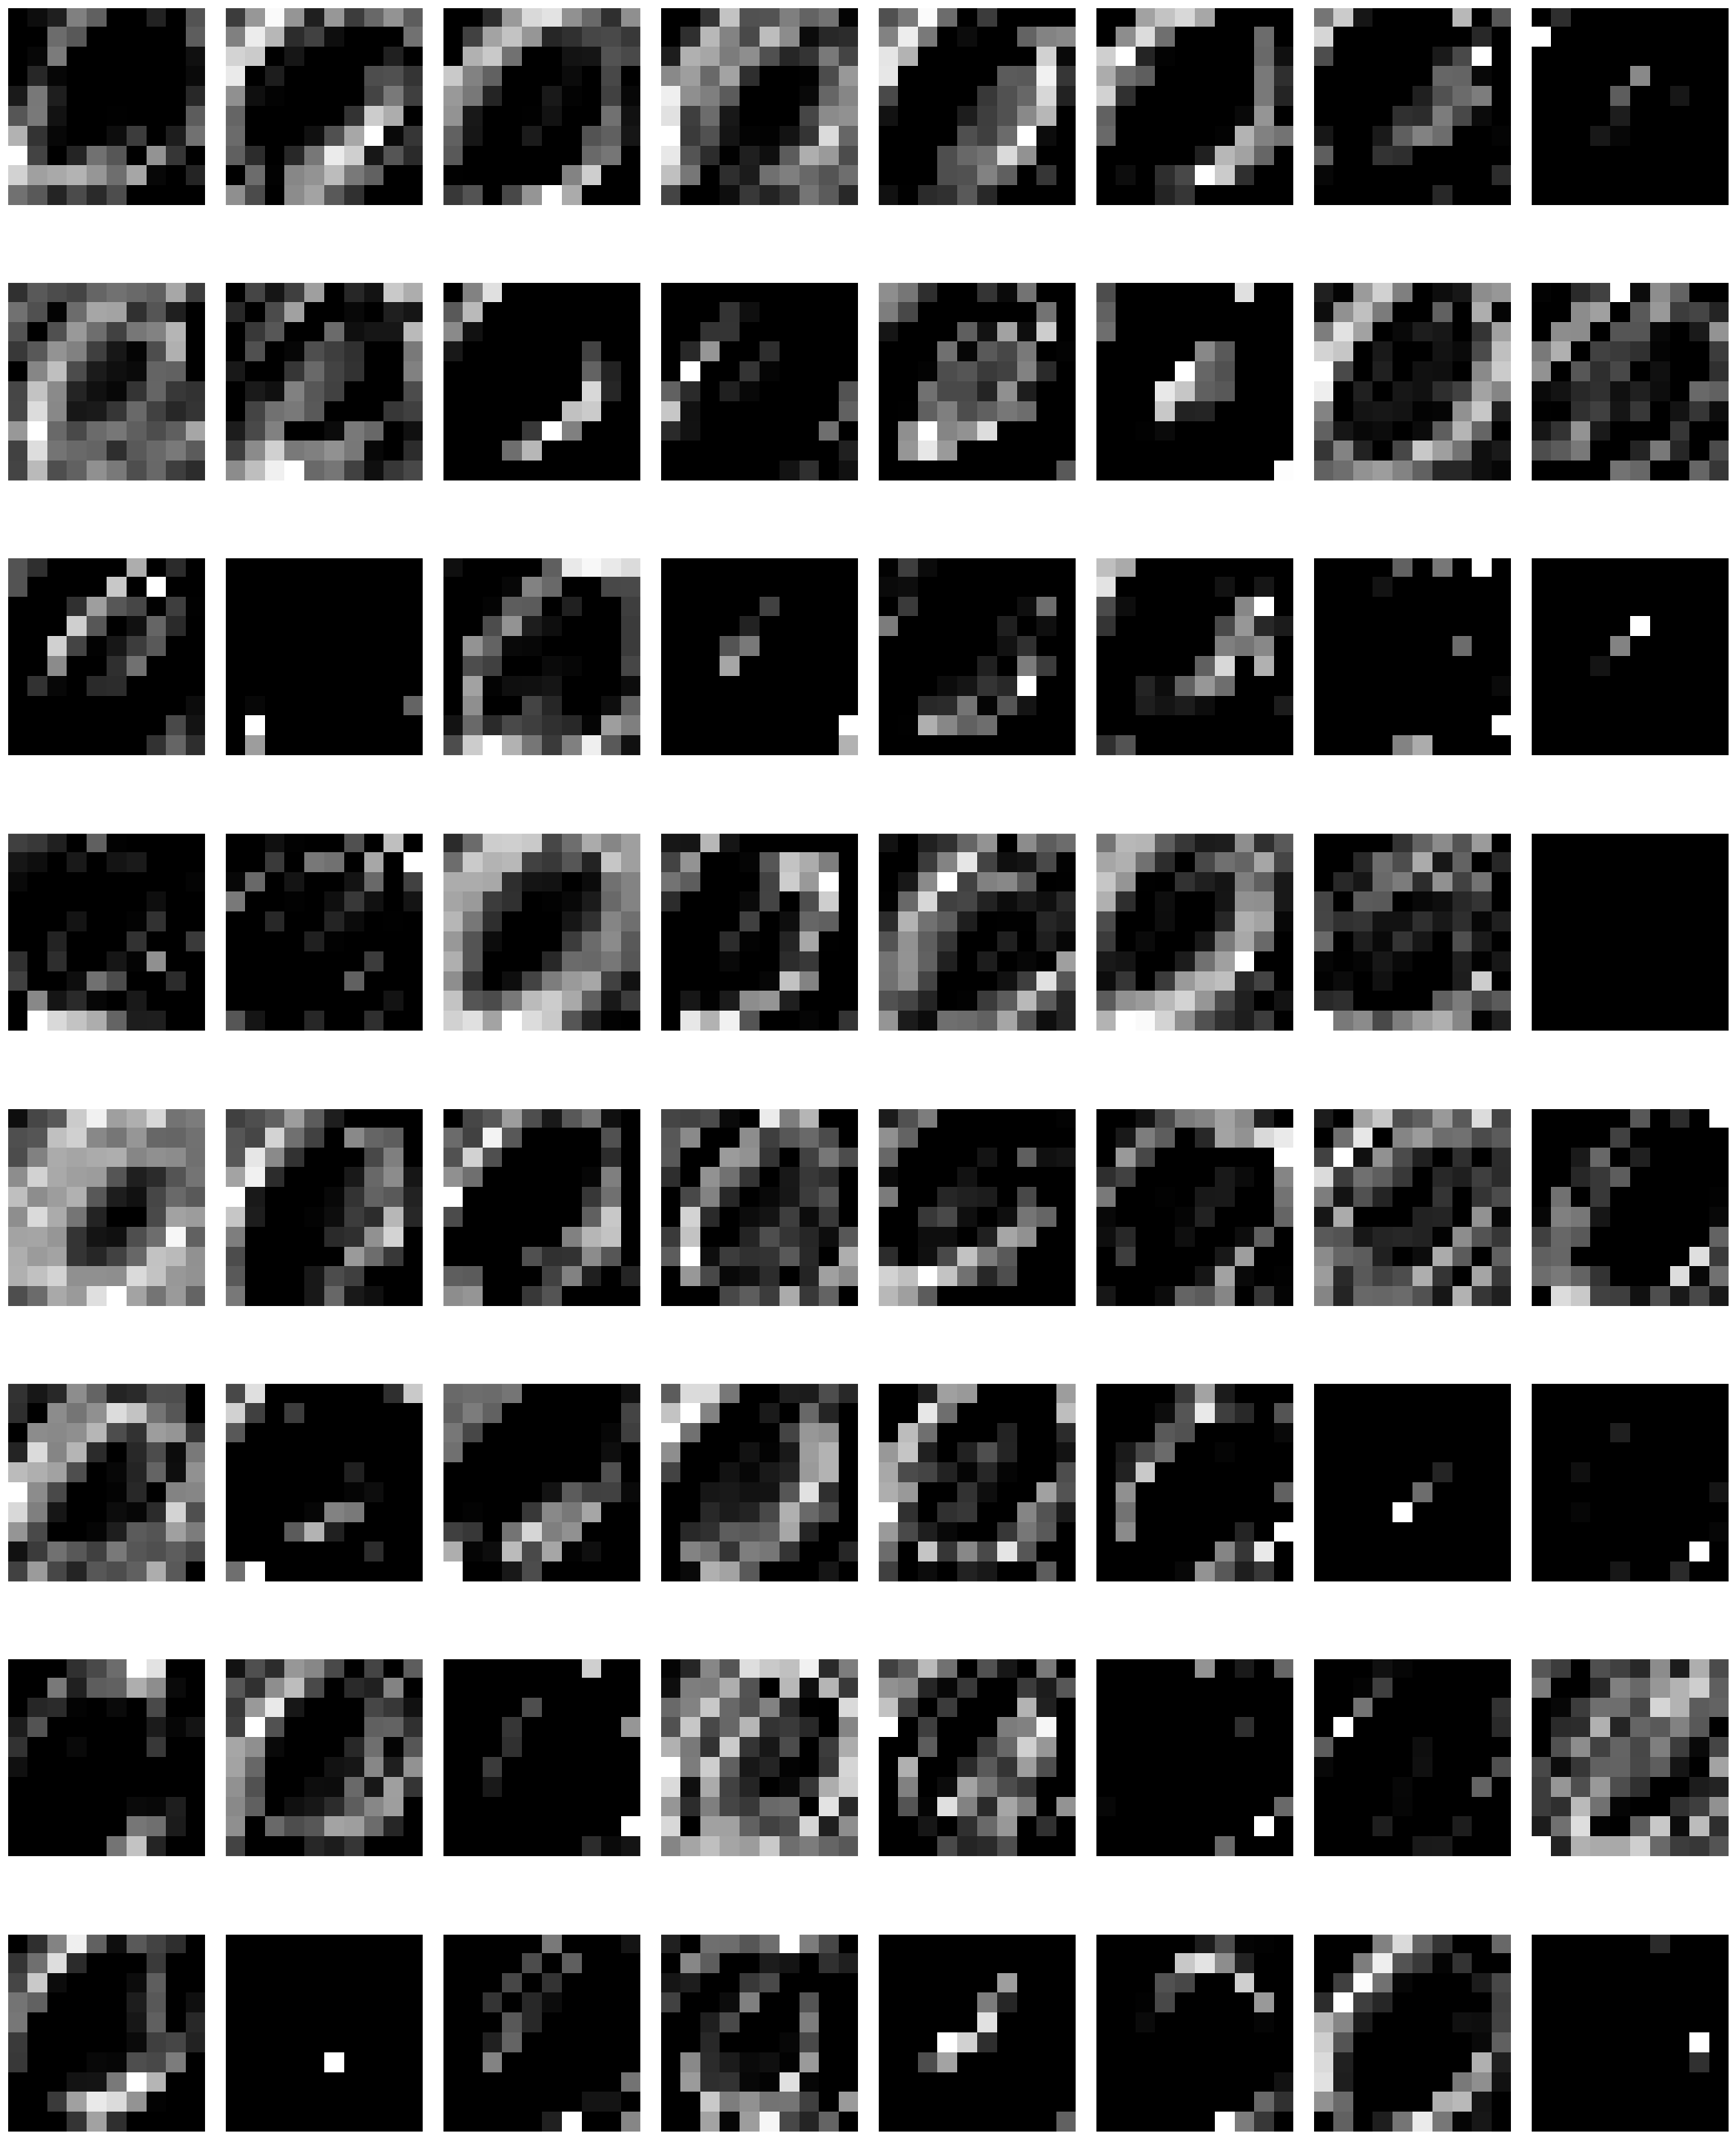

conv2d_4


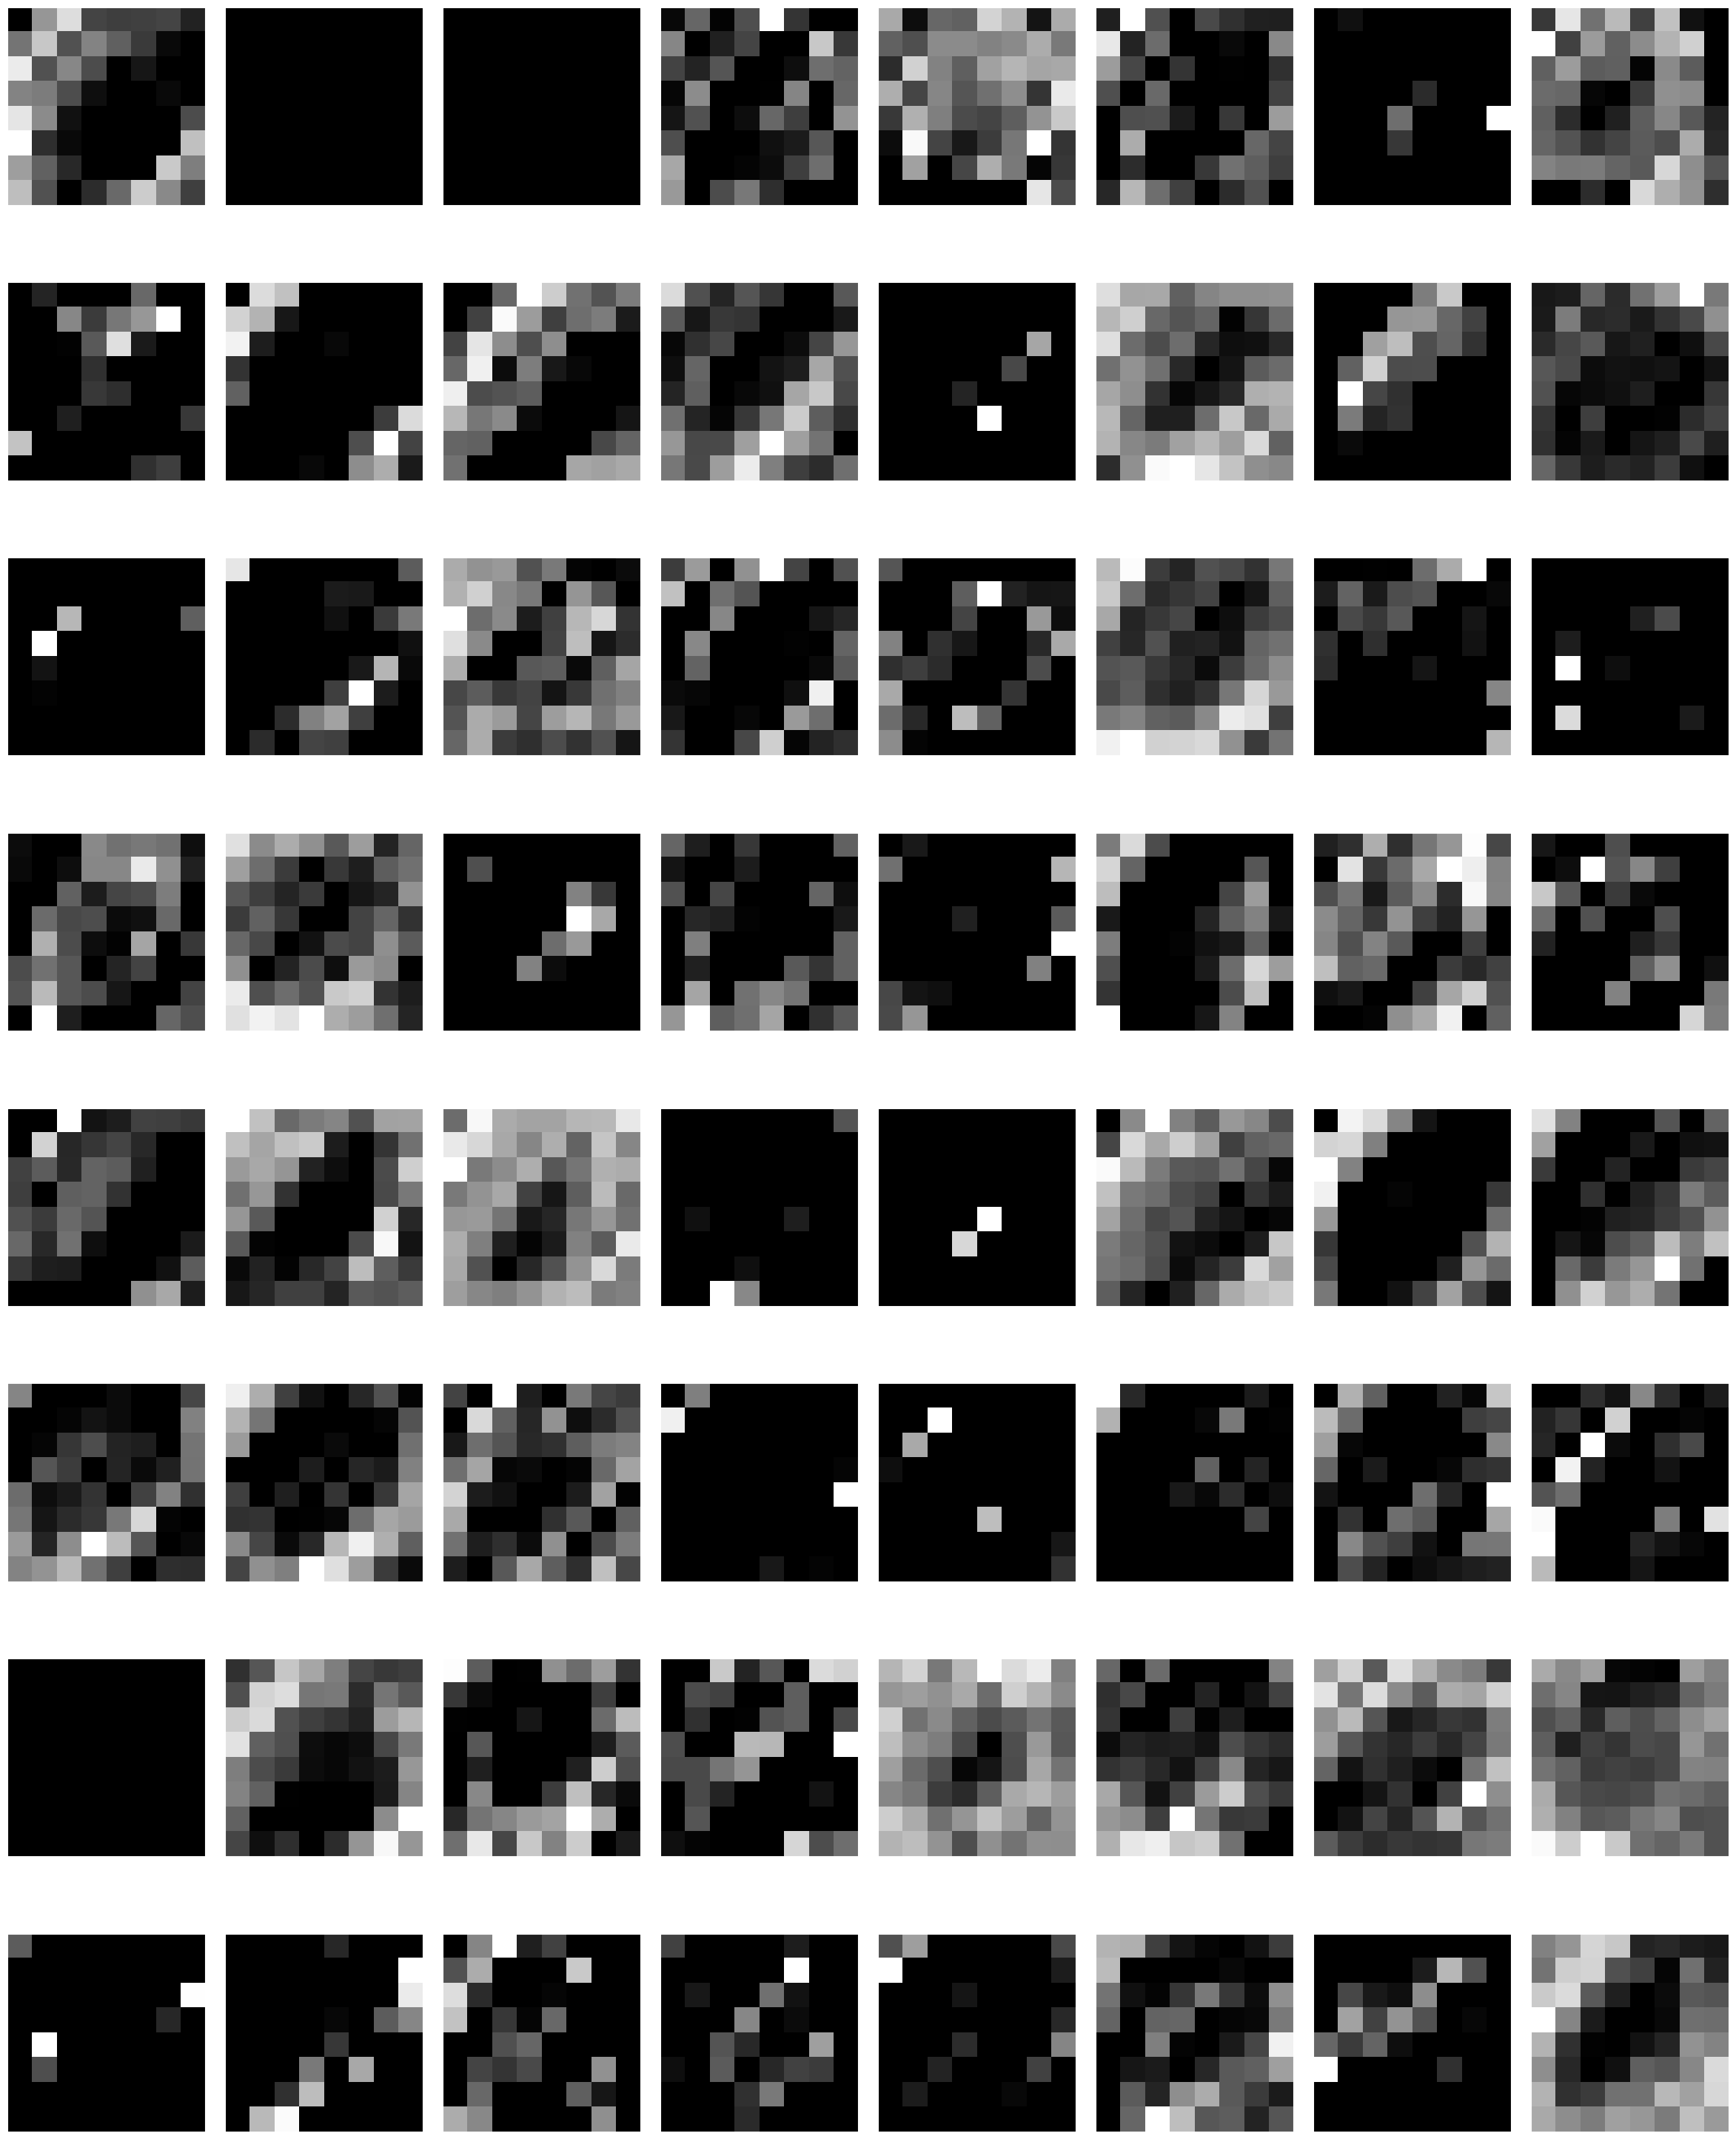

batch_normalization_4


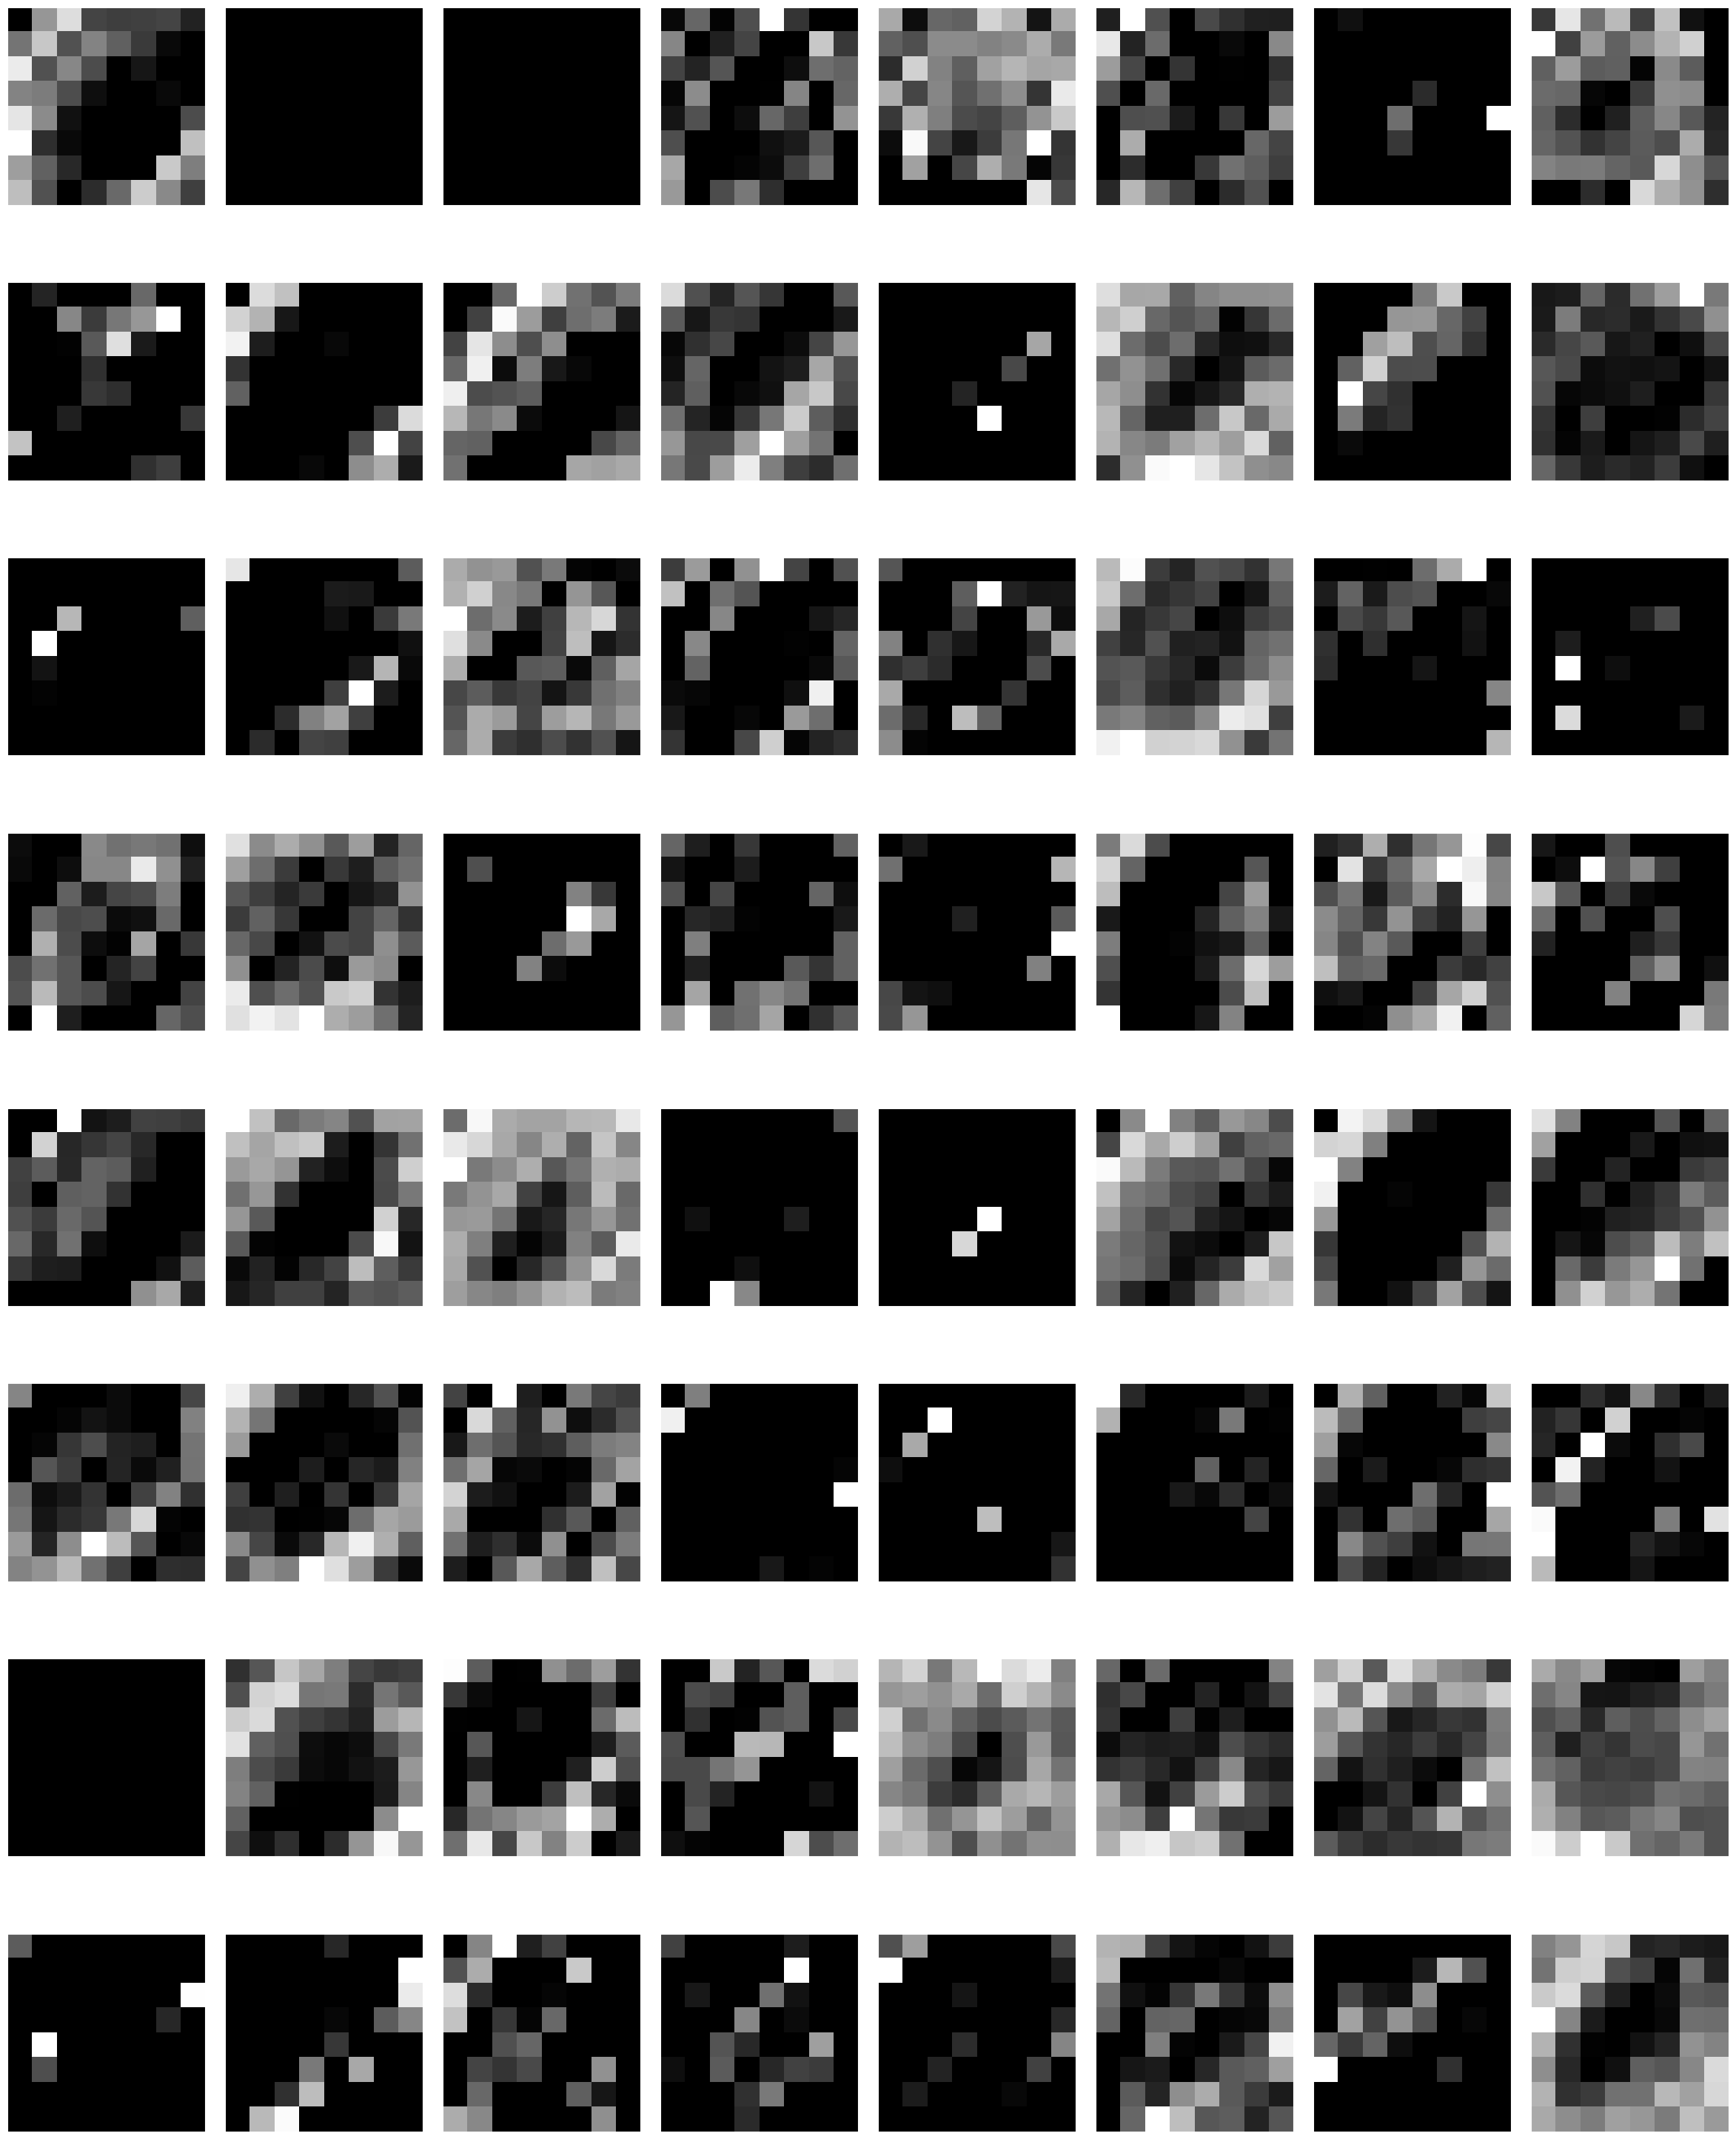

conv2d_5


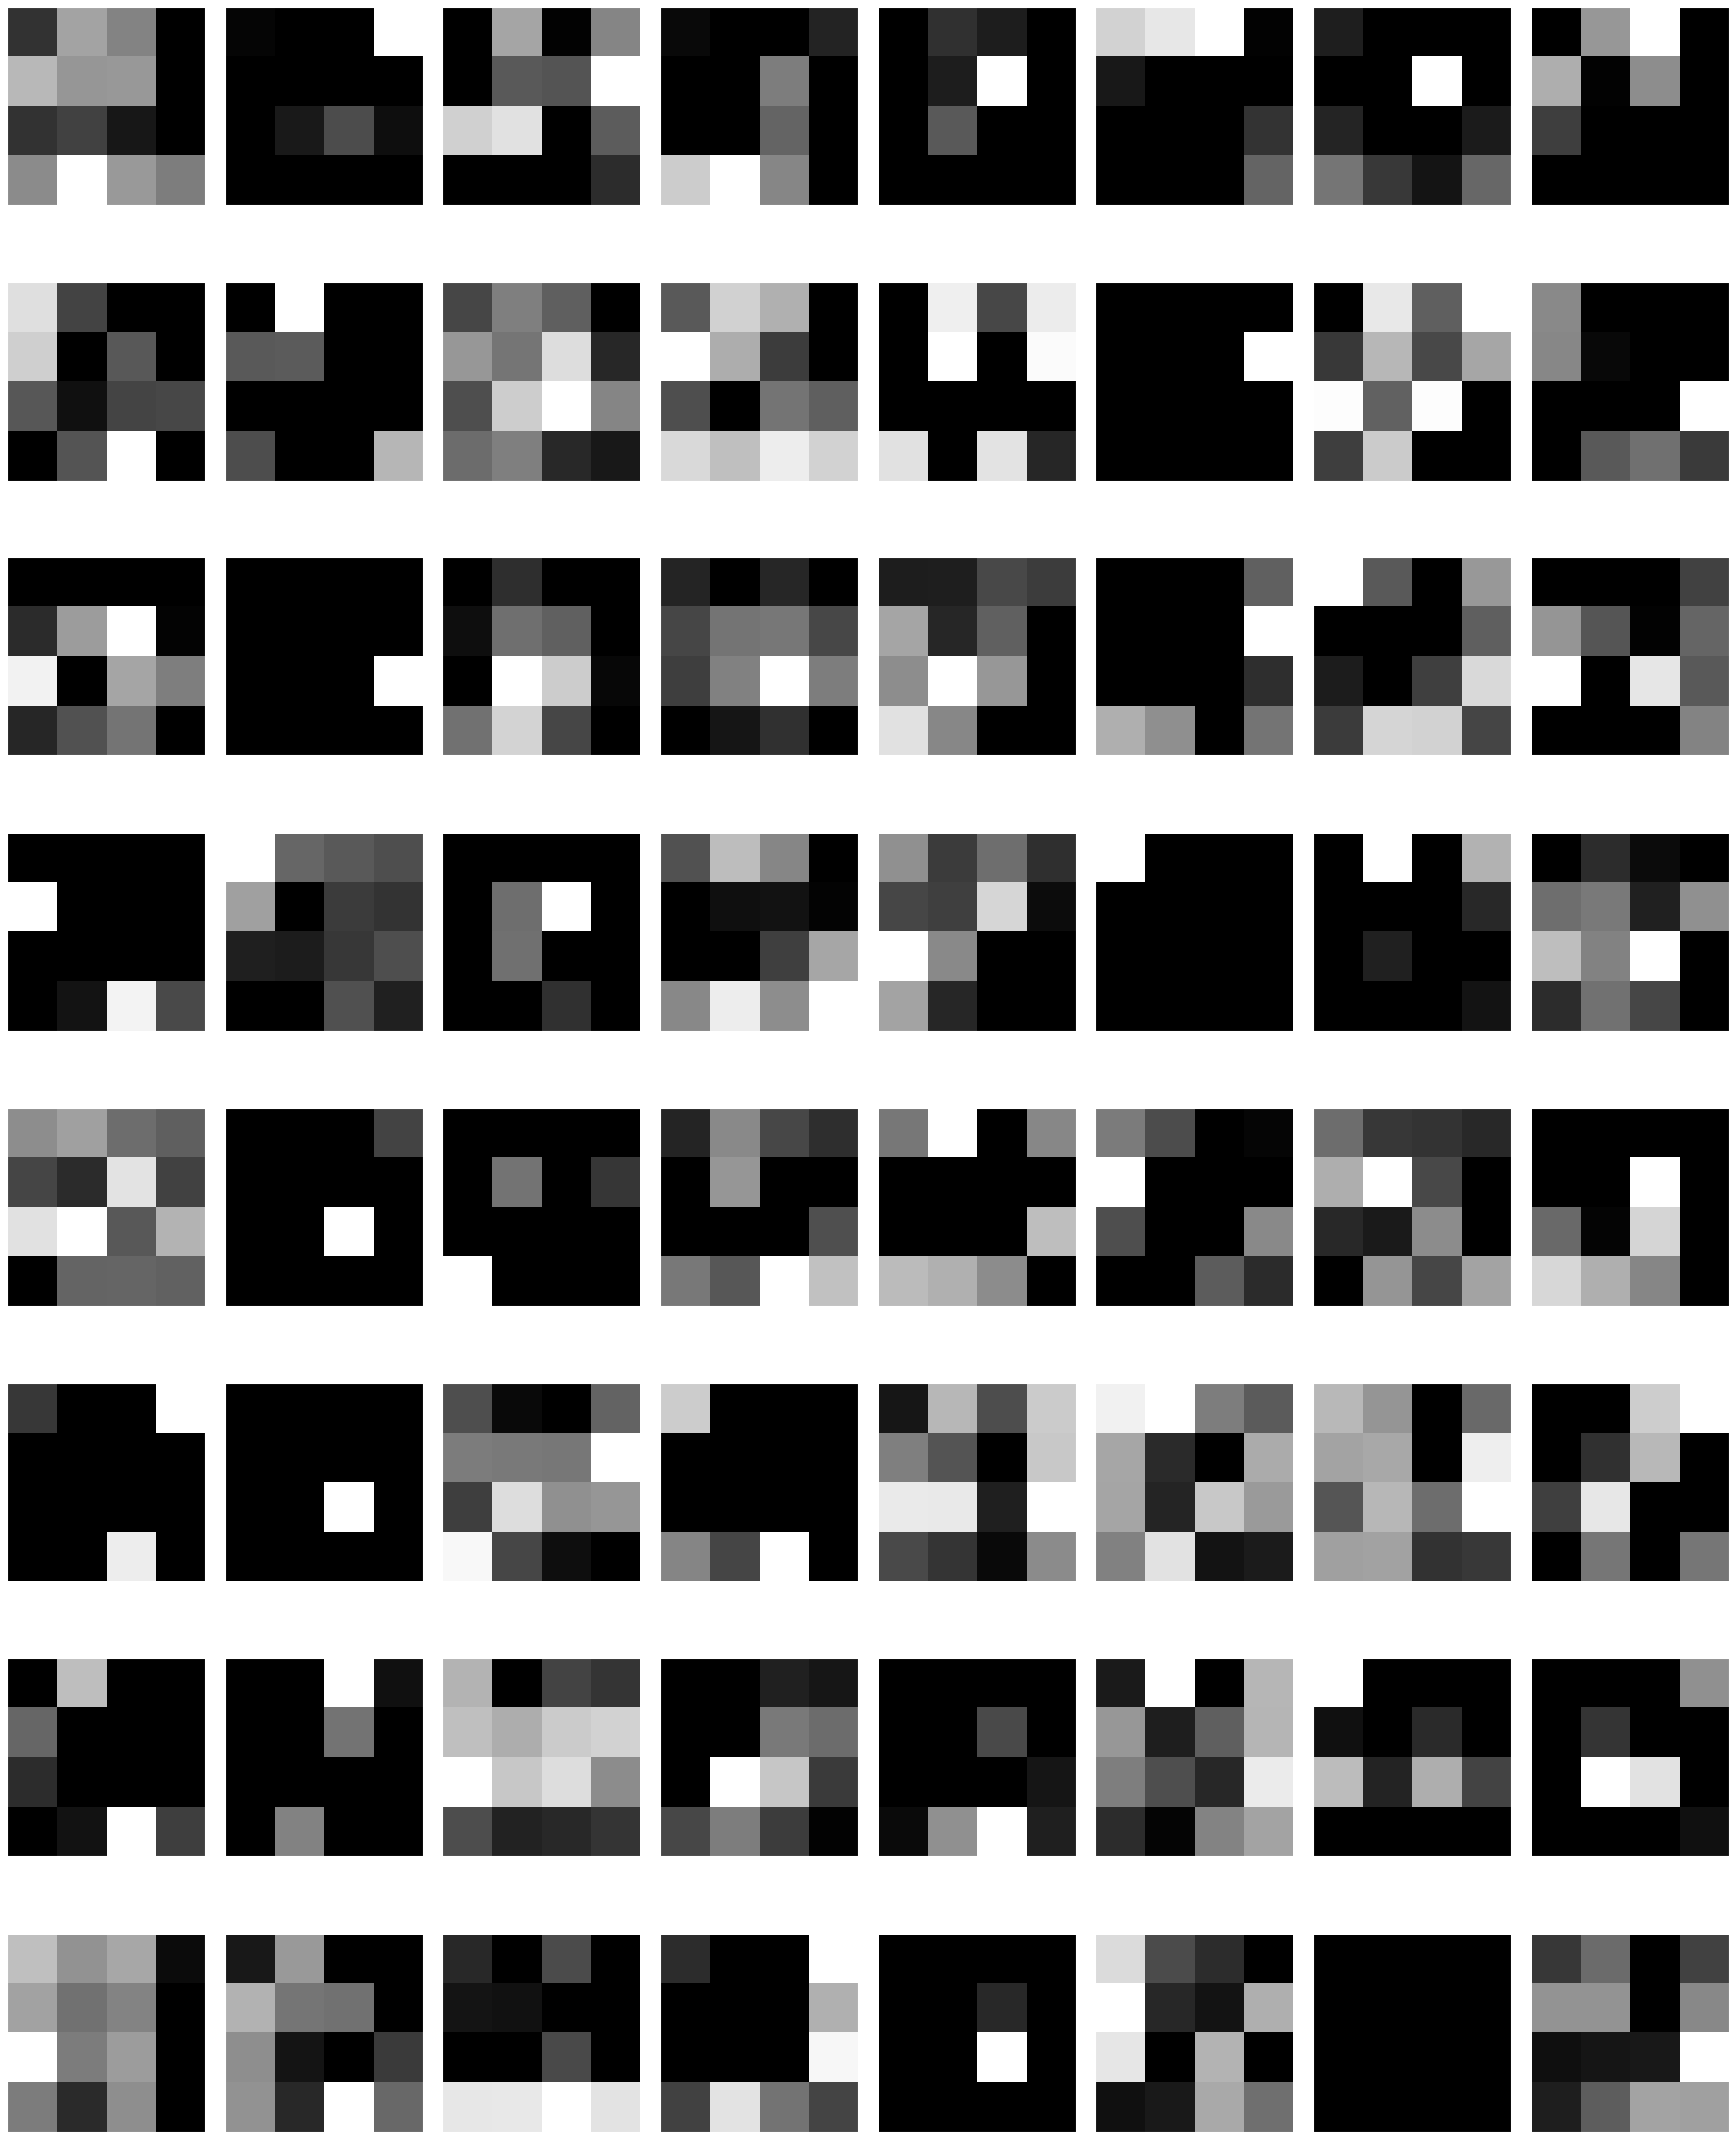

batch_normalization_5


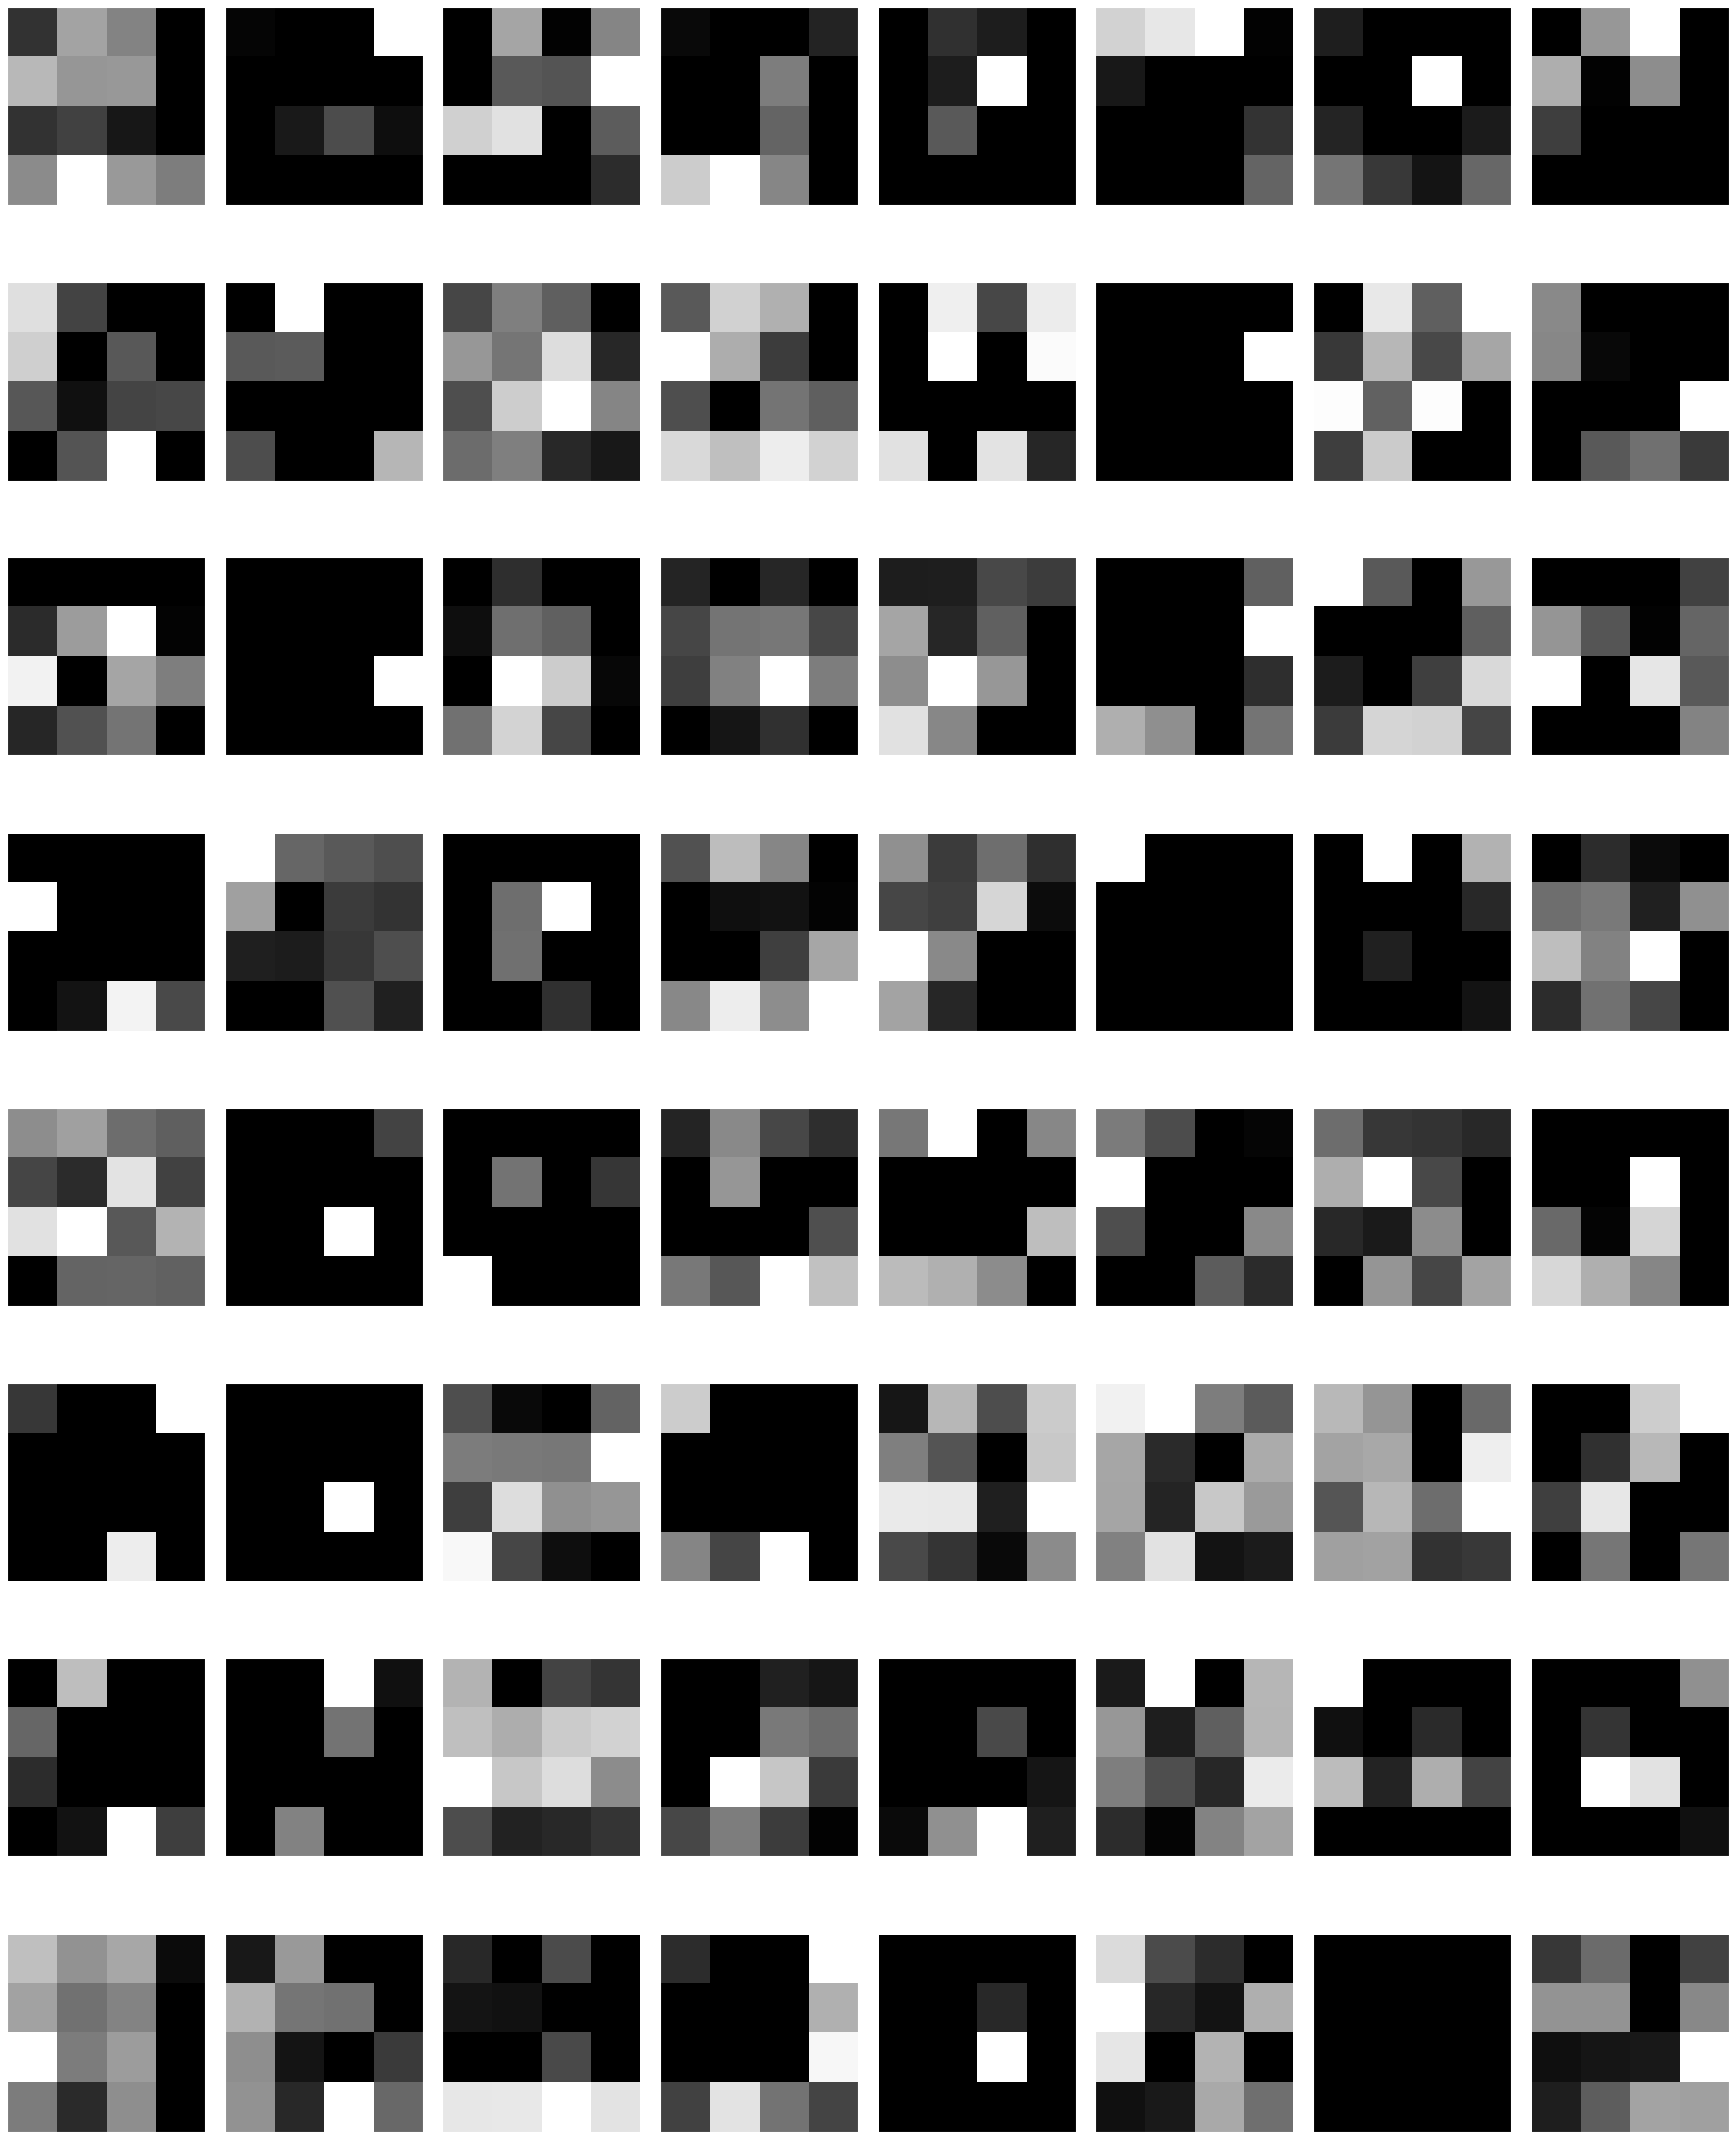

dropout_1


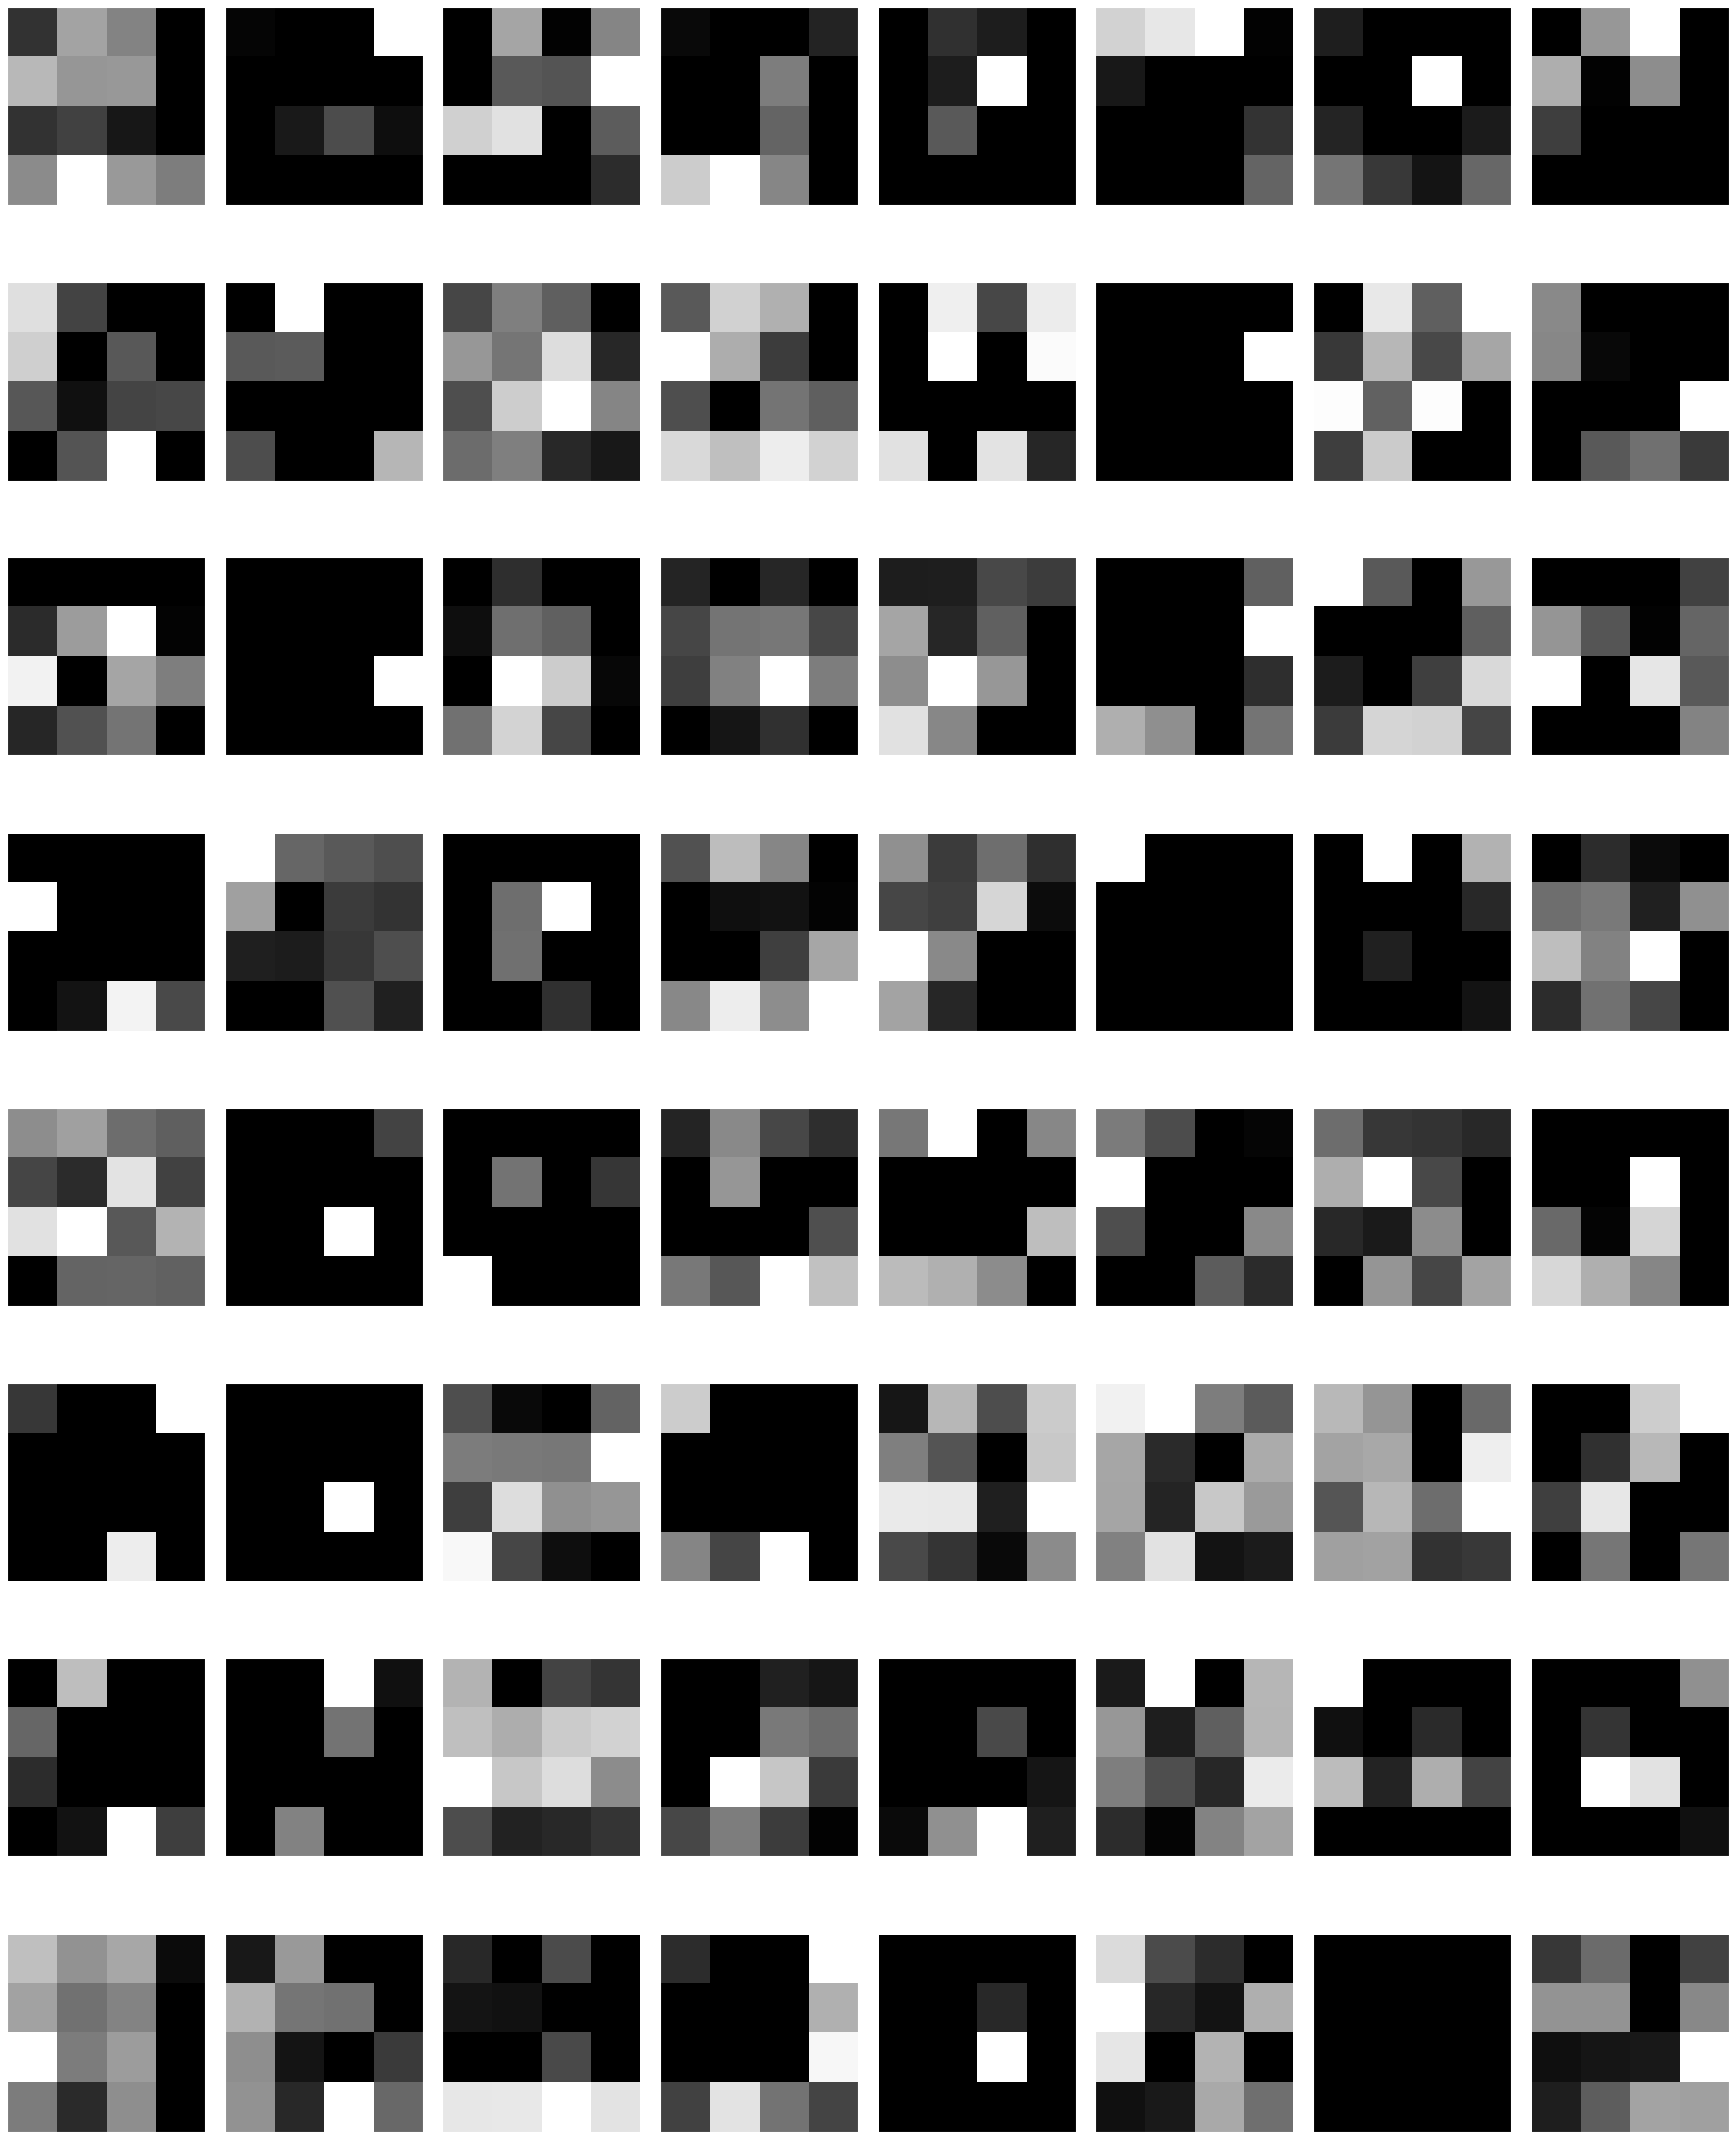

conv2d_6


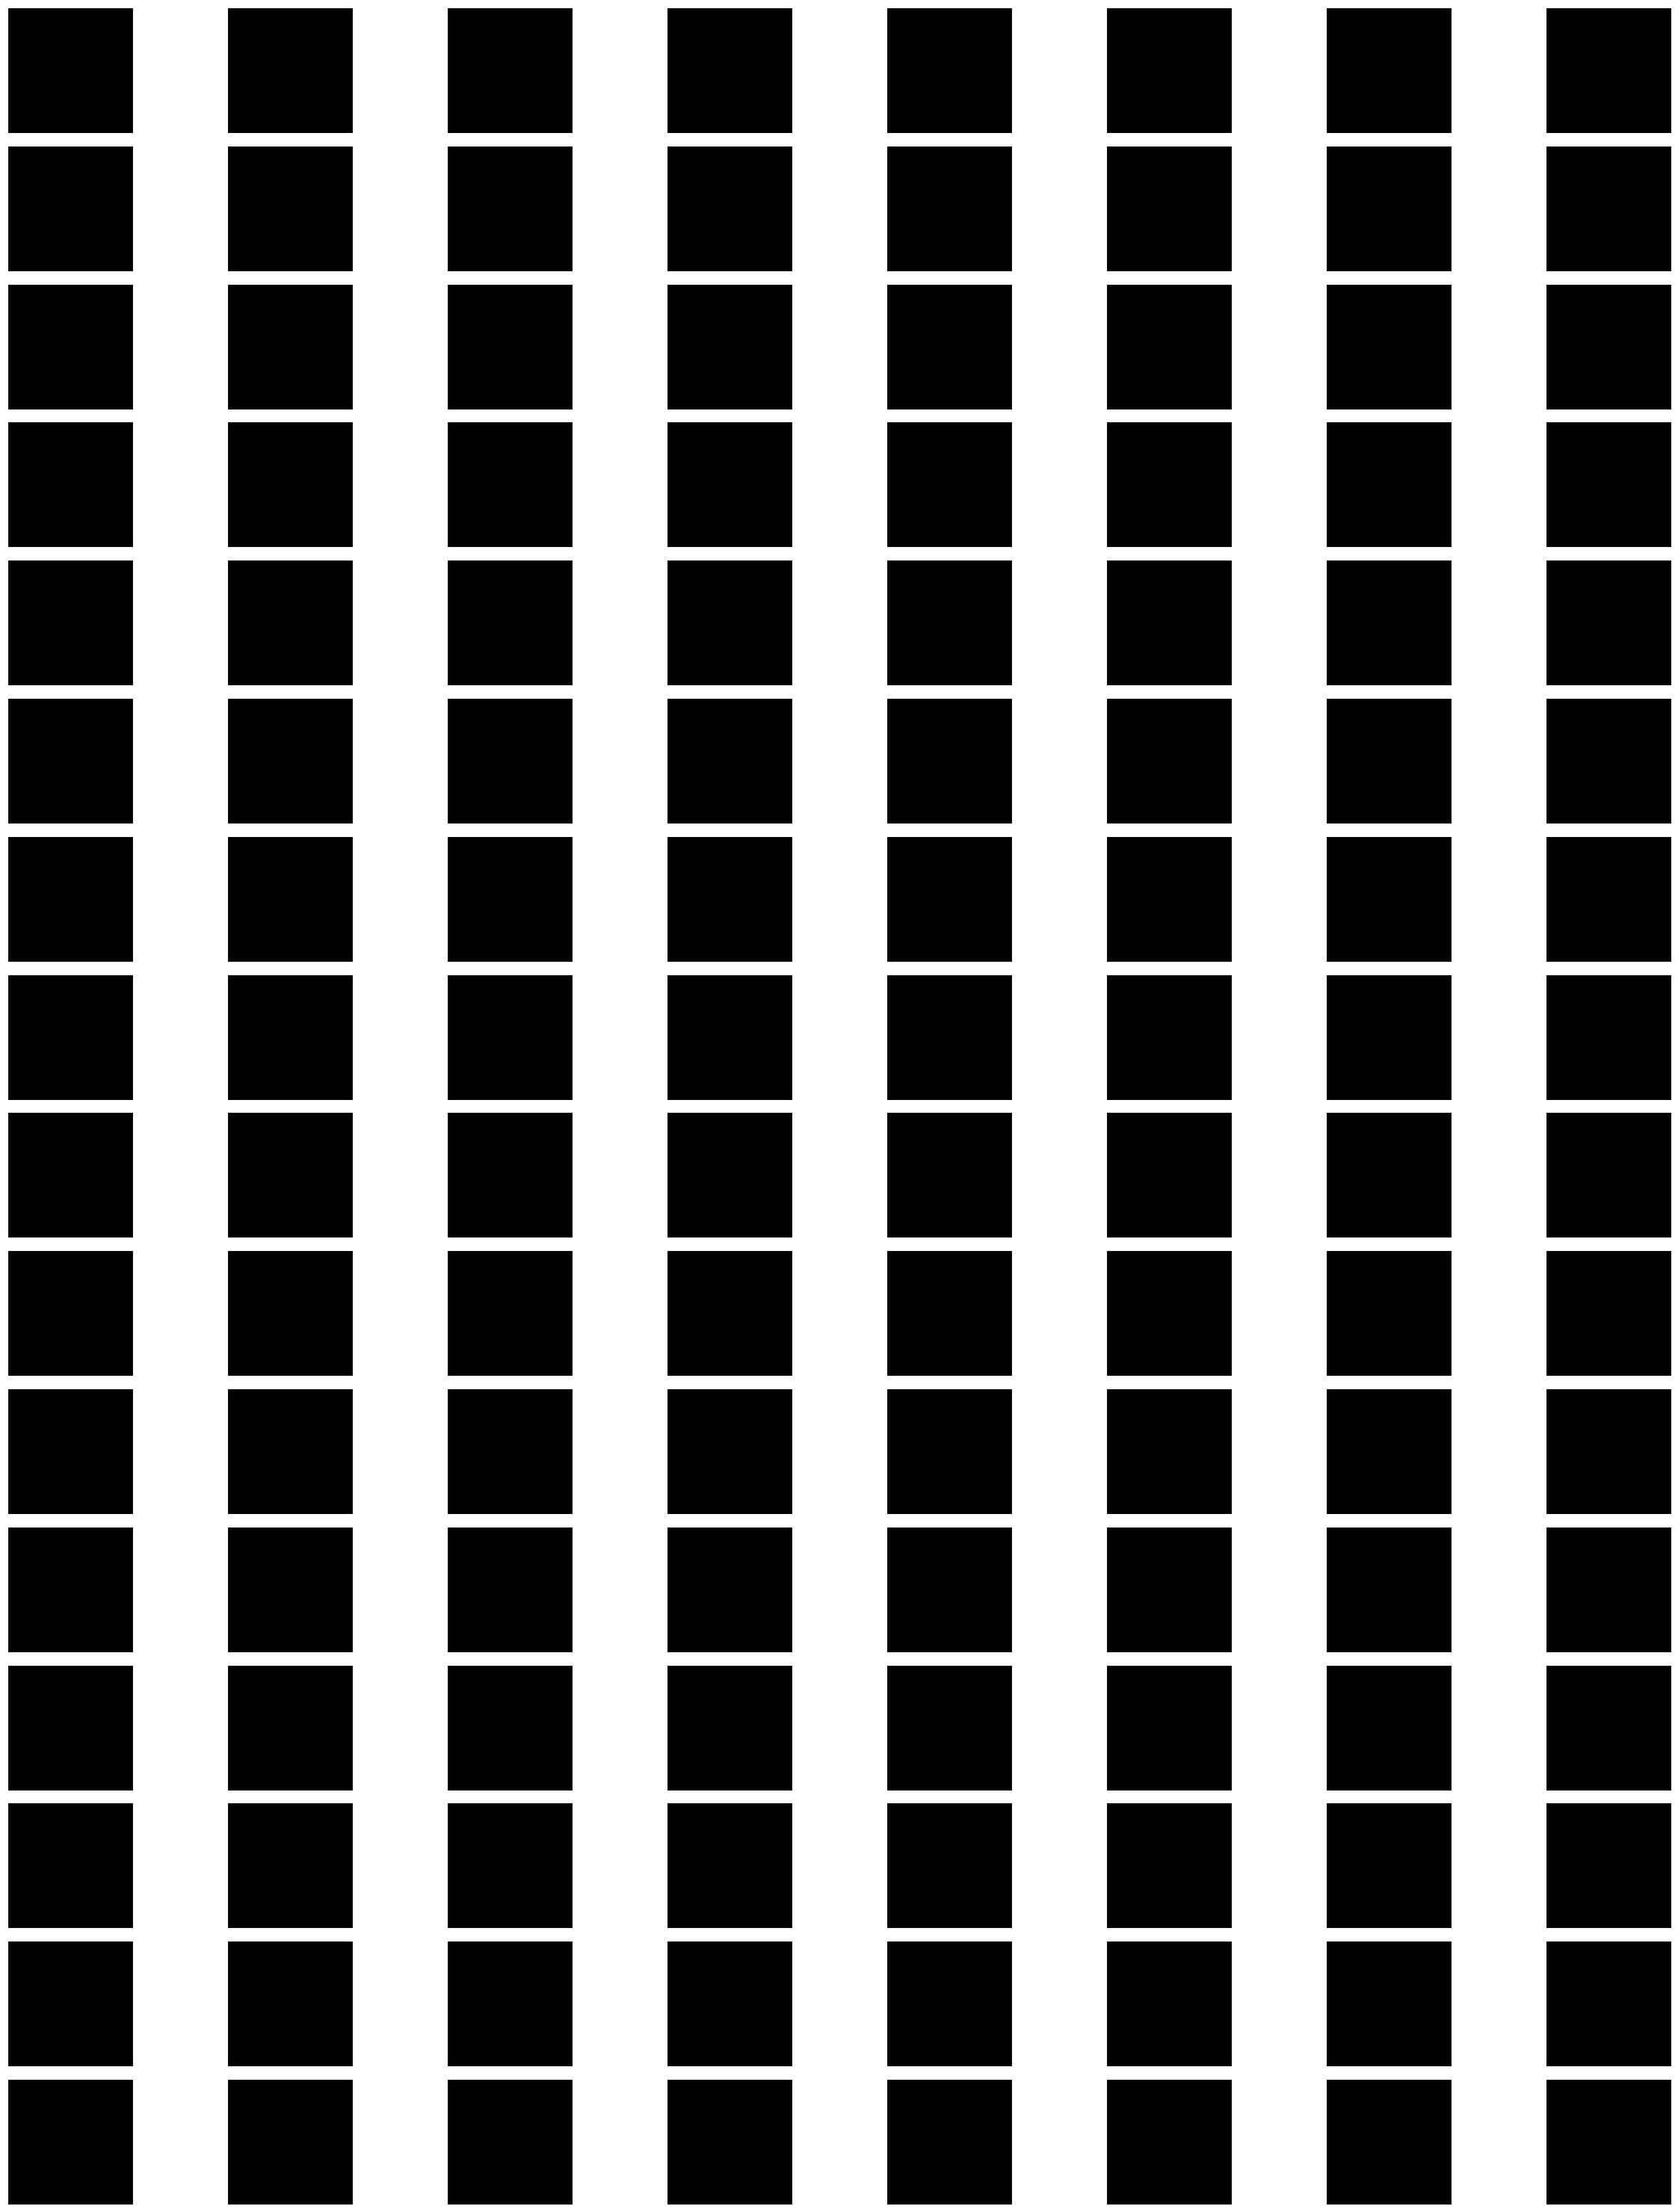

batch_normalization_6


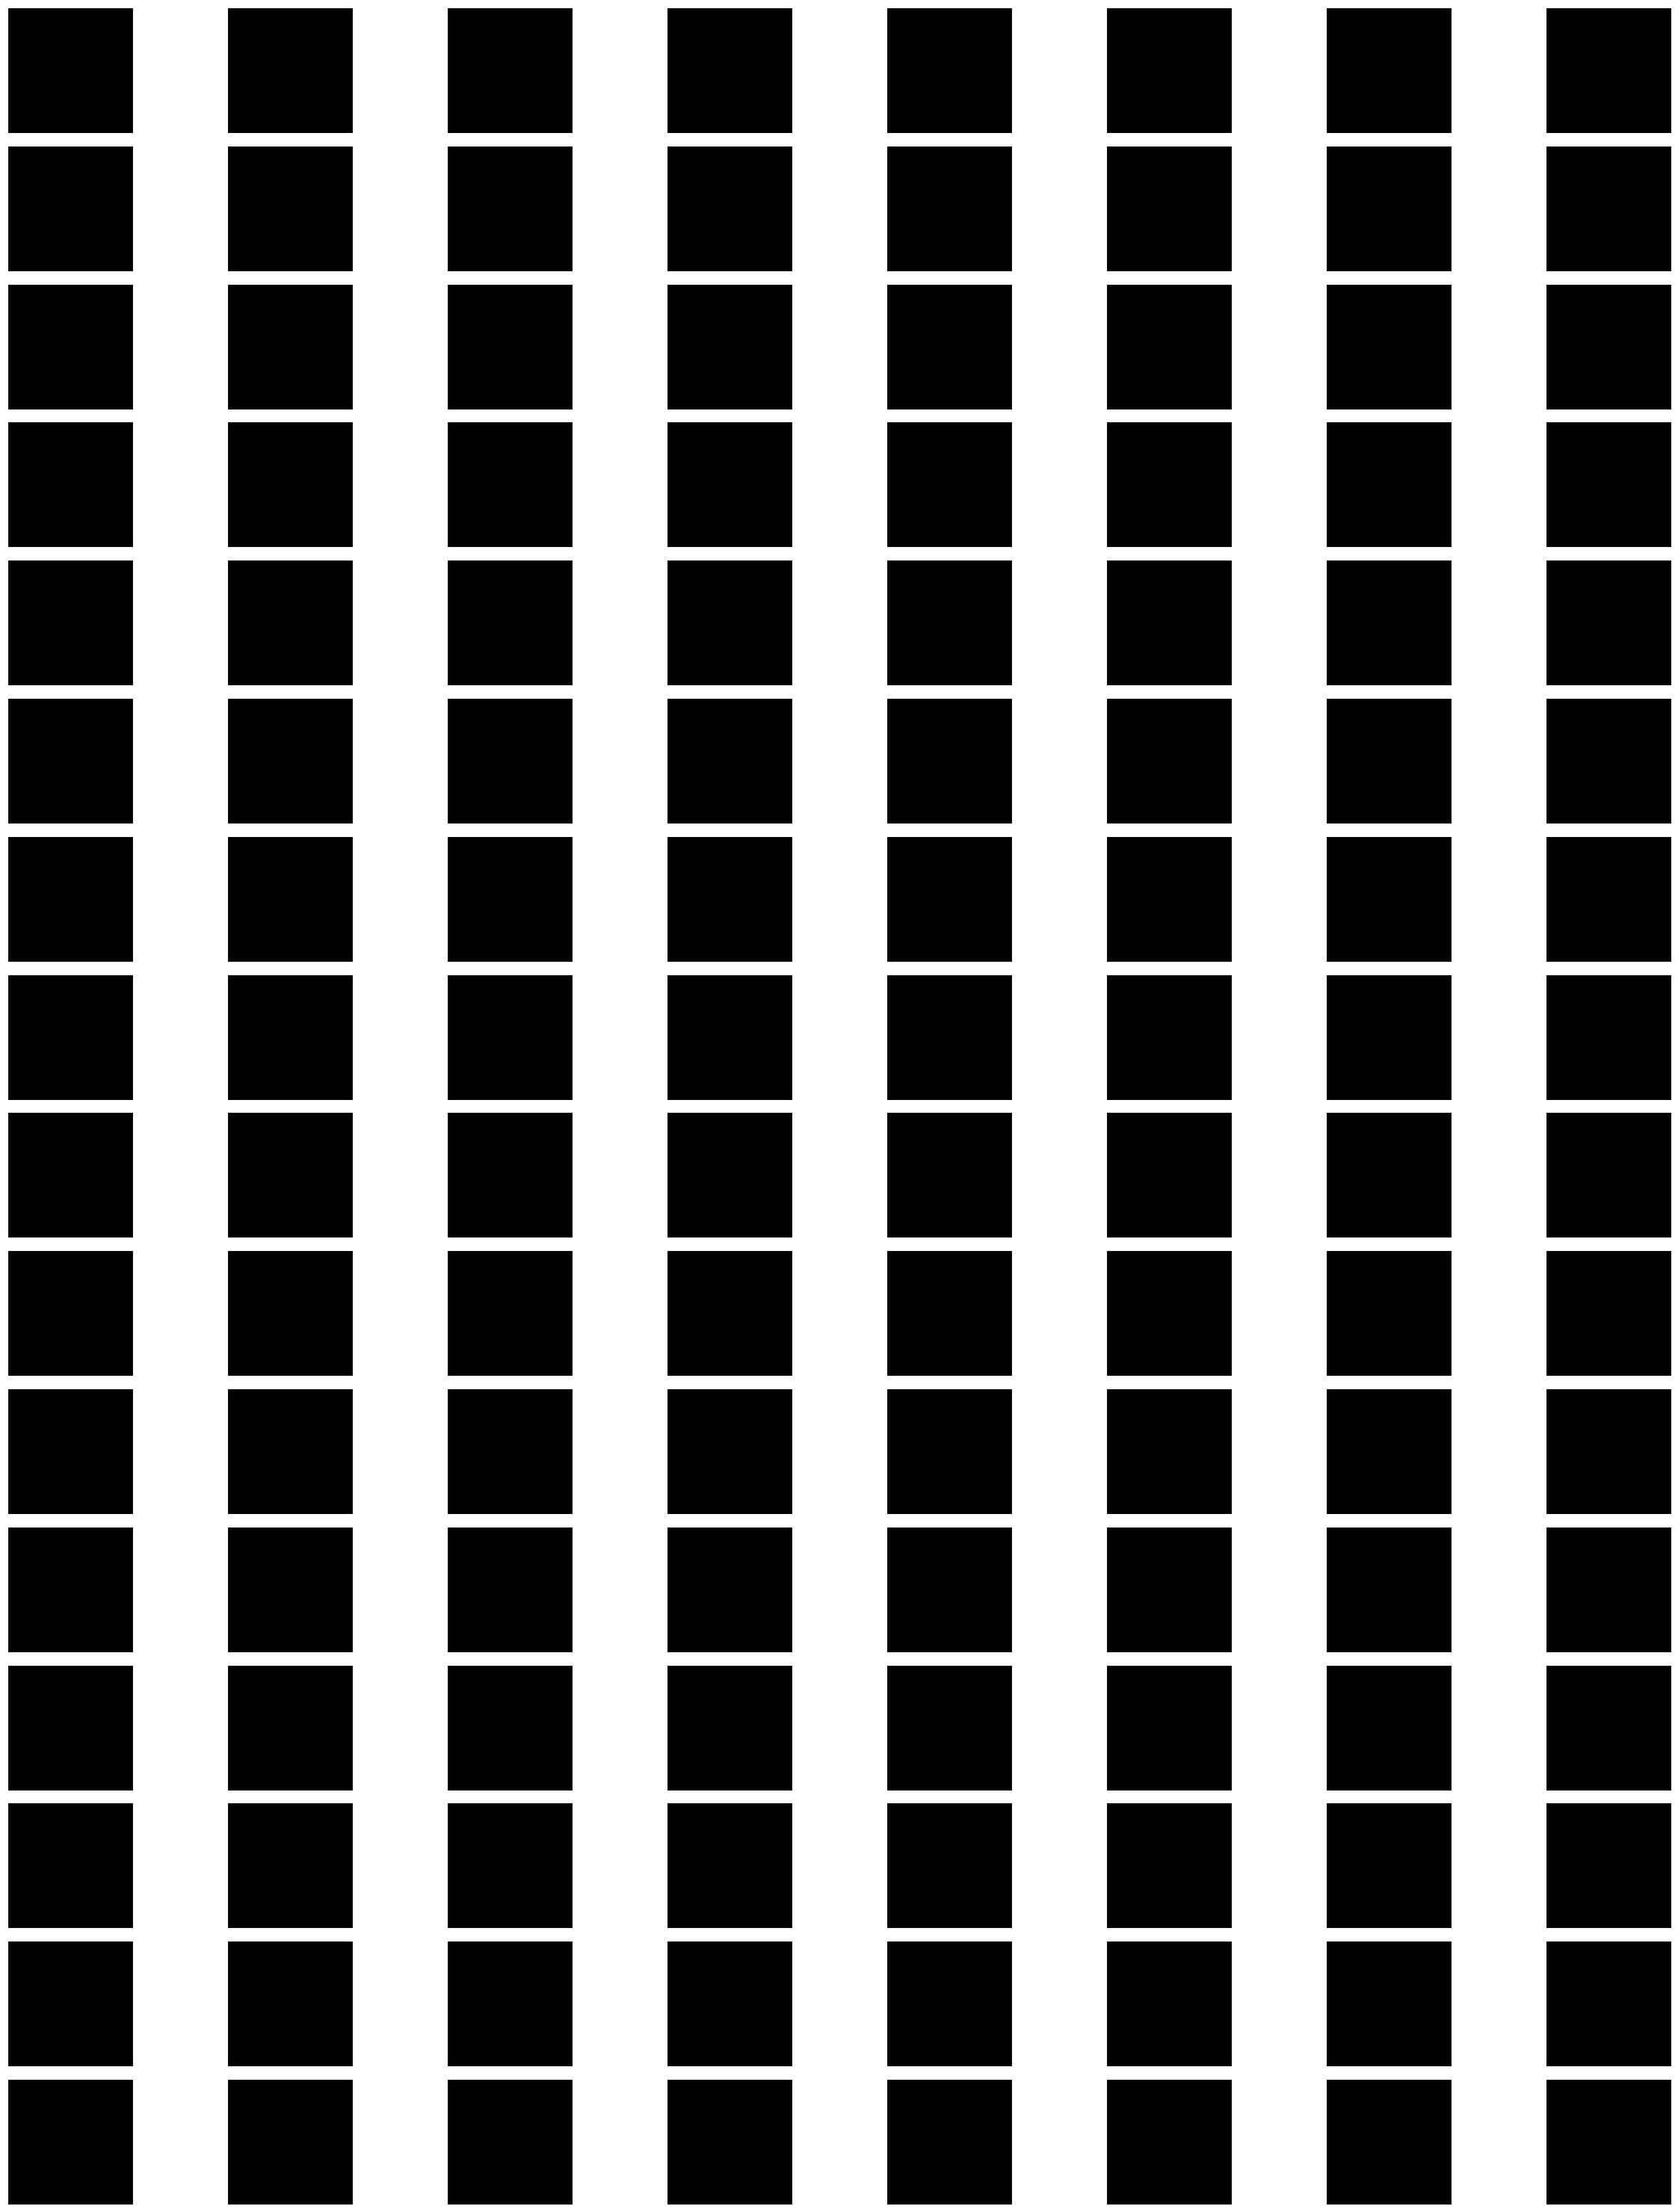

In [124]:
# get names of layers of CNN
layer_names = [layer.name for layer in model.layers]

# getting outputs of the layers of CNN
layer_outputs = [layer.output for layer in model.layers]

# redefine model to output right after hidden layers
feature_extractor = Model(inputs=model.inputs, outputs=layer_outputs)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(x_train[0], axis=0)

# get feature map for hidden layers
feature_maps = feature_extractor.predict(img, verbose=0)

# Display one image in x_train which can be compared to feature maps
print("Original image:")
plt.subplot(1, 8, 1)
plt.imshow(x_train[0], cmap="gray")
plt.axis("off")
plt.show()

# plot the output
for i in range(len(feature_maps)):
    ix = 1
    if len(feature_maps[i].shape) == 4:
        print(layer_names[i])
        # Number of feature images/dimensions in a feature map of a layer
        k = feature_maps[i].shape[-1]
        for _ in range(8):
            for _ in range(math.ceil(k / 8)):
                # specify subplot and turn of axis
                ax = plt.subplot((math.ceil(k / 8)), 8, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                # plot filter channel in grayscale
                plt.imshow(feature_maps[i][0, :, :, ix - 1], cmap="gray")
                plt.subplots_adjust(
                    top=0.99, bottom=0.01, hspace=0.1, wspace=0.1
                )
                ix += 1
        # show the figure
        plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>The activation maps, known as feature maps, capture the result of applying the filters to the inpt, such as the input image or another feature map.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Cross Validation</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Using resampling method that uses different portions of the data to test and train a model on different iterations.</li> 
</ul>

In [125]:
def evaluate_model(dataX, dataY, n_folds=3):
    scores, histories = list(), list()
    # prepare cross validation
    kfold = KFold(n_folds, shuffle=True, random_state=42)
    # enumerate splits
    for train_ix, test_ix in kfold.split(dataX):
        # select rows for train and test
        x_train, y_train, x_val, y_val = (
            dataX[train_ix],
            dataY[train_ix],
            dataX[test_ix],
            dataY[test_ix],
        )
        # fit model
        history = model.fit(
            x_train,
            y_train,
            epochs=5,
            batch_size=32,
            validation_data=(x_val, y_val),
            verbose=1,
        )

        # evaluate model
        validation = model.evaluate(x_val, y_val, verbose=0)
        loss = validation[0]
        accuracy = validation[1]
        precision = validation[2]
        recall = validation[3]
        f1_score = 2 * (precision * recall) / (precision + recall)

        scores.append(validation[1])
        histories.append(history)

    return scores, histories

In [126]:
# evaluate model
scores, histories = evaluate_model(x_train, y_train)

Epoch 1/5
5000/5000 [==============================] - 499s 99ms/step - loss: 0.1089 - accuracy: 0.9670 - precision: 0.9742 - recall: 0.9621 - val_loss: 0.0258 - val_accuracy: 0.9920 - val_precision: 0.9927 - val_recall: 0.9916
Epoch 2/5
5000/5000 [==============================] - 617s 123ms/step - loss: 0.0459 - accuracy: 0.9862 - precision: 0.9876 - recall: 0.9850 - val_loss: 0.0185 - val_accuracy: 0.9945 - val_precision: 0.9947 - val_recall: 0.9941
Epoch 3/5
5000/5000 [==============================] - 659s 132ms/step - loss: 0.0321 - accuracy: 0.9901 - precision: 0.9911 - recall: 0.9893 - val_loss: 0.0132 - val_accuracy: 0.9961 - val_precision: 0.9963 - val_recall: 0.9959
Epoch 4/5
5000/5000 [==============================] - 663s 133ms/step - loss: 0.0255 - accuracy: 0.9923 - precision: 0.9930 - recall: 0.9917 - val_loss: 0.0108 - val_accuracy: 0.9964 - val_precision: 0.9966 - val_recall: 0.9962
Epoch 5/5
5000/5000 [==============================] - 666s 133ms/step - loss: 0.0206

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Learning Curves for Cross Validation</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>A learning curve is a plot that shows the model's learning performance over experience or time.</li> 
</ul>

In [ ]:
# plot diagnostic learning curves for cross validation
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        # plot loss
        plt.subplot(2, 1, 1)
        plt.title("Cross Entropy Loss")
        plt.plot(histories[i].history["loss"], color="blue", label="train")
        plt.plot(
            histories[i].history["val_loss"], color="orange", label="test"
        )
        # plot accuracy
        plt.subplot(2, 1, 2)
        plt.title("Classification Accuracy")
        plt.plot(histories[i].history["accuracy"], color="blue", label="train")
        plt.plot(
            histories[i].history["val_accuracy"], color="orange", label="test"
        )
    plt.show()

In [128]:
# summarize model performance
def summarize_performance(scores):
    # print summary
    print(
        "Accuracy: mean=%.3f std=%.3f, n=%d"
        % (mean(scores) * 100, std(scores) * 100, len(scores))
    )
    # box and whisker plots of results
    plt.boxplot(scores)
    plt.show()

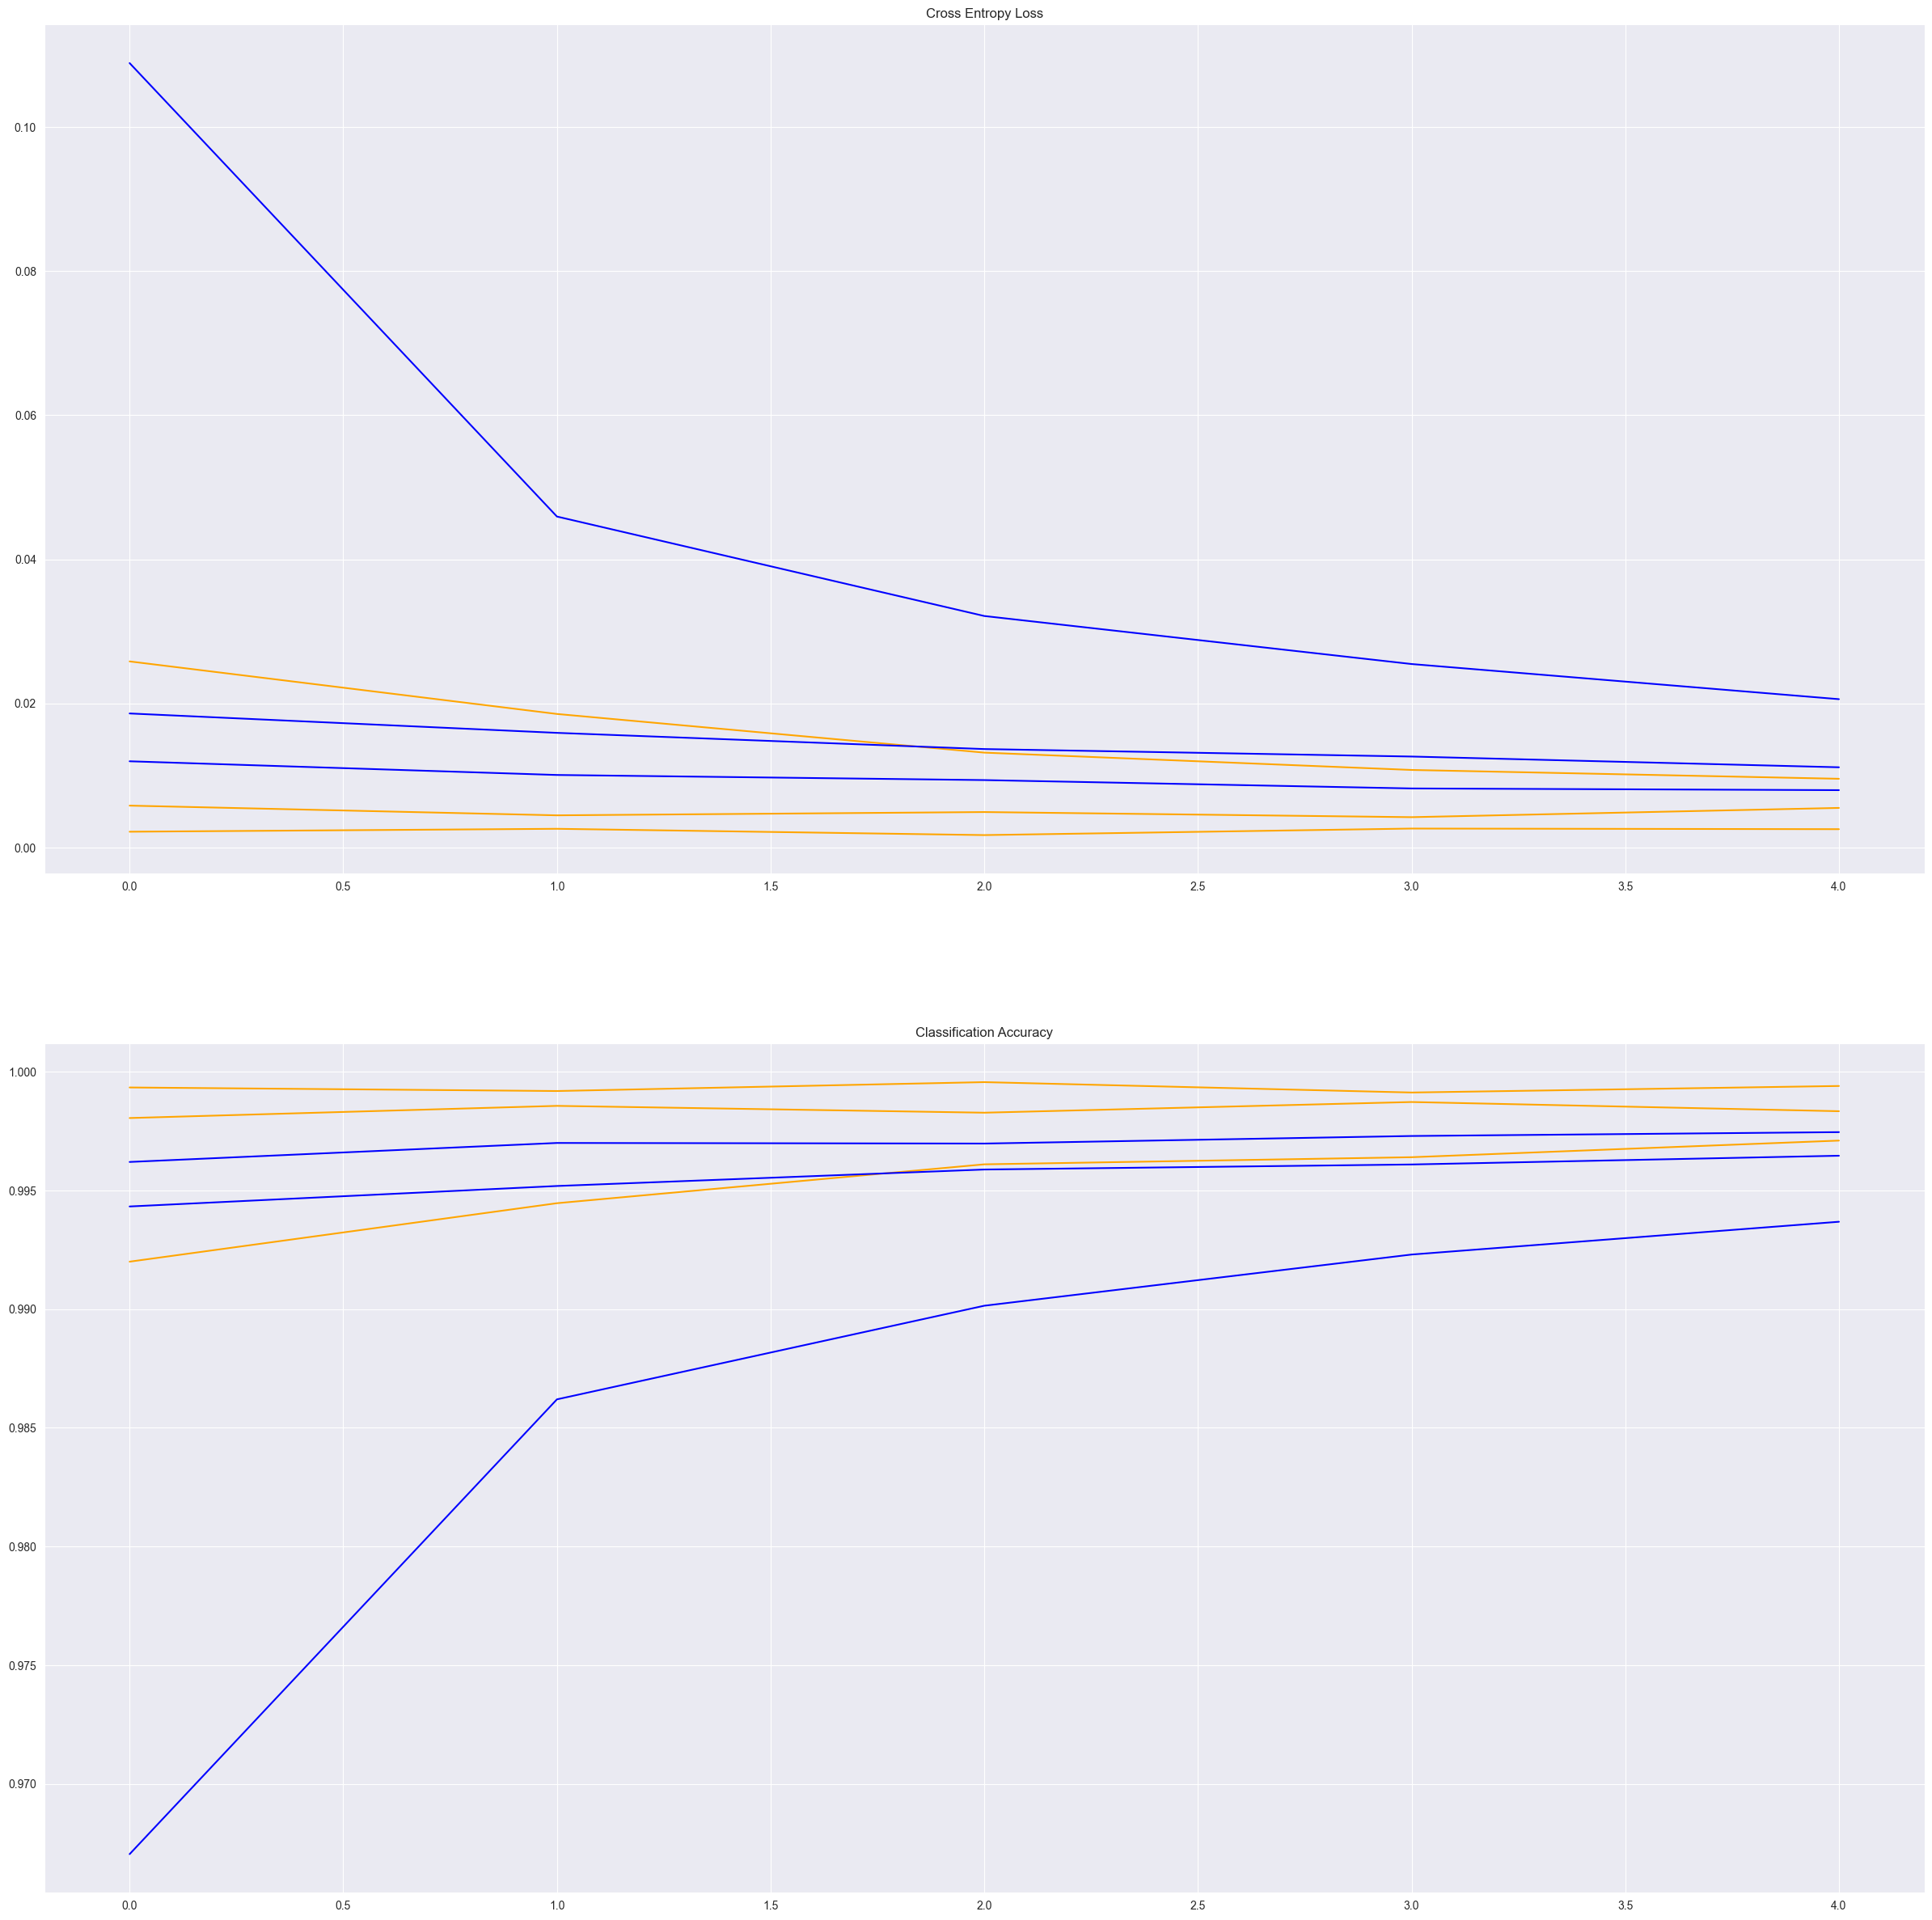

In [129]:
# learning curves for cross validation
summarize_diagnostics(histories)

Accuracy: mean=99.828 std=0.094, n=3


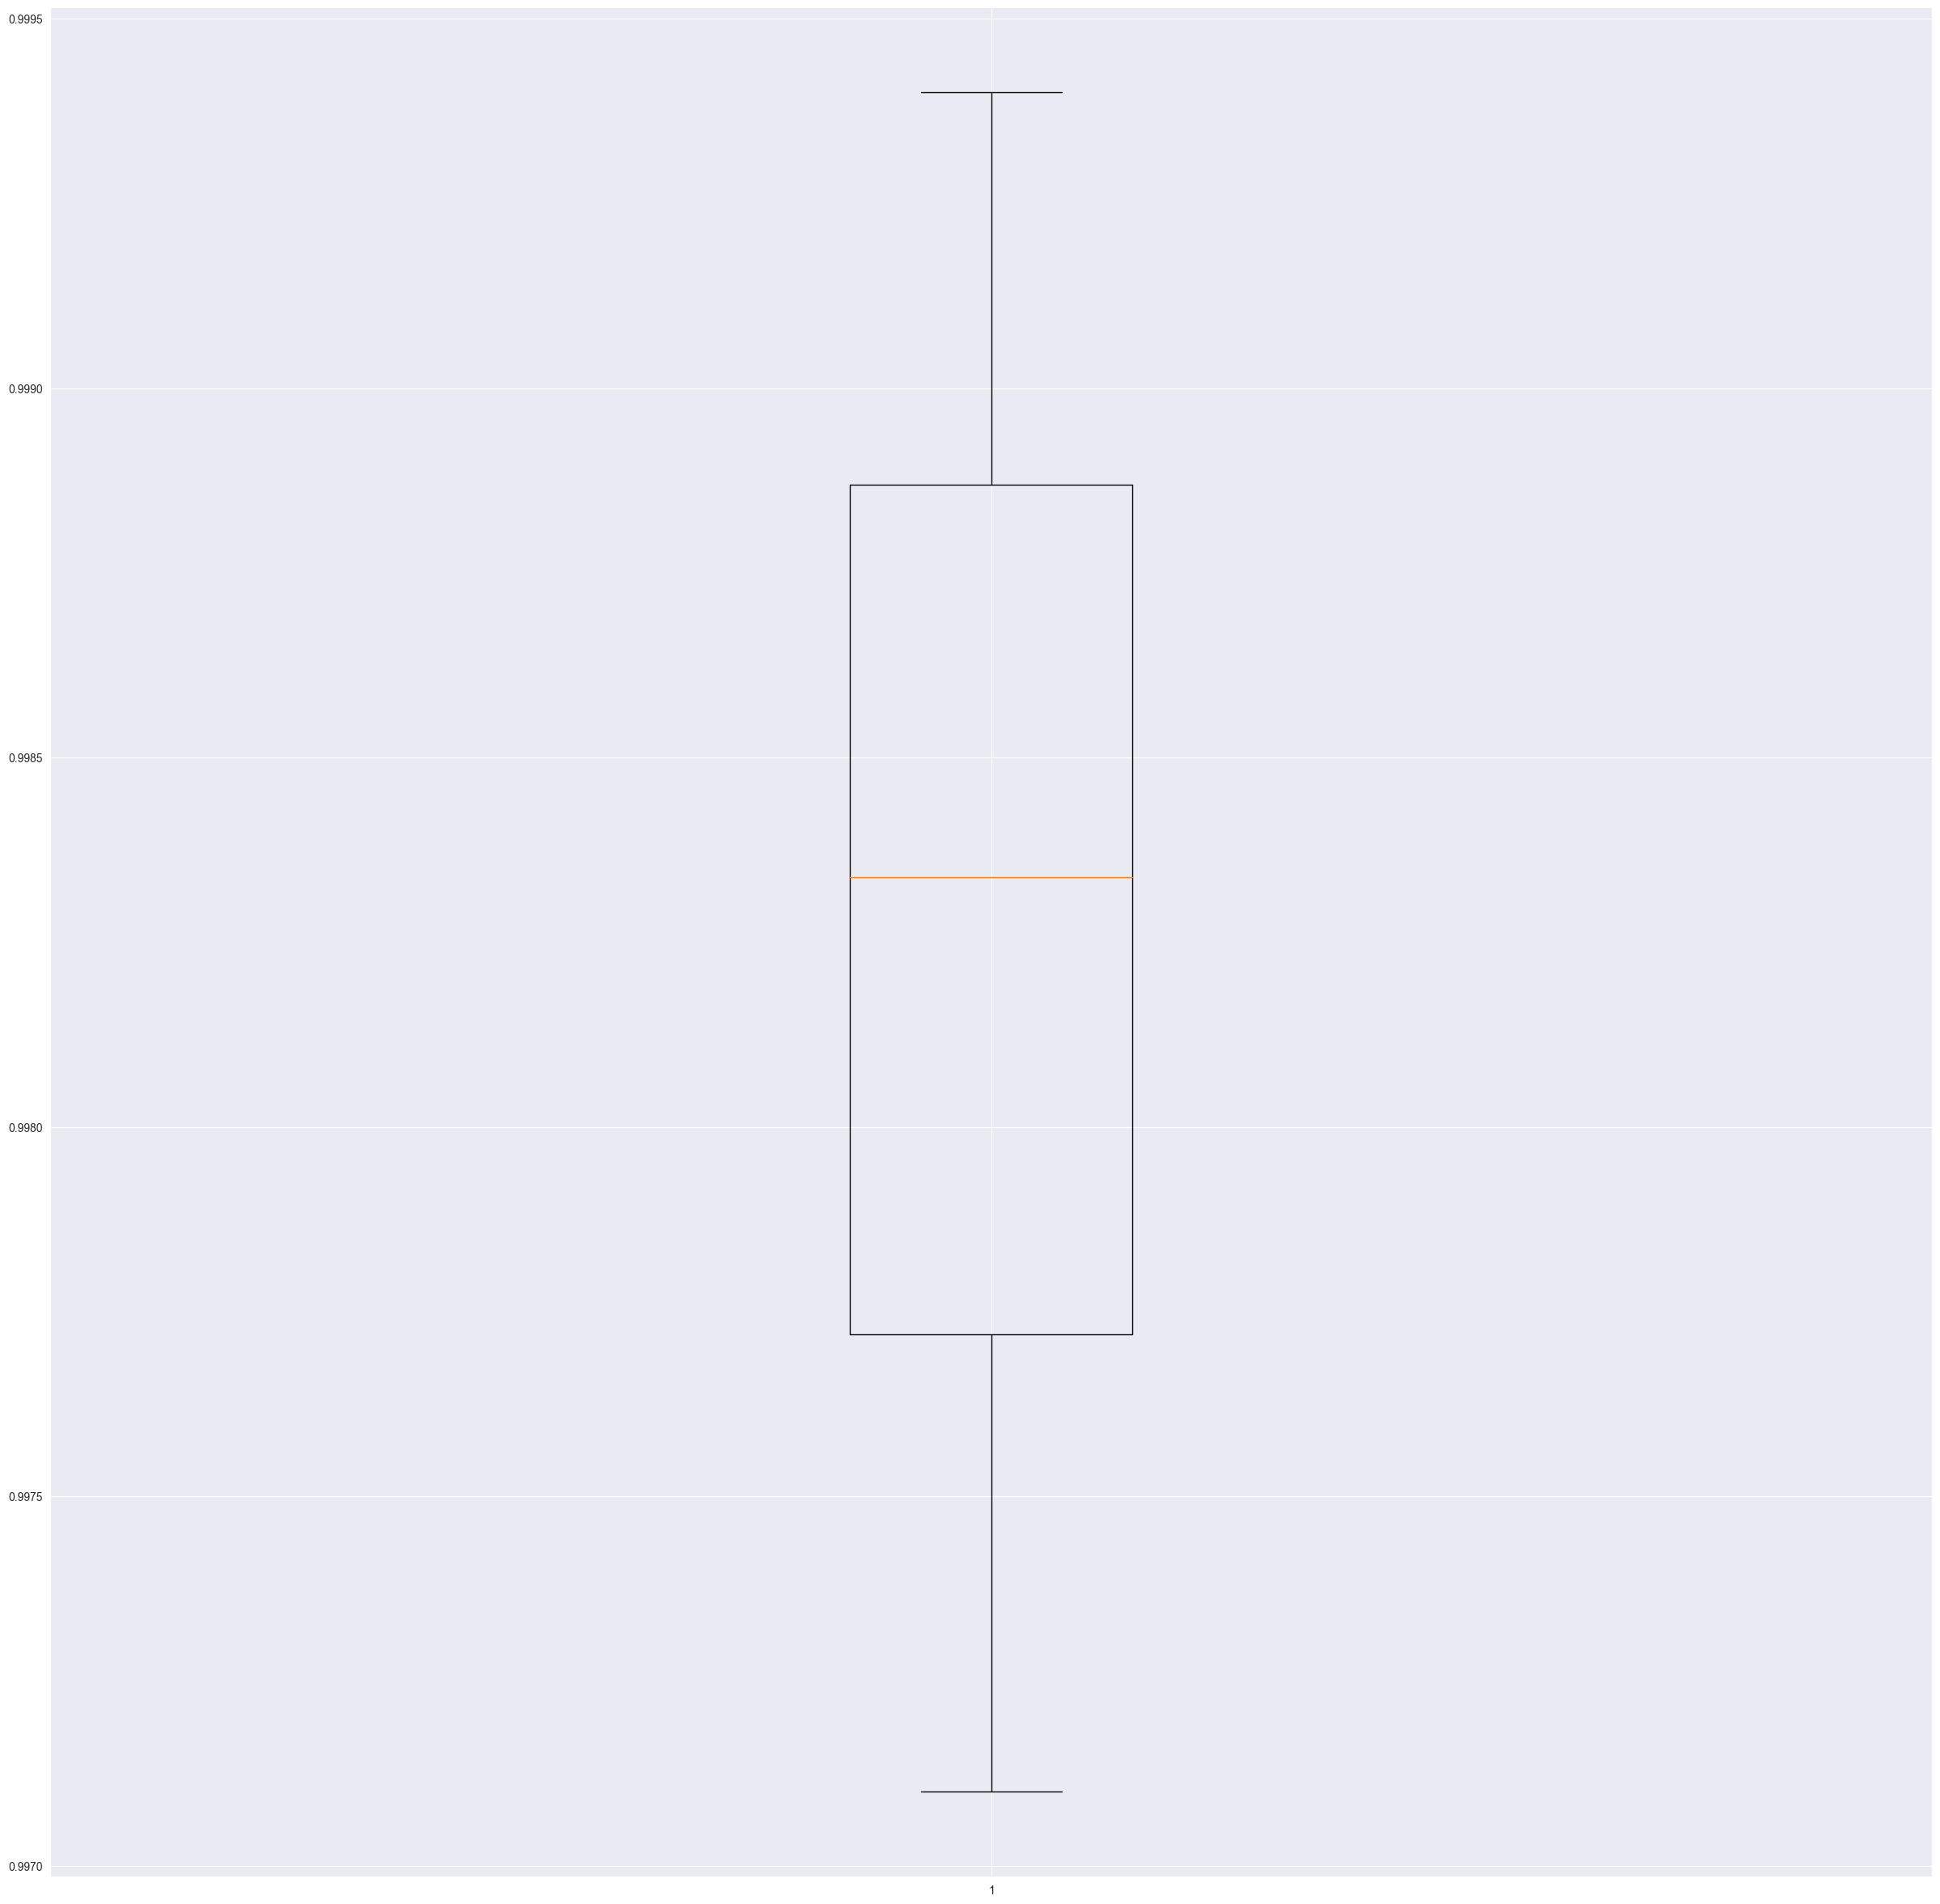

In [130]:
# summarize estimated performance
summarize_performance(scores)

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Fine-tune the CNN Model</li>
</ul>

<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Using grid search with cross-validation with the help of the GridSearchCV, we can find good hyperparameter values for a CNN model.</li> 
</ul>

In [166]:
# Suppress TensorFlow warnings
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

In [167]:
# wrap the model with KerasClassifier
Classifier = KerasClassifier(model=model, verbose=1)

# define the grid search parameters
param_grid = dict(batch_size=[32, 64], epochs=[5])
grid = GridSearchCV(
    estimator=Classifier, param_grid=param_grid, n_jobs=-1, cv=3, verbose=1
)

# fit the data
grid_result = grid.fit(x_train, y_train)

# summarize results
print(
    "Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)
)
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Epoch 1/5
3750/3750 [==============================] - 606s 161ms/step - loss: 0.0041 - accuracy: 0.9987 - precision: 0.9988 - recall: 0.9987
Epoch 2/5
3750/3750 [==============================] - 601s 160ms/step - loss: 0.0038 - accuracy: 0.9988 - precision: 0.9988 - recall: 0.9987
Epoch 3/5
3750/3750 [==============================] - 597s 159ms/step - loss: 0.0036 - accuracy: 0.9989 - precision: 0.9989 - recall: 0.9989
Epoch 4/5
3750/3750 [==============================] - 597s 159ms/step - loss: 0.0035 - accuracy: 0.9989 - precision: 0.9989 - recall: 0.9989
Epoch 5/5
3750/3750 [==============================] - 591s 158ms/step - loss: 0.0032 - accuracy: 0.9990 - precision: 0.9990 - recall: 0.9990
Best: 0.999725 using {'batch_size': 64, 'epochs': 5}
0.999542 (0.000104) with: {'batch_size': 32, 'epochs': 5}
0.999725 (0.000053) with: {'batch_size': 64, 'epochs': 5}


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li><span style="font-weight: bold; color:green;">GridSearchCV</span> is used to find the best hyperparameters for  CNN model based on cross-validation. These parameters are expected to  <span style="font-weight: bold; color:#122ecc;">optimize</span> the model's performance.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Training the CNN Model</li>
</ul>

<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>By minimizing the loss function through several epochs, the CNN model finds its best weight to predict the unseen data.</li> 
</ul>

In [168]:
# define a class to calculate the spending time of each epoch
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [169]:
# define hyperparameter
batch_size = 64
epochs = 500

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Because of early stopping callback, we can define a higher epoch number, and know it will stop much earlier.</li>
    <br>
</ul>
</div>

In [170]:
def train_model(model=model, batch_size=batch_size, epochs=epochs):

    # set the time callback to calculate the spending time of each epoch
    time_callback = TimeHistory()

    # simple early stopping
    patience = 15
    es = EarlyStopping(
        monitor="val_accuracy",
        mode="max",
        verbose=1,
        patience=patience,
        restore_best_weights=True,
    )
    mc = ModelCheckpoint(
        "trained_model_{}.h5".format(model.name),
        monitor="val_accuracy",
        mode="max",
        verbose=1,
        save_best_only=True,
    )

    rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
    )

    # fit the model
    history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_split=0.1,
        callbacks=[time_callback, es, mc, rp],
        shuffle=True,
    )

    # measure training performance
    train_performance = pd.DataFrame.from_dict(history.history, orient="index")

    # define the row indexes
    train_performance.index = [
        "train_loss",
        "train_accuracy",
        "train_precision",
        "train_recall",
        "val_loss",
        "val_accuracy",
        "val_precision",
        "val_recall",
        "learning_rate",
    ]

    # record the time consumed for each epoch
    times = time_callback.times

    # concatenate the epoch time
    epoch_time = pd.DataFrame(
        [times], index=["epoch_time"], columns=train_performance.columns
    )
    train_performance = pd.concat([epoch_time, train_performance], axis=0)

    best_epoch = len(history.history["loss"]) - patience

    return train_performance, best_epoch

In [171]:
train_performance,best_epoch = train_model()

Epoch 1/500
3375/3375 [==============================] - ETA: 0s - loss: 0.0041 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9986
Epoch 1: val_accuracy improved from -inf to 0.99946, saving model to trained_model_model0_10label.h5
3375/3375 [==============================] - 572s 169ms/step - loss: 0.0041 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9986 - val_loss: 0.0020 - val_accuracy: 0.9995 - val_precision: 0.9995 - val_recall: 0.9995 - lr: 0.0010
Epoch 2/500
3375/3375 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9986
Epoch 2: val_accuracy improved from 0.99946 to 0.99958, saving model to trained_model_model0_10label.h5
3375/3375 [==============================] - 557s 165ms/step - loss: 0.0039 - accuracy: 0.9987 - precision: 0.9987 - recall: 0.9986 - val_loss: 0.0014 - val_accuracy: 0.9996 - val_precision: 0.9996 - val_recall: 0.9996 - lr: 0.0010
Epoch 3/500
3375/3375 [==============================] - ET

In [172]:
train_performance

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
epoch_time,571.439406,557.099860,555.202738,554.303690,557.528276,559.739189,567.102638,556.386067,560.958290,554.038966,...,545.344951,541.178507,542.883072,548.348800,543.840294,517.469203,511.218379,512.909713,525.990161,497.218827
train_loss,0.004091,0.003892,0.003416,0.003603,0.003068,0.001608,0.001041,0.001136,0.000886,0.000850,...,0.000555,0.000560,0.000602,0.000497,0.000686,0.000502,0.000590,0.000547,0.000652,0.000692
train_accuracy,0.998676,0.998671,0.998866,0.998926,0.999028,0.999463,0.999671,0.999606,0.999713,0.999731,...,0.999829,0.999801,0.999833,0.999861,0.999819,0.999843,0.999824,0.999833,0.999782,0.999796
train_precision,0.998731,0.998722,0.998917,0.998940,0.999056,0.999472,0.999676,0.999620,0.999736,0.999731,...,0.999833,0.999810,0.999838,0.999880,0.999824,0.999847,0.999838,0.999833,0.999782,0.999796
train_recall,0.998630,0.998625,0.998829,0.998898,0.999000,0.999454,0.999657,0.999593,0.999708,0.999713,...,0.999829,0.999801,0.999833,0.999852,0.999815,0.999824,0.999819,0.999829,0.999782,0.999796
val_loss,0.001972,0.001443,0.000850,0.000996,0.001182,0.000459,0.000557,0.000469,0.000455,0.000470,...,0.000462,0.000466,0.000474,0.000467,0.000471,0.000485,0.000493,0.000499,0.000502,0.000489
val_accuracy,0.999458,0.999583,0.999667,0.999667,0.999542,0.999833,0.999792,0.999875,0.999875,0.999875,...,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999875,0.999917
val_precision,0.999458,0.999583,0.999667,0.999667,0.999542,0.999833,0.999792,0.999875,0.999875,0.999875,...,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999875,0.999917
val_recall,0.999458,0.999583,0.999667,0.999667,0.999542,0.999833,0.999792,0.999875,0.999875,0.999875,...,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999917,0.999875,0.999917
learning_rate,0.001000,0.001000,0.001000,0.001000,0.001000,0.000200,0.000200,0.000200,0.000200,0.000040,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/Insights%20logo.png" align="left" hspace="0px" vspace="10px" width="180" height="150"></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">Insights:</li>
</ul>
<div class="alert alert-success" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black">
    <li>Because of early stopping callback, we can define a higher epoch number, and know it will stop much earlier.</li>
    <br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Learning Curves for Single Validation</li>
</ul>

<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>There is only one epochs' results in the plot.</li> 
</ul>

In [173]:
def learning_curve(train_performance):

    # plot the train accuracy and validation accuracy
    train_accuracy = train_performance.loc["train_accuracy"].values
    plt.plot(train_accuracy)
    val_accuracy = train_performance.loc["val_accuracy"].values
    plt.plot(val_accuracy)
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    fig1 = plt.gcf()
    os.makedirs("learning curve", exist_ok=True)
    fig1.savefig("learning curve/model accuracy{}.png".format(datetime.now().strftime("%Y%m%d%H%M%S")))

    plt.show()
    plt.clf()

    # plot the train loss and validation loss
    train_loss = train_performance.loc["train_loss"].values
    plt.plot(train_loss)
    val_loss = train_performance.loc["val_loss"].values
    plt.plot(val_loss)
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    fig2 = plt.gcf()
    os.makedirs("learning curve", exist_ok=True)
    fig2.savefig("learning curve/model loss{}.png".format(
        datetime.now().strftime("%Y%m%d%H%M%S")))
    plt.show()
    plt.clf()

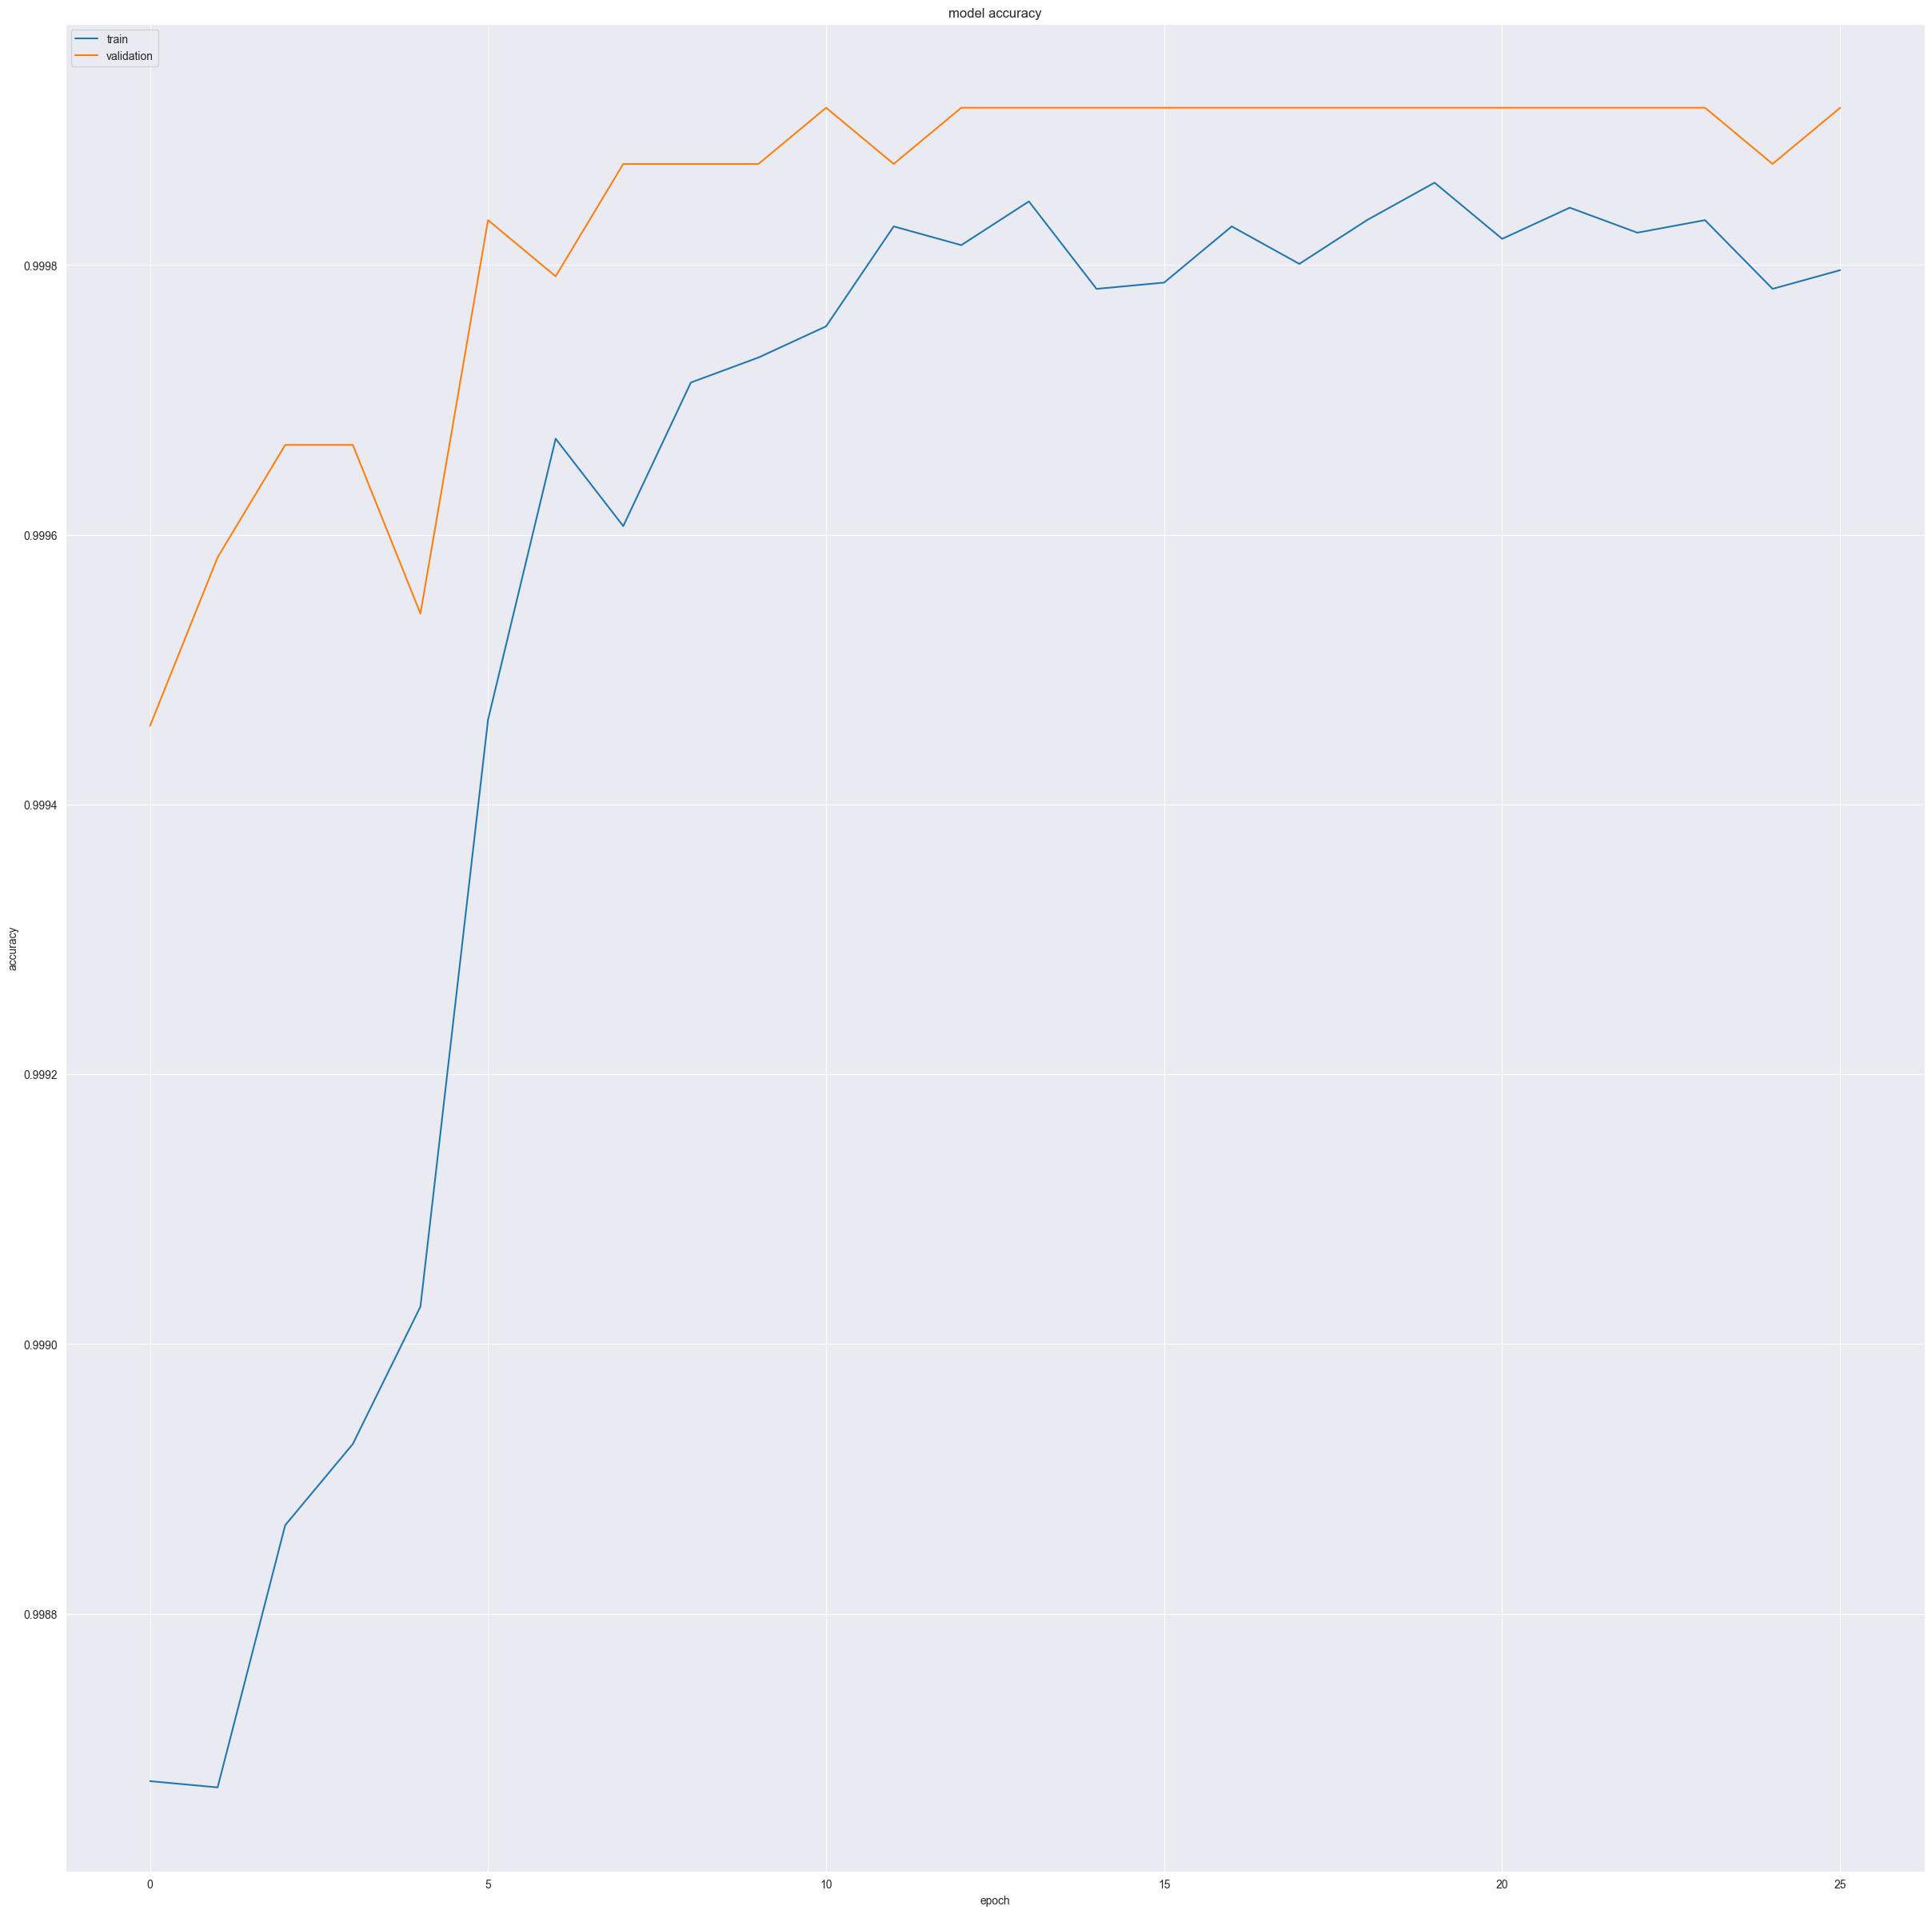

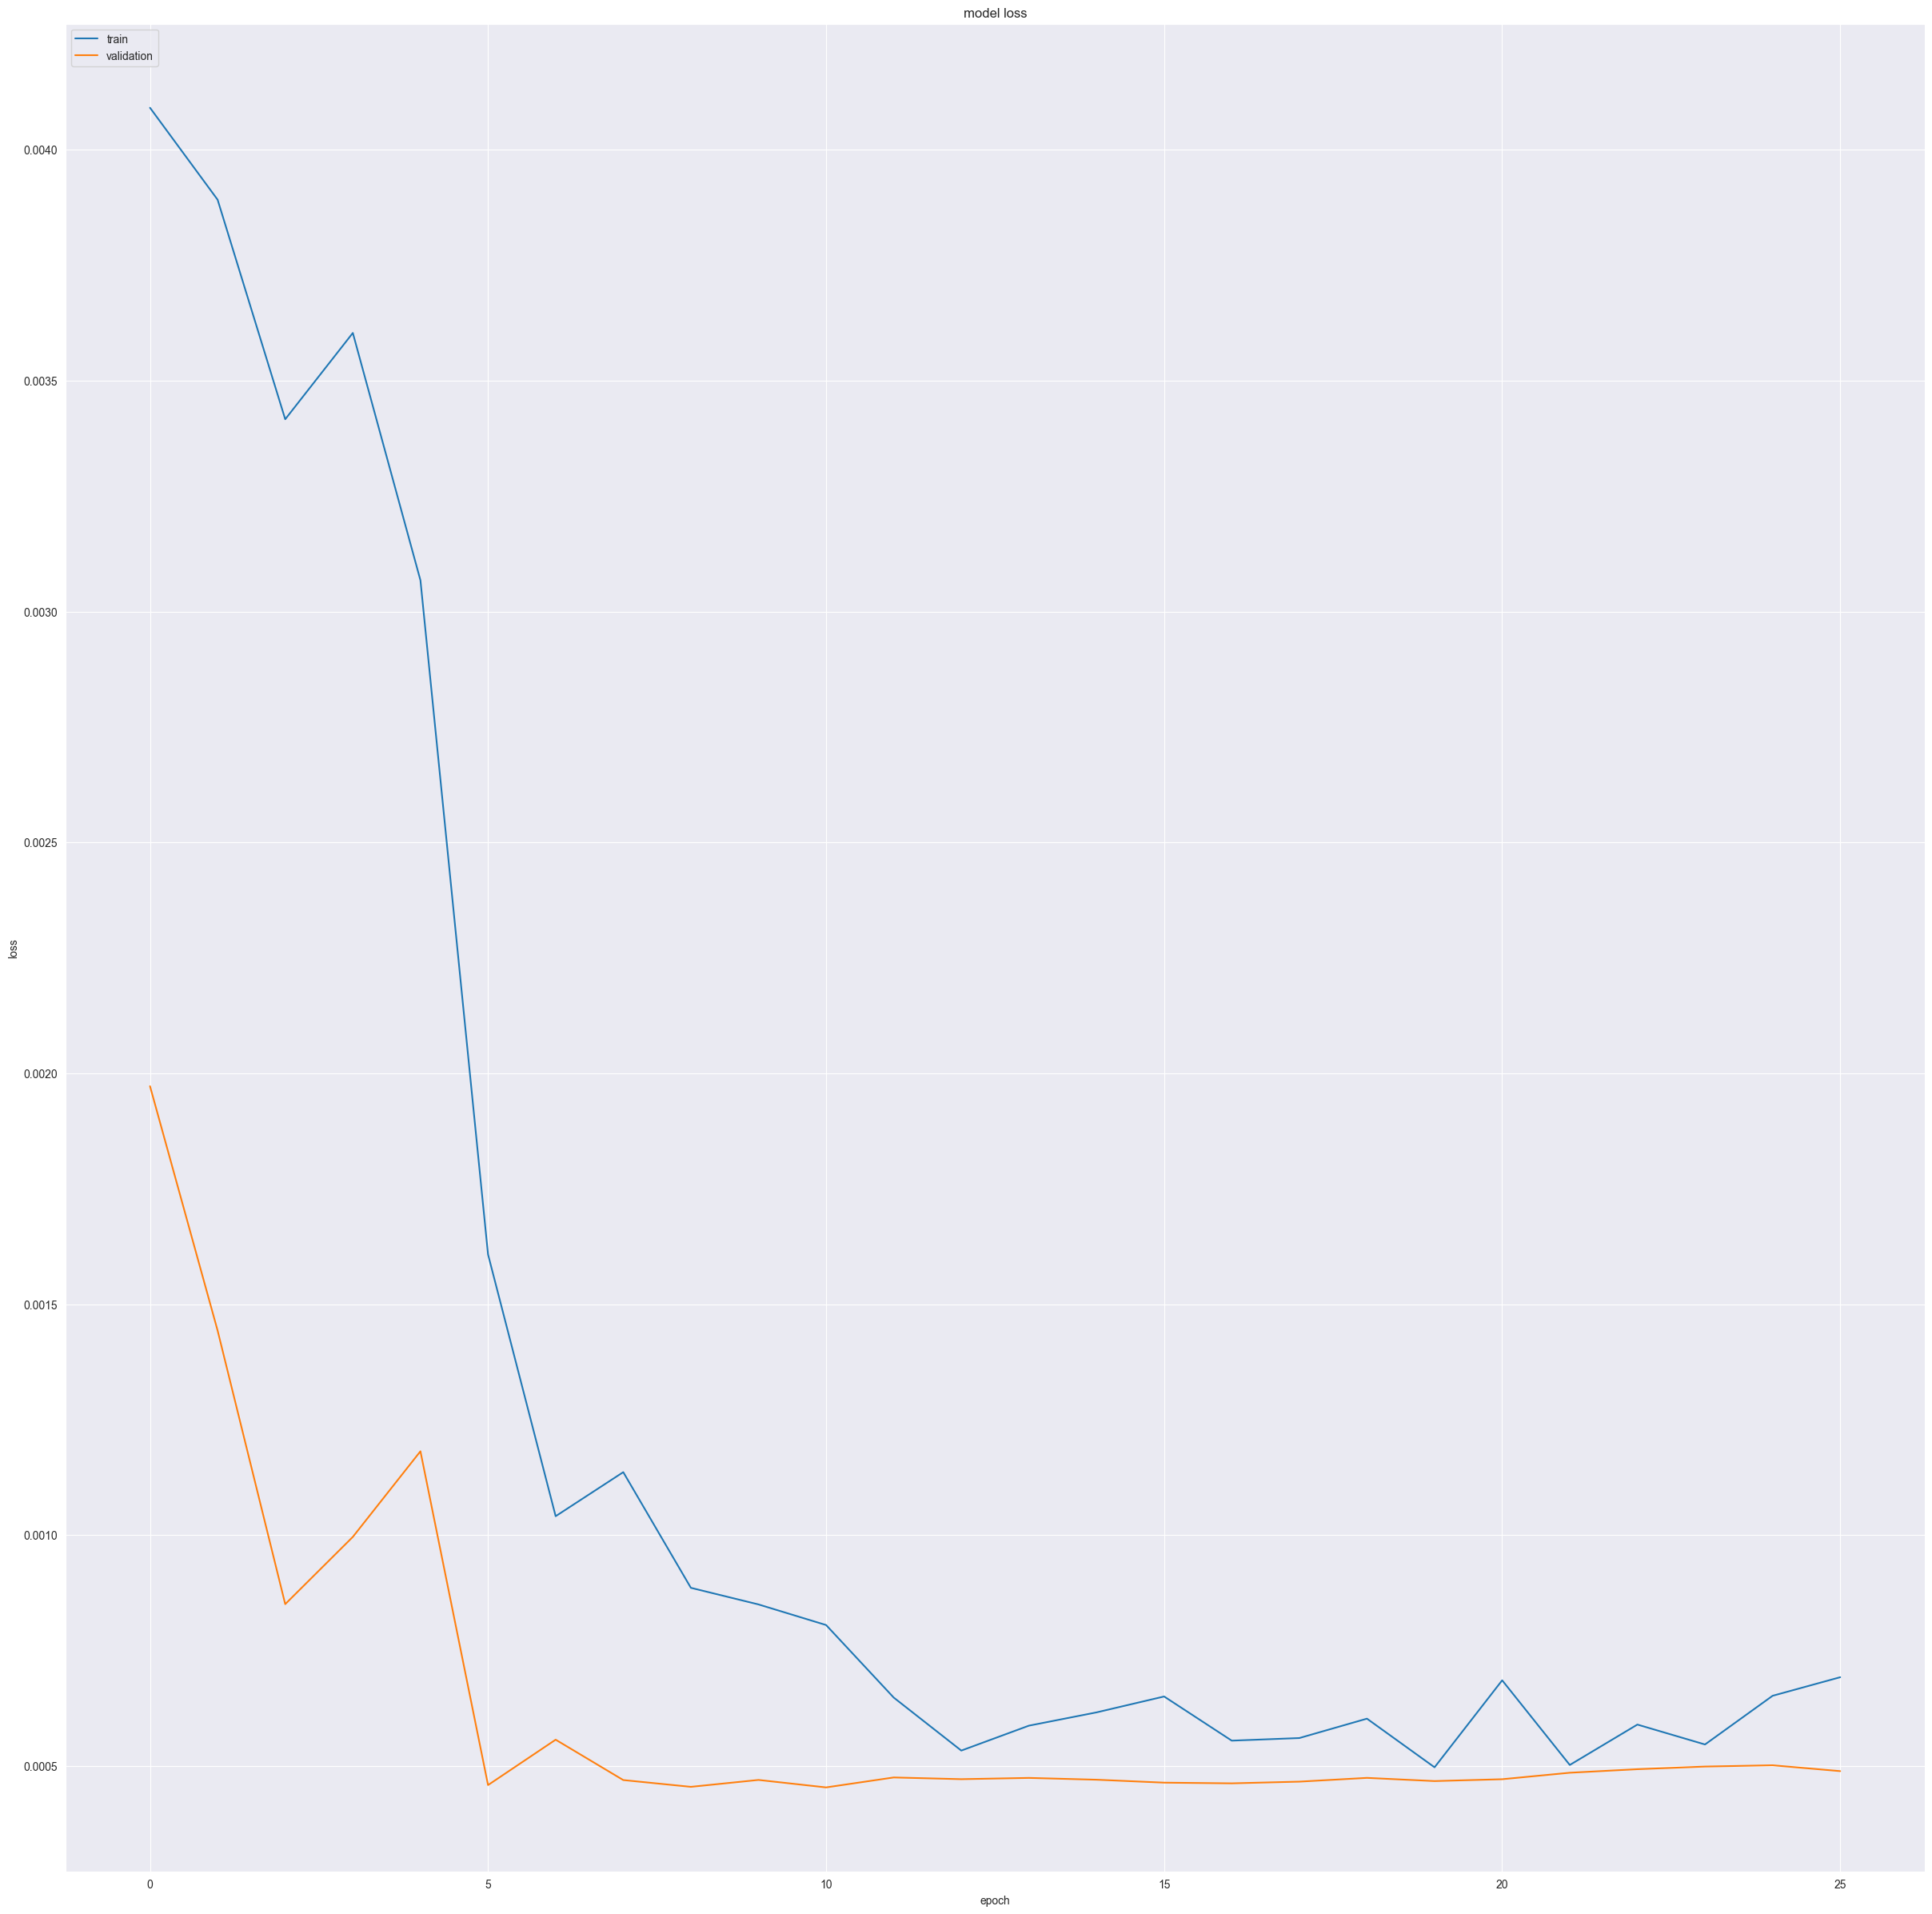

<Figure size 3000x3000 with 0 Axes>

In [202]:
learning_curve(train_performance)

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/ModelSelection.png" align="left" hspace="25px" vspace="25px" width="60" height="70" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Model Prediction</li>
</ul>

<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>After training, let's see what the model can do.</li> 
</ul>

1875/1875 [==============================] - 50s 27ms/step


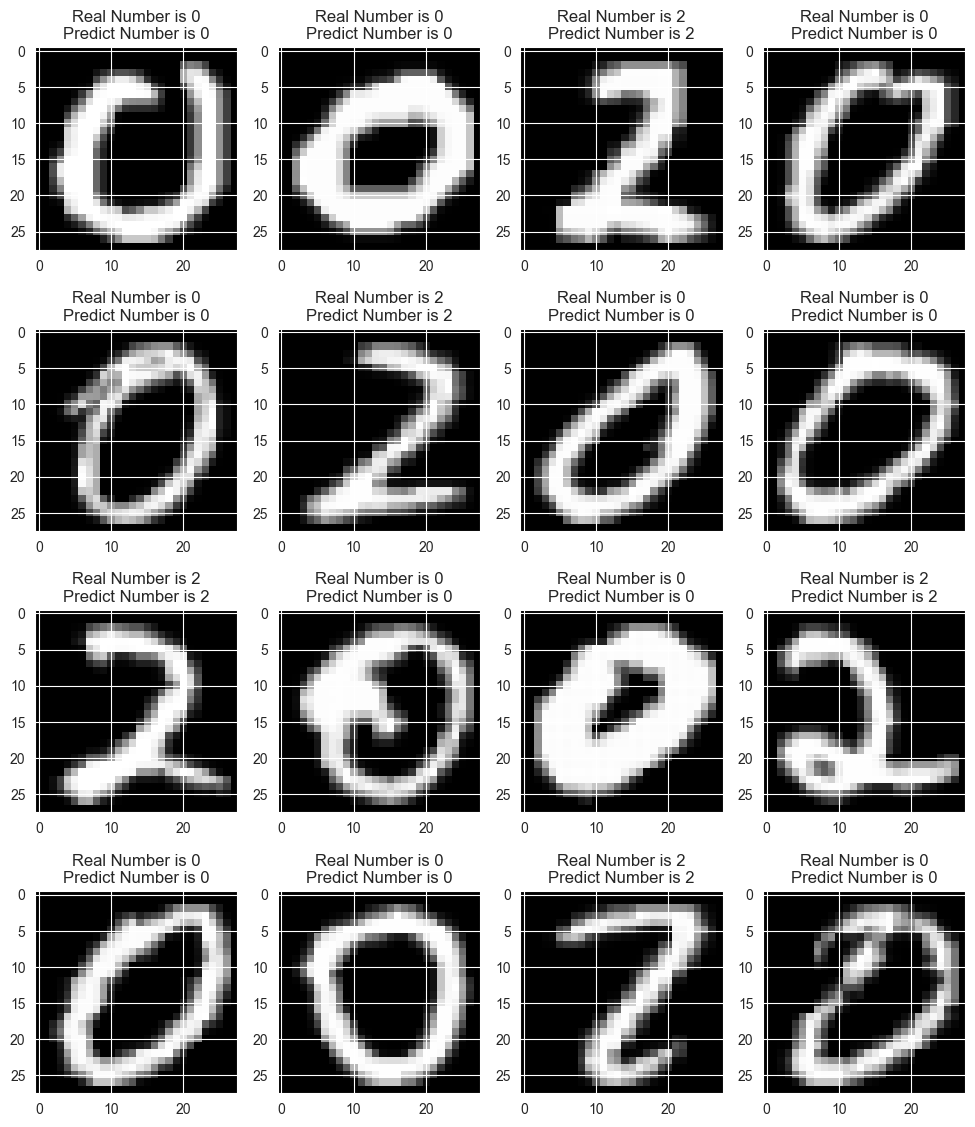

In [175]:
y_pred = model.predict(x_test)
x_test_r = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test_r[i], cmap="gray")
    ax.set(
        title=f"Real Number is {y_test[i].argmax()}\nPredict Number is {y_pred[i].argmax()}"
    );

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/ModelSelection.png" align="left" hspace="25px" vspace="5px" width="60" height="70" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Model Testing</li>
</ul>

<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Report the performance of the CNN model using appropriate performance metrics: accuracy, precision, recall, f1 score.</li> 
</ul>

In [203]:
def test_model(model=model):

    # load the saved model
    saved_model = load_model("trained_model_{}.h5".format(model.name))

    # measure test performance
    score = saved_model.evaluate(x_test, y_test, verbose=0)
    loss = score[0]
    accuracy = score[1]
    precision = score[2]
    recall = score[3]
    f1_score = 2 * (precision * recall) / (precision + recall)

    # set the test performance as dataframe
    test_performance = pd.DataFrame(
        [loss, accuracy, precision, recall, f1_score],
        columns=["performance"],
        index=[
            "test_loss",
            "test_accuracy",
            "test_precision",
            "test_recall",
            "test_f1 score",
        ],
    )

    # record the time consumed for each epoch, and compute the average
    # times = time_callback.times

    # note the detail information of performance data
    a1 = datetime.now().isoformat(" ", "seconds")
    a2 = preprocess
    a3 = model.name
    a4 = "Resized=({},{}),batch_size={},epochs={},num_classes={}".format(
        width, height, batch_size, epochs, num_classes
    )
    a5 = best_epoch
    # a6 = np.average(times)

    add = pd.DataFrame(
        {"performance": [a1, a2, a3, a4, a5]},
        index=[
            "datetime",
            "preprocess",
            # "dropout",
            "model name",
            "detail",
            "best_epoch",
            # "average_epoch_time",
        ],
    )

    # Select last column of train_performance as a series and convert it
    last_column = train_performance.iloc[:, -1]
    last_column = last_column.rename("performance")
    last_column = last_column.to_frame()

    # concatenate all information
    performance = pd.concat(
        [
            add,
            last_column,
            test_performance,
        ],
        axis=0,
    )

    # combine new data with old data as an updated file
    os.makedirs("test model", exist_ok=True)
    path_p = r"test model"
    filelist = [
        file for file in os.listdir("test model") if file.endswith(".csv")
    ]

    if len(filelist) >= 1:
        file_latest = filelist[-1]
        file_latest_path = os.path.join(path_p, file_latest)
        latest = pd.read_csv(file_latest_path, index_col=0)

        update = pd.concat([latest, performance], axis=1)

        update.to_csv(
            "test model/{}.csv".format(
                datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
            )
        )

    if len(filelist) < 1:
        performance.to_csv(
            "test model/{}.csv".format(
                datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
            )
        )

        update = performance

    return update

In [177]:
update = test_model()

In [178]:
update

,performance
datetime,2023-08-02 08:21:40
preprocess,preprocess_simple
model name,model0_10label
detail,"Resized=(28,28),batch_size=64,epochs=500,num_c..."
best_epoch,11
epoch_time,497.218827
train_loss,0.000692
train_accuracy,0.999796
train_precision,0.999796
train_recall,0.999796


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Confusion matrix</li>
</ul>

<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li> A confusion matrix visualizes and summarizes the performance of a classification algorithm.</li> 
</ul>

1875/1875 [==============================] - 53s 28ms/step


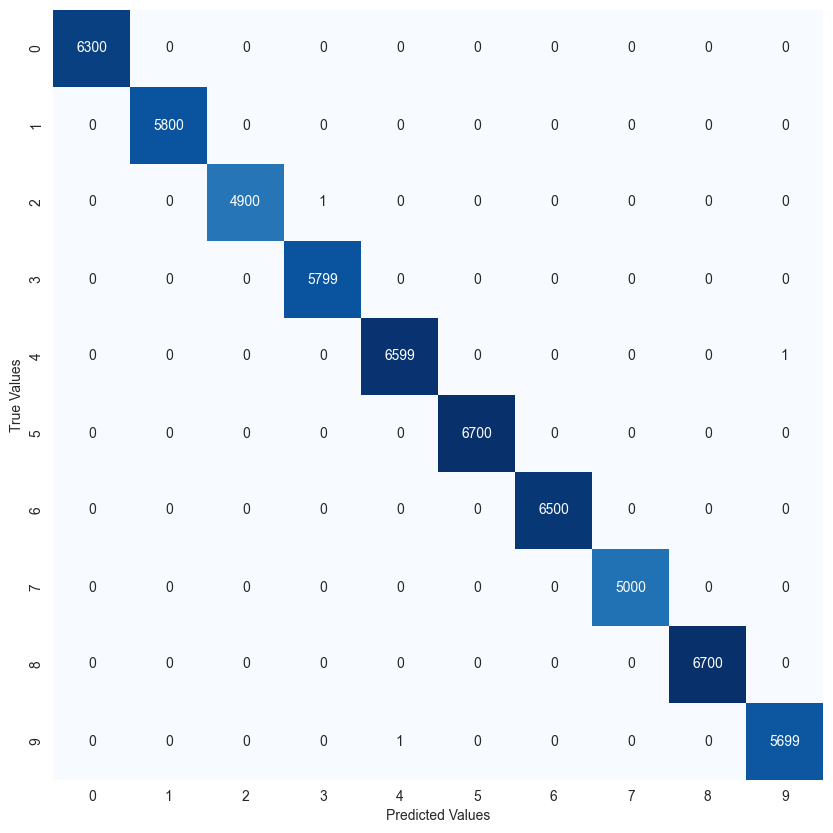

In [179]:
# set Figure
fig = plt.figure(figsize=(10, 10)) 

# predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]
y_pred = model.predict(x_test) 

# decode Predicted labels
Y_pred_l = np.argmax(y_pred, 1) 

# decode labels
Y_test_l= np.argmax(y_test, 1) 

# confusion matrix
mat = confusion_matrix(Y_test_l, Y_pred_l) 

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Data Augmentation Techniques</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The ImageDataGenerator class in Keras is used to configure image data preparation and augmentation.</li> 
</ul>

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Feature Standardization</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Pixel values are standardized across the entire dataset.</li> 
</ul>

-1.4868361 0.074648626 6.9651027


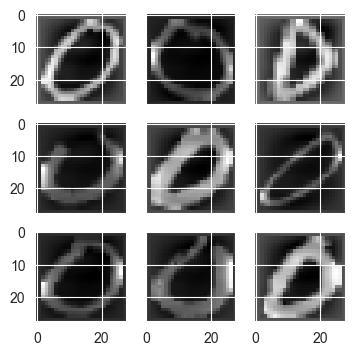

In [180]:
# define data preparation
datagen = ImageDataGenerator(
    featurewise_center=True, featurewise_std_normalization=True
)

# fit parameters from data
datagen.mean = x_train.mean(axis=0)
datagen.std = x_train.std(axis=0)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(
    x_train, y_train, batch_size=9, shuffle=False
):
    print(x_batch.min(), x_batch.mean(), x_batch.max())

    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(x_batch[i * 3 + j], cmap=plt.get_cmap("gray"))

    # show the plot
    plt.show()

    break

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Random Rotations</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The model can be trained to better handle image rotations by artificially and randomly rotating images from the dataset during training.</li> 
</ul>

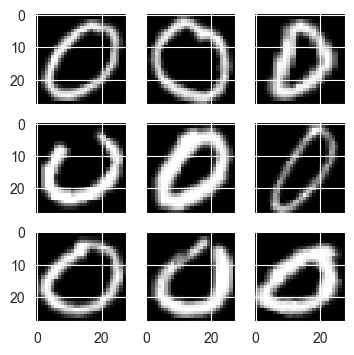

In [181]:
# define data preparation
datagen = ImageDataGenerator(rotation_range=20)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(
    x_train, y_train, batch_size=9, shuffle=False
):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(x_batch[i * 3 + j], cmap=plt.get_cmap("gray"))

    # show the plot
    plt.show()

    break

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Random Shifts</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The deep learning network can be trained to handle off-center objects by generating artificially shifted versions of the training data.</li> 
</ul>

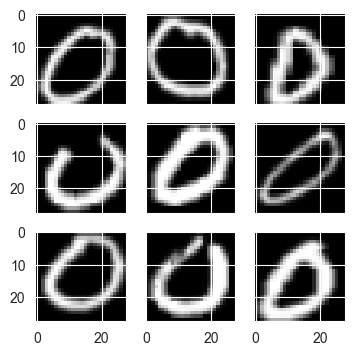

In [201]:
# define data preparation
shift = 0.085
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(
    x_train, y_train, batch_size=9, shuffle=False
):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(x_batch[i * 3 + j], cmap=plt.get_cmap("gray"))

    # show the plot
    plt.show()

    break

<p><img alt="Insight logo" src="https://github.com/warazkhan/MobileAdvertisement-MachineLearning/blob/main/Project%20Images/DataPreprocessing.png?raw=true" align="left" hspace="25px" vspace="0px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:green">Random zoom</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>This method randomly zooms the image either by zooming in or it adds some pixels around the image to enlarge the image.</li> 
</ul>

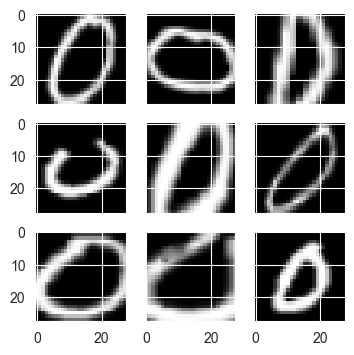

In [ ]:
# define data preparation
zoom = 0.5
datagen = ImageDataGenerator(zoom_range=zoom)

# configure batch size and retrieve one batch of images
for x_batch, y_batch in datagen.flow(
    x_train, y_train, batch_size=9, shuffle=False
):
    # create a grid of 3x3 images
    fig, ax = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(4, 4))
    for i in range(3):
        for j in range(3):
            ax[i][j].imshow(x_batch[i * 3 + j], cmap=plt.get_cmap("gray"))

    # show the plot
    plt.show()

    break

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="15px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Training CNN Model with Augmented Data</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>The augmentation techniques mentioned above can be applied to the training data using the ImageDataGenerator in the updated implementation function. Here, a new version of the implement function is defined.</li> 
</ul>

In [ ]:
def train_model_aug(model=model, batch_size=batch_size, epochs=epochs):

    # mix all kind of change for data preparation
    rotation = 15
    shift = 0.1
    zoom = 0.01
    datagen = ImageDataGenerator(
        # featurewise_center=True,
        # featurewise_std_normalization=True,
        rotation_range=rotation,
        width_shift_range=shift,
        height_shift_range=shift,
        zoom_range=zoom,
        validation_split=0.1,
    )

    # fit parameters from data
    # datagen.mean = x_train.mean(axis=0)
    # datagen.std = x_train.std(axis=0)
    # datagen.fit(x_train)

    # construct training data generater and validation data generater
    # configure batch size as the hyperparameter we have defined
    train_generator = datagen.flow(
        x_train, y_train, batch_size=batch_size, subset="training"
    )

    validation_generator = datagen.flow(
        x_train, y_train, batch_size=batch_size, subset="validation"
    )

    # set the time callback to calculate the spending time of each epoch
    time_callback = TimeHistory()

    # simple early stopping
    patience = 15
    es = EarlyStopping(
        monitor="val_accuracy",
        mode="max",
        verbose=1,
        patience=patience,
        restore_best_weights=True,
    )
    mc = ModelCheckpoint(
        "trained_model_aug_{}.h5".format(model.name),
        monitor="val_accuracy",
        mode="max",
        verbose=1,
        save_best_only=True,
    )

    rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001,
    )

    # fits the model on batches with real-time data augmentation:
    history_aug = model.fit_generator(
        generator=train_generator,
        validation_data=validation_generator,
        use_multiprocessing=True,
        steps_per_epoch=len(train_generator),
        validation_steps=len(validation_generator),
        epochs=epochs,
        workers=-1,
        callbacks=[time_callback, es, mc, rp],
    )

    # measure training performance
    train_performance_aug = pd.DataFrame.from_dict(
        history_aug.history, orient="index"
    )

    # define the row indexes
    train_performance_aug.index = [
        "train_loss",
        "train_accuracy",
        "train_precision",
        "train_recall",
        "val_loss",
        "val_accuracy",
        "val_precision",
        "val_recall",
        "learning_rate",
    ]

    # record the time consumed for each epoch
    times_aug = time_callback.times

    # concatenate the epoch time
    epoch_time_aug = pd.DataFrame(
        [times_aug],
        index=["epoch_time"],
        columns=train_performance_aug.columns,
    )
    train_performance_aug = pd.concat(
        [epoch_time_aug, train_performance_aug], axis=0
    )

    best_epoch_aug = len(history_aug.history["loss"]) - patience

    return train_performance_aug, best_epoch_aug

In [185]:
train_performance_aug,best_epoch_aug = train_model_aug()

Epoch 1/500
3375/3375 [==============================] - ETA: 0s - loss: 0.1522 - accuracy: 0.9726 - precision: 0.9735 - recall: 0.9722
Epoch 1: val_accuracy improved from -inf to 0.98483, saving model to trained_model_aug_model0_10label.h5
3375/3375 [==============================] - 445s 132ms/step - loss: 0.1522 - accuracy: 0.9726 - precision: 0.9735 - recall: 0.9722 - val_loss: 0.0770 - val_accuracy: 0.9848 - val_precision: 0.9852 - val_recall: 0.9847 - lr: 1.0000e-05
Epoch 2/500
3375/3375 [==============================] - ETA: 0s - loss: 0.1309 - accuracy: 0.9754 - precision: 0.9762 - recall: 0.9750
Epoch 2: val_accuracy improved from 0.98483 to 0.98592, saving model to trained_model_aug_model0_10label.h5
3375/3375 [==============================] - 435s 129ms/step - loss: 0.1309 - accuracy: 0.9754 - precision: 0.9762 - recall: 0.9750 - val_loss: 0.0682 - val_accuracy: 0.9859 - val_precision: 0.9863 - val_recall: 0.9857 - lr: 1.0000e-05
Epoch 3/500
3375/3375 [====================

In [199]:
train_performance_aug

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
epoch_time,445.389995,435.077780,442.350012,438.248868,440.943939,435.656288,434.898934,432.160568,441.353487,438.326989,...,446.979383,453.781221,451.032746,448.156906,446.112764,449.412529,448.137720,447.508813,449.007160,448.935355
train_loss,0.152232,0.130892,0.118213,0.107821,0.105451,0.098428,0.090165,0.087847,0.087929,0.081349,...,0.033266,0.033544,0.033123,0.033167,0.032571,0.032165,0.031470,0.032388,0.031436,0.030860
train_accuracy,0.972643,0.975440,0.977412,0.978227,0.978625,0.979676,0.980792,0.981069,0.981213,0.982097,...,0.990199,0.990134,0.990208,0.990602,0.990444,0.990579,0.990667,0.990625,0.990676,0.990847
train_precision,0.973489,0.976216,0.978186,0.979060,0.979469,0.980568,0.981546,0.981828,0.982100,0.982880,...,0.991110,0.991032,0.991170,0.991422,0.991325,0.991453,0.991496,0.991643,0.991469,0.991764
train_recall,0.972222,0.975005,0.976986,0.977736,0.978213,0.979079,0.980315,0.980546,0.980736,0.981579,...,0.989491,0.989412,0.989500,0.989861,0.989801,0.989792,0.989931,0.989949,0.990042,0.990153
val_loss,0.076995,0.068204,0.060382,0.056761,0.056481,0.049586,0.050257,0.044096,0.042525,0.046632,...,0.015577,0.015286,0.015602,0.013704,0.014820,0.016972,0.013746,0.014858,0.014025,0.015298
val_accuracy,0.984833,0.985917,0.987125,0.988250,0.988708,0.988458,0.988500,0.988875,0.990042,0.989750,...,0.994875,0.995292,0.995000,0.995667,0.995125,0.995000,0.995708,0.995083,0.995625,0.994917
val_precision,0.985160,0.986284,0.987699,0.988413,0.988953,0.988704,0.988993,0.989327,0.990246,0.990202,...,0.995164,0.995539,0.995331,0.995955,0.995456,0.995330,0.995873,0.995539,0.996039,0.995372
val_recall,0.984708,0.985708,0.986917,0.988125,0.988458,0.988333,0.988333,0.988708,0.989833,0.989583,...,0.994542,0.995042,0.994833,0.995208,0.994917,0.994667,0.995417,0.995000,0.995333,0.994708
learning_rate,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,...,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010,0.000010


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/XGB%20Regressor.png" align="left" hspace="25px" vspace="5px" width="90" height="80" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Learning Curves for Single Validation with Augmented Data</li>
</ul>

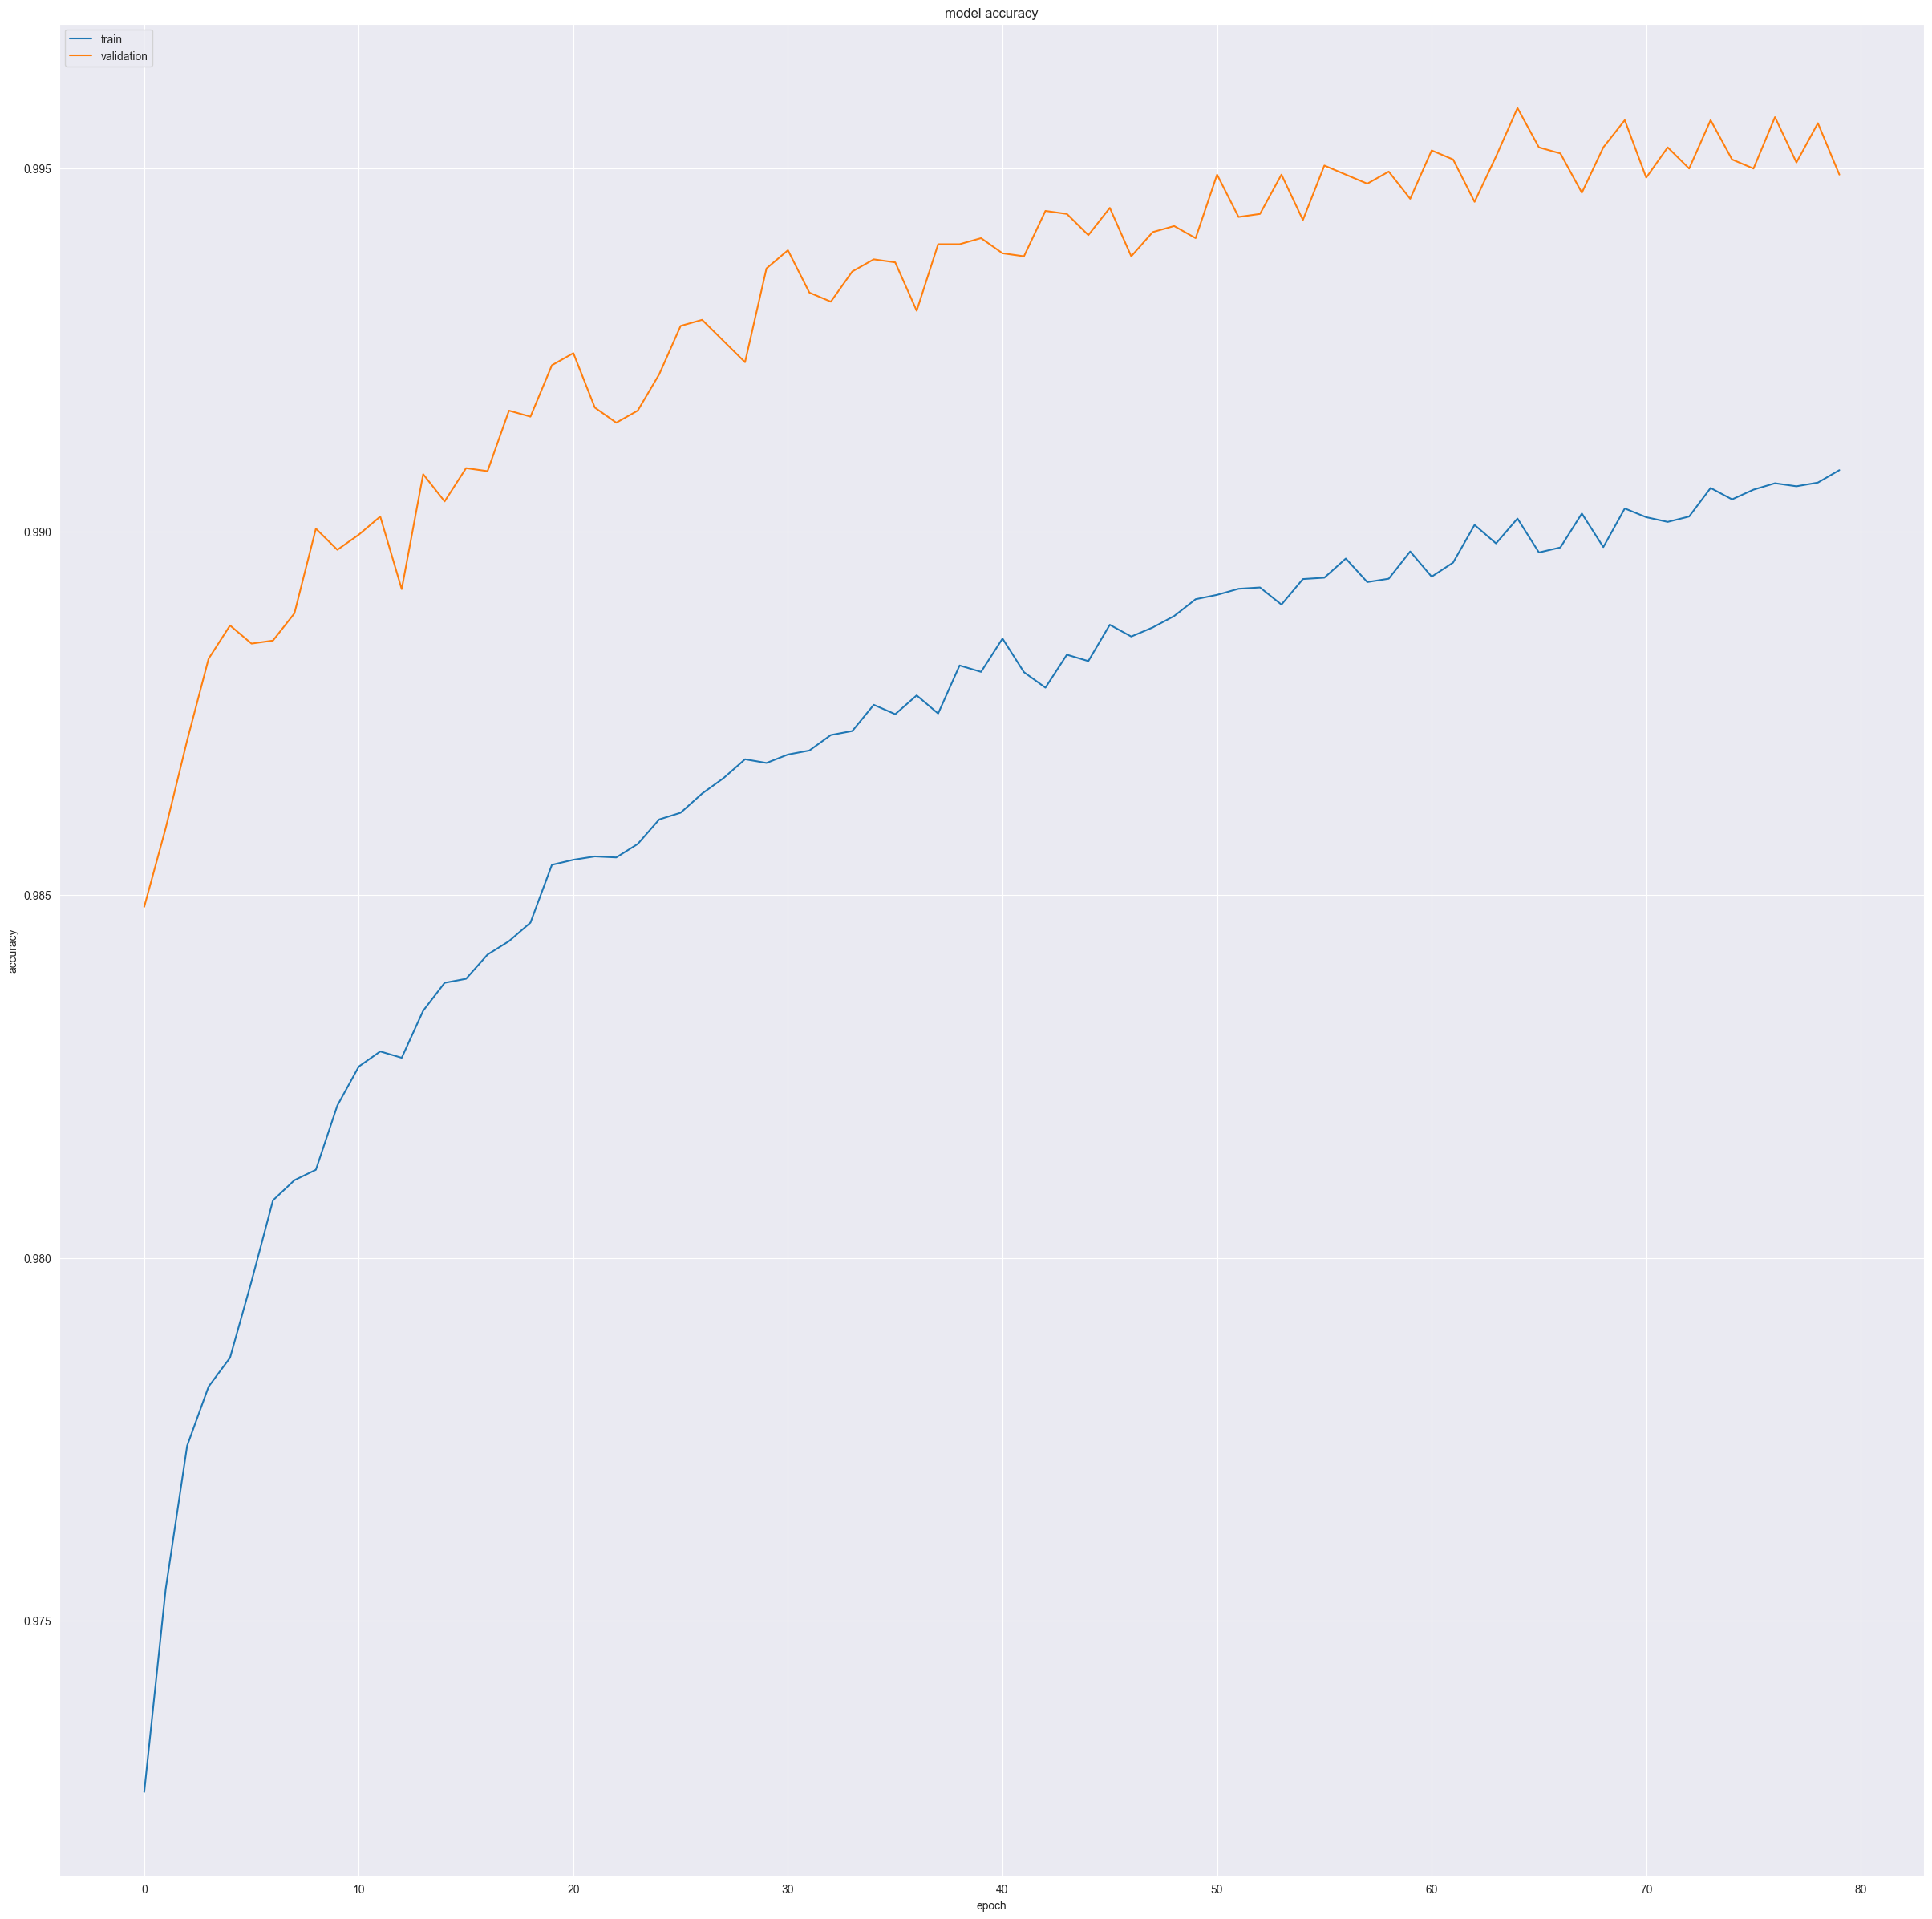

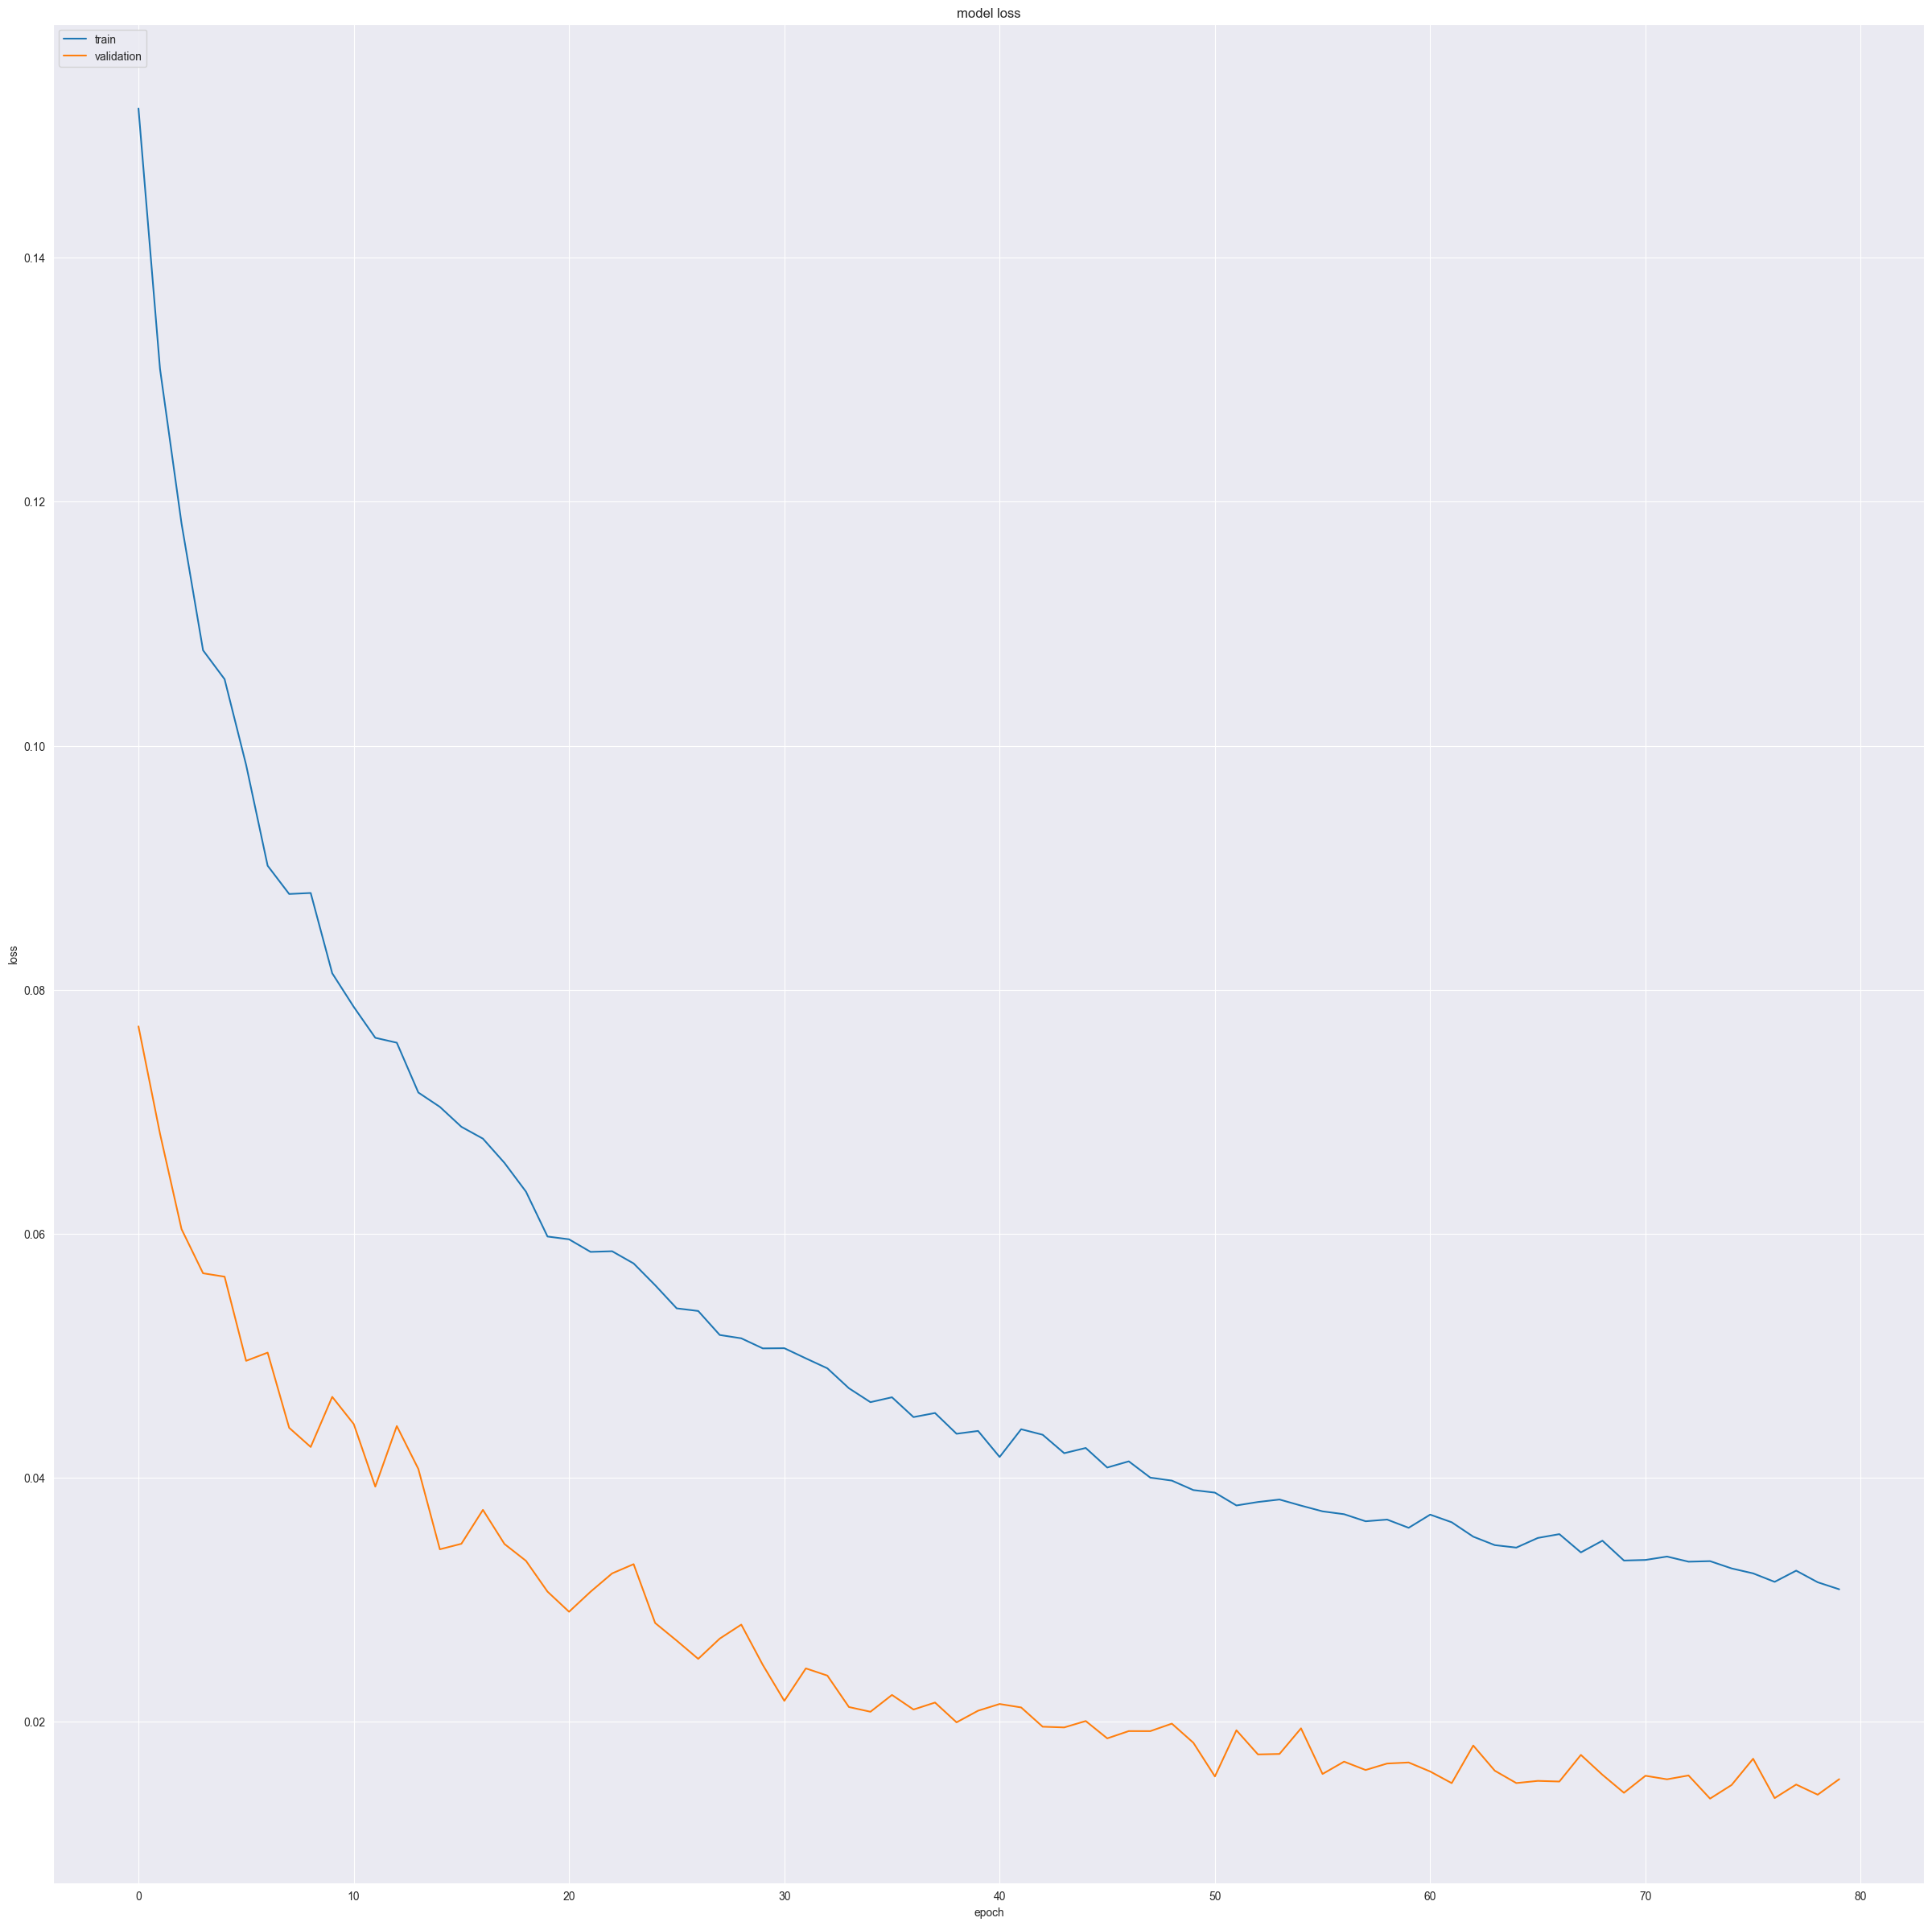

<Figure size 3000x3000 with 0 Axes>

In [198]:
learning_curve(train_performance_aug)

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/ModelSelection.png" align="left" hspace="25px" vspace="5px" width="60" height="70" ></p>

<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Testing CNN Model with Augmented Data</li>
</ul>

In [188]:
def test_model_aug(model=model):

    # load the saved model
    saved_model = load_model("trained_model_aug_{}.h5".format(model.name))

    # measure test performance
    score = saved_model.evaluate(x_test, y_test, verbose=0)
    loss = score[0]
    accuracy = score[1]
    precision = score[2]
    recall = score[3]
    f1_score = 2 * (precision * recall) / (precision + recall)

    # set the test performance as dataframe
    test_performance_aug = pd.DataFrame(
        [loss, accuracy, precision, recall, f1_score],
        columns=["augmented"],
        index=[
            "test_loss",
            "test_accuracy",
            "test_precision",
            "test_recall",
            "test_f1 score",
        ],
    )

    # record the time consumed for each epoch, and compute the average
    # times = time_callback.times

    # note the detail information of performance data
    a1 = datetime.now().isoformat(" ", "seconds")
    a2 = preprocess
    a3 = model.name
    a4 = "Resized=({},{}),batch_size={},epochs={},num_classes={}".format(
        width, height, batch_size, epochs, num_classes
    )
    a5 = best_epoch_aug
    # a6 = np.average(times)

    add = pd.DataFrame(
        {"augmented": [a1, a2, a3, a4, a5]},
        index=[
            "datetime",
            "preprocess",
            # "dropout",
            "model name",
            "detail",
            "best_epoch",
            # "average_epoch_time",
        ],
    )

    # Select last column of train_performance as a series and convert it
    last_column = train_performance_aug.iloc[:, -1]
    last_column = last_column.rename("augmented")
    last_column = last_column.to_frame()

    # concatenate all information
    performance = pd.concat(
        [
            add,
            last_column,
            test_performance_aug,
        ],
        axis=0,
    )

    # combine new data with old data as an updated file
    os.makedirs("test model", exist_ok=True)
    path_p = r"test model"
    filelist = [
        file for file in os.listdir("test model") if file.endswith(".csv")
    ]

    if len(filelist) >= 1:
        file_latest = filelist[-1]
        file_latest_path = os.path.join(path_p, file_latest)
        latest = pd.read_csv(file_latest_path, index_col=0)

        update_aug = pd.concat([latest, performance], axis=1)

        update_aug.to_csv(
            "test model/{}.csv".format(
                datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
            )
        )

    if len(filelist) < 1:
        performance.to_csv(
            "test model/{}.csv".format(
                datetime.now().strftime("%Y_%m_%d-%H_%M_%S")
            )
        )

        update_aug = performance

    return update_aug

In [189]:
update_aug = test_model_aug()

In [190]:
update_aug

,performance,augmented
datetime,2023-08-02 08:21:40,2023-08-02 18:29:58
preprocess,preprocess_simple,preprocess_simple
model name,model0_10label,model0_10label
detail,"Resized=(28,28),batch_size=64,epochs=500,num_c...","Resized=(28,28),batch_size=64,epochs=500,num_c..."
best_epoch,11,65
epoch_time,497.2188265323639,448.935355
train_loss,0.0006922085303813219,0.03086
train_accuracy,0.9997962713241577,0.990847
train_precision,0.9997962713241577,0.991764
train_recall,0.9997962713241577,0.990153


<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/MobileAdvertisement-MachineLearning/main/Project%20Images/ModelSelection.png" align="left" hspace="25px" vspace="25px" width="60" height="70" ></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:35px;font-style: italic;color:red">Explore the misclassified images</li>
</ul>
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:15px;color:black">
    <li>Check what kind of images the model give it wrong prediction.</li> 
</ul>

In [191]:
# load the saved model
saved_model = load_model("trained_model_{}.h5".format(model.name))

# predict the data
y_pred = saved_model.predict(x_test)

# append misclassified image's index
misclass_list = []

for i in range(y_test.shape[0]):
    if y_pred[i].argmax() != y_test[i].argmax():
        misclass_list.append(i)

1875/1875 [==============================] - 71s 38ms/step


In [192]:
# the amount of misclassified images
len(misclass_list)

3

In [194]:
# convert to original no-split images' index list
original_img_list = []
for i in misclass_list:
    a = math.floor(i / 3)
    original_img_list.append(a)

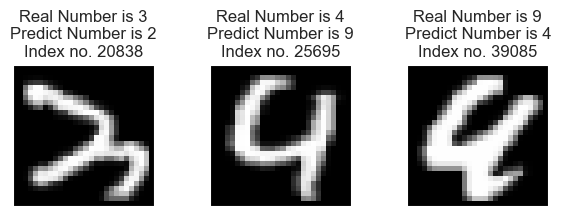

In [195]:
# show the misclassified part of images
b = 0
x_test_r = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2])
fig, axis = plt.subplots(figsize=(12, 14))

if len(misclass_list) <= 30:
    l = len(misclass_list)

else:
    l = 30

for i in range(l):
    j = misclass_list[i + b]
    plt.subplot(6, 5, i + 1), plt.imshow(x_test_r[j], cmap="gray"), plt.title(
        f"Real Number is {y_test[j].argmax()}\nPredict Number is {y_pred[j].argmax()}\nIndex no. {j}"
    )
    plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.1, wspace=0.4)
plt.show()

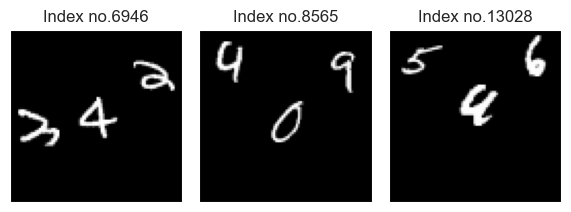

In [196]:
# show the misclassified original images
b = 0
x_test_o_r = x_test_o.reshape(
    x_test_o.shape[0], x_test_o.shape[1], x_test_o.shape[2]
)
fig, axis = plt.subplots(figsize=(12, 14))

if len(misclass_list) <= 30:
    l = len(misclass_list)

else:
    l = 30

for i in range(l):
    j = original_img_list[i + b]
    plt.subplot(6, 5, i + 1), plt.imshow(
        x_test_o_r[j], cmap="gray"
    ), plt.title(f"Index no.{j}")
    plt.xticks([]), plt.yticks([])
    plt.subplots_adjust(top=0.99, bottom=0.01, hspace=0.1, wspace=0.1)
plt.show()

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/allinsight-logo.png" align="left" hspace="0px" vspace="30px" width="120" height="120"></p>
<br>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;In a null shell:</li>
</ul>
<div class="alert alert-info" role="alert">
<ul style="list-style-type:circle;font-family:Trebuchet MS;font-size:17px;color:black">
<br><br>
<li><span style="font-weight: bold; color:green;"><b>Dataset had been loaded and explored properly:</b></span> The triple-digits MNIST dataset is probably made by stacking three single MNIST digits from left to right. Hence, splitting it correctly could make it similar to a single MNIST digit classification task</li><br>
<li><span style="font-weight: bold; color:green;"><b>Suitable preprocessing had been done:</b></span> By using the original folder names as labels, there could be a thousand labels, but after splitting the images into smaller parts, the number of labels is reduced to just ten, making the methodology more straightforward.</li><br>

    
<li><span style="font-weight: bold; color:green;"><b>Promising model had been built:</b></span> The model has seven convolutional layers, which is enough to handle handwritten digit classification tasks.</li><br>
<li><span style="font-weight: bold; color:green;"><b>Model had been trained properly:</b></span> Using suitable batch size and epoch number to train the model is important, it lets the model find its best weight.</li><br>
<li><span style="font-weight: bold; color:green;"><b>Performance metrics show the reliability of the model:</b></span> The testing accuracy of this Multi-label image-based digit classification task has reached 0.99987.</li><br>
<li><span style="font-weight: bold; color:green;"><b>Augmentation provided  the variability of the dataset:</b></span> The variability of the training images across each epoch provides more possibility for the model.</li><br>
In conclusion, the final CNN model achieved an impressive test accuracy. It demonstrated reliable performance with reasonable training time, making it ideal for the multi-digit MNIST image classification task. The project emphasized the significance of data preprocessing, and model selection in achieving accurate results for complex tasks. Further analysis and performance of other models are detailed in the project report.<br><br>
</ul>
</div>

<p><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/Data-Analysis-Project/main/refrences-logo.png" align="left" hspace="0px" vspace="7px" width="120" height="80"></p>
<ul style="list-style-type:none;">
  <li style="font-weight: bold;font-family:Trebuchet MS;font-size:30px;font-style: italic;color:  red">&emsp;Refrences:</li>
</ul>      

<div class="alert alert-warning" role="alert">
<ul style="list-style-type:none;font-family:Trebuchet MS;font-size:17px;color:black"> 
    <li>1. <span style="font-weight: bold; color:#122ecc;"> https://matplotlib.org/</li>     
    <br>          
    <li>2. <span style="font-weight: bold; color:#122ecc;"> https://docs.opencv.org/</li>     
    <br>
    <li>3. <span style="font-weight: bold; color:#122ecc;">https://pyimagesearch.com/</li>     
    <br> 
    <li>4. <span style="font-weight: bold; color:#122ecc;">https://www.geeksforgeeks.org/</li>  
    <br>   
    <li>6. <span style="font-weight: bold; color:#122ecc;">https://stackoverflow.com/</li> 
    <br>   
    <li>7. <span style="font-weight: bold; color:#122ecc;">https://machinelearningmastery.com/</li>
    <br>   
</ul>
</div>

 <center><img alt="Insight logo" src="https://raw.githubusercontent.com/warazkhan/CarInssurance-DataAnalysis/main/Thankyou.gif" class="center" hspace="0px" vspace="0px" width=400 height=0></center>